In [160]:
#staples just in case 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math as mt

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.graphics.tsaplots import plot_pacf

#Data Prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

#Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, accuracy_score

plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,)
%config InlineBackend.figure_format = 'retina'

In [161]:
df = pd.read_csv(r'C:\Users\Monado\Documents\Data_Portfolio\Projects\video_game_full.csv')

In [162]:
df.head()

Rank                                Name Publisher     Developer Platform  \
0     1                          Wii Sports  Nintendo  Nintendo EAD      Wii   
1     2                   Super Mario Bros.  Nintendo  Nintendo EAD      NES   
2     3                      Mario Kart Wii  Nintendo  Nintendo EAD      Wii   
3     4                   Wii Sports Resort  Nintendo  Nintendo EAD      Wii   
4     5  Pokémon Red / Green / Blue Version  Nintendo    Game Freak       GB   

   Release_date         Genre  Sales_NA  Sales_PAL  Sales_JP  Sales_Other  \
0        2006.0        Sports     41.36      29.02      3.77         8.51   
1        1985.0      Platform     29.08       3.58      6.81         0.77   
2        2008.0        Racing     15.91      12.92      3.80         3.35   
3        2009.0        Sports     15.61      10.99      3.29         3.02   
4        1998.0  Role-Playing     11.27       8.89     10.22         1.00   

   Sales_Globe  
0        82.65  
1        40.24  
2        35.98  
3        32.90  
4        31.37

In [163]:
print("Data Shape :",df.shape)

Data Shape : (19000, 12)


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          19000 non-null  int64  
 1   Name          19000 non-null  object 
 2   Publisher     19000 non-null  object 
 3   Developer     18998 non-null  object 
 4   Platform      19000 non-null  object 
 5   Release_date  18942 non-null  float64
 6   Genre         19000 non-null  object 
 7   Sales_NA      13484 non-null  float64
 8   Sales_PAL     12982 non-null  float64
 9   Sales_JP      7464 non-null   float64
 10  Sales_Other   15390 non-null  float64
 11  Sales_Globe   19000 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1.7+ MB


In [165]:
df.nunique()

Rank            19000
Name            13111
Publisher         699
Developer        2746
Platform           39
Release_date       45
Genre              20
Sales_NA          421
Sales_PAL         324
Sales_JP          245
Sales_Other       163
Sales_Globe       656
dtype: int64

In [166]:
# Look at columns with only null values
data_nan = pd.DataFrame({'Count': df.isna().sum()[df.isna().sum() != 0]})

data_nan['% of total'] = round((data_nan['Count'] * 100)/ df.shape[0], 2)
print(data_nan.sort_values('Count', ascending = False))
print('\n')
print('of the %d columns in the data, %d columns contain null values' %(df.shape[1], len(data_nan)))

              Count  % of total
Sales_JP      11536       60.72
Sales_PAL      6018       31.67
Sales_NA       5516       29.03
Sales_Other    3610       19.00
Release_date     58        0.31
Developer         2        0.01


of the 12 columns in the data, 6 columns contain null values


In [167]:
round(df.describe(), 2)

Rank  Release_date  Sales_NA  Sales_PAL  Sales_JP  Sales_Other  \
count  19000.00      18942.00  13484.00   12982.00   7464.00     15390.00   
mean    9500.50       2007.56      0.35       0.21      0.19         0.06   
std     5484.97          6.34      0.91       0.60      0.45         0.20   
min        1.00       1970.00      0.00       0.00      0.00         0.00   
25%     4750.75       2004.00      0.05       0.02      0.02         0.00   
50%     9500.50       2008.00      0.13       0.05      0.06         0.01   
75%    14250.25       2011.00      0.33       0.18      0.16         0.04   
max    19000.00       2020.00     41.36      29.02     10.22        10.57   

       Sales_Globe  
count     19000.00  
mean          0.51  
std           1.51  
min           0.00  
25%           0.05  
50%           0.15  
75%           0.44  
max          82.65

In [168]:
#Separate columns by type

cat = [feature for feature in df.columns if df[feature].dtype == 'O']
con = [feature for feature in df.columns if df[feature].dtype != 'O']

In [169]:
df[cat]

Name  Publisher           Developer  \
0                              Wii Sports   Nintendo        Nintendo EAD   
1                       Super Mario Bros.   Nintendo        Nintendo EAD   
2                          Mario Kart Wii   Nintendo        Nintendo EAD   
3                       Wii Sports Resort   Nintendo        Nintendo EAD   
4      Pokémon Red / Green / Blue Version   Nintendo          Game Freak   
...                                   ...        ...                 ...   
18995                      Beat the Intro  Mindscape           Mindscape   
18996         Winning Post 7 Maximum 2008       KOEI                Koei   
18997                  CSI: NY - The Game    Ubisoft  Legacy Interactive   
18998                        Golden Balls  Mindscape      Mindscape Inc.   
18999       Resident Evil 5: Gold Edition     Capcom              Capcom   

      Platform         Genre  
0          Wii        Sports  
1          NES      Platform  
2          Wii        Racing  
3          Wii        Sports  
4           GB  Role-Playing  
...        ...           ...  
18995       DS          Misc  
18996      Wii        Sports  
18997       PC     Adventure  
18998       DS          Misc  
18999     X360        Action  

[19000 rows x 5 columns]

In [170]:
df[con]

Rank  Release_date  Sales_NA  Sales_PAL  Sales_JP  Sales_Other  \
0          1        2006.0     41.36      29.02      3.77         8.51   
1          2        1985.0     29.08       3.58      6.81         0.77   
2          3        2008.0     15.91      12.92      3.80         3.35   
3          4        2009.0     15.61      10.99      3.29         3.02   
4          5        1998.0     11.27       8.89     10.22         1.00   
...      ...           ...       ...        ...       ...          ...   
18995  18996        2010.0       NaN       0.00       NaN         0.00   
18996  18997        2008.0       NaN        NaN      0.00          NaN   
18997  18998        2008.0       NaN       0.00       NaN         0.00   
18998  18999        2008.0       NaN       0.00       NaN         0.00   
18999  19000        2010.0       NaN       0.00       NaN         0.00   

       Sales_Globe  
0            82.65  
1            40.24  
2            35.98  
3            32.90  
4            31.37  
...            ...  
18995         0.00  
18996         0.00  
18997         0.00  
18998         0.00  
18999         0.00  

[19000 rows x 7 columns]

In [171]:
# Check for correlations between variables
corr_metrics_train = df[con].corr()
corr_metrics_train.style.background_gradient()

**EDA**

We will start by looking at our data as whole and look for larger patterns to focus on. First we will get a sense for our data by seeing where most of it is located. We will check which years, genres and platforms have the most games.

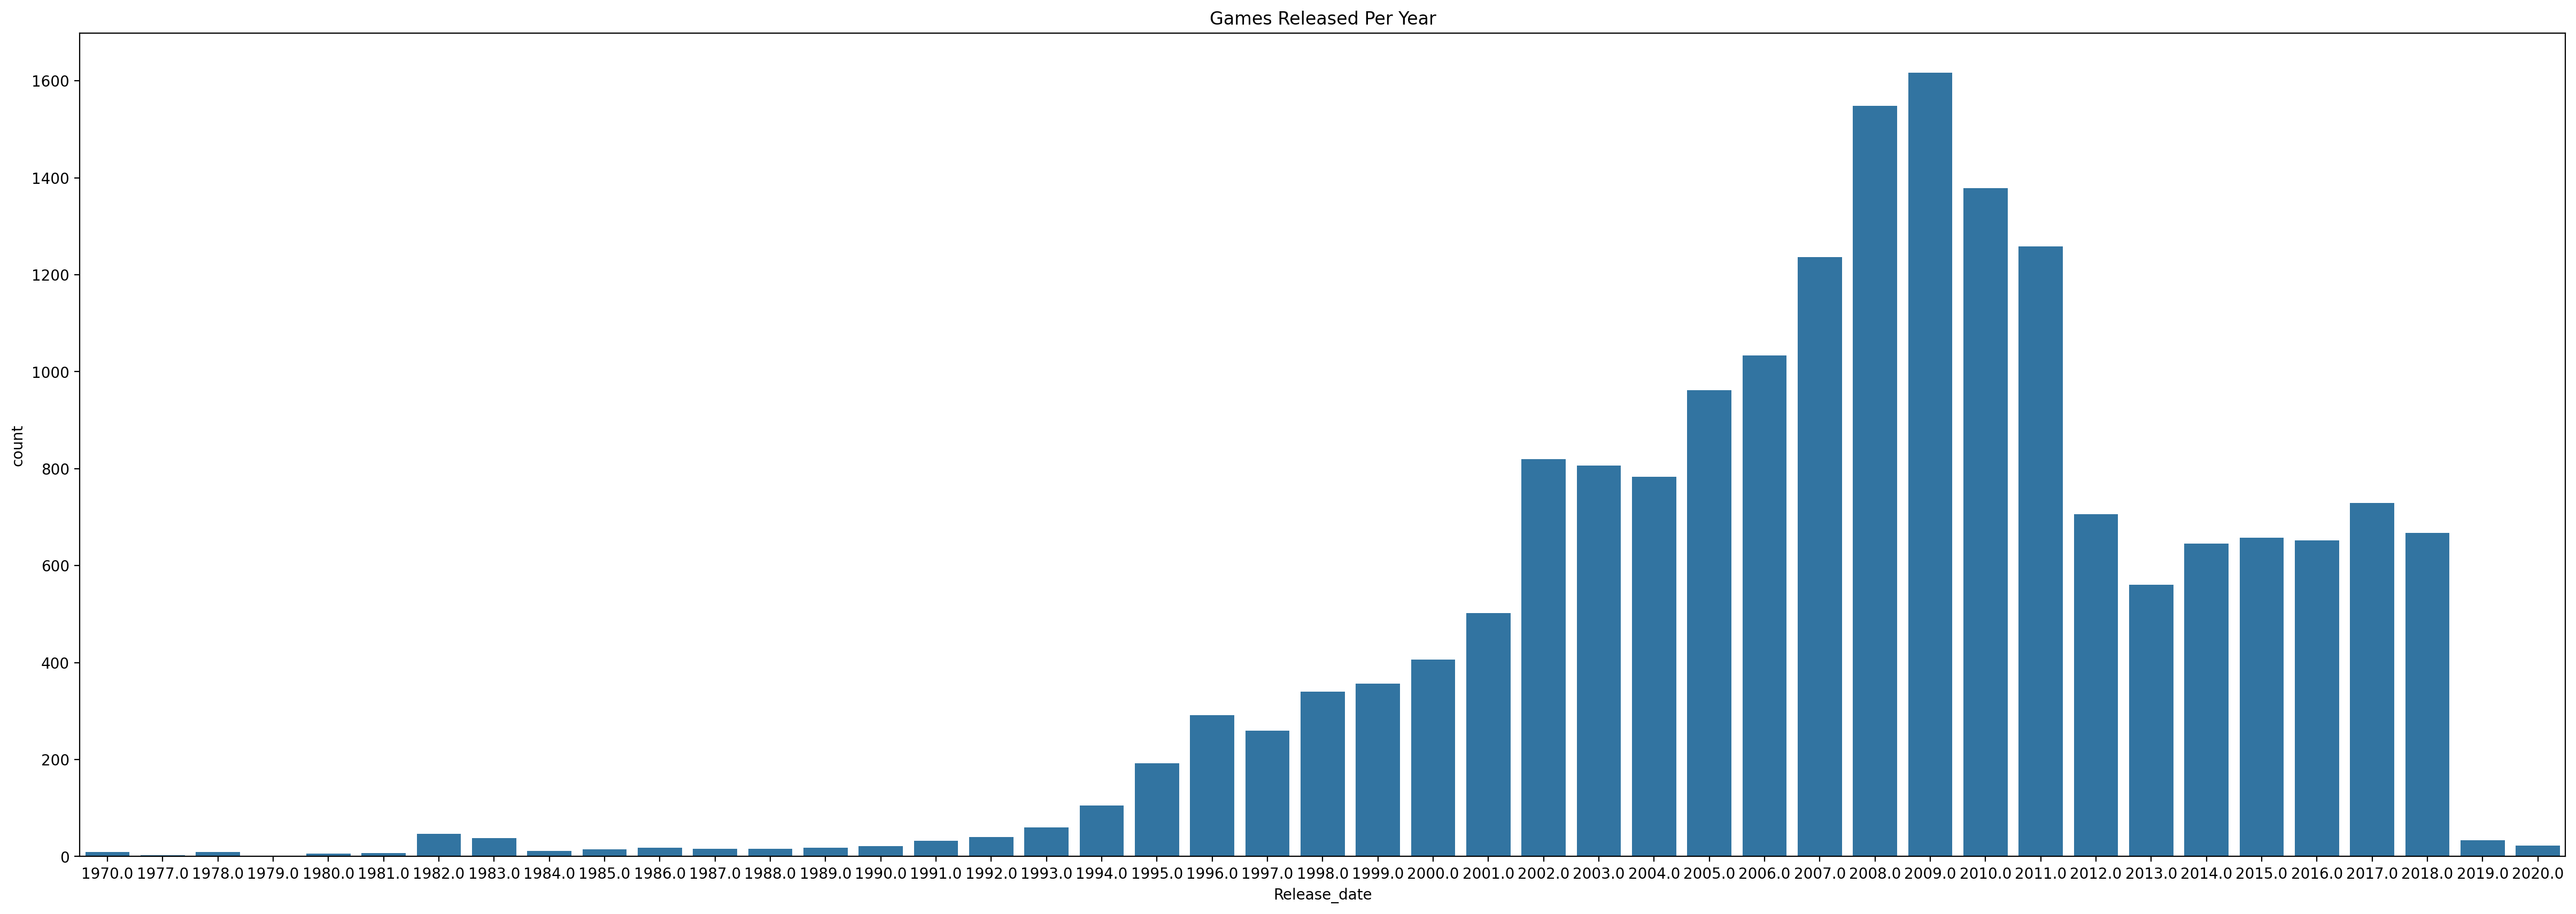

In [172]:
plt.figure(figsize = (30,10))
sns.barplot( x = df['Release_date'].value_counts().index,y = df['Release_date'].value_counts())
plt.title('Games Released Per Year')

plt.show()

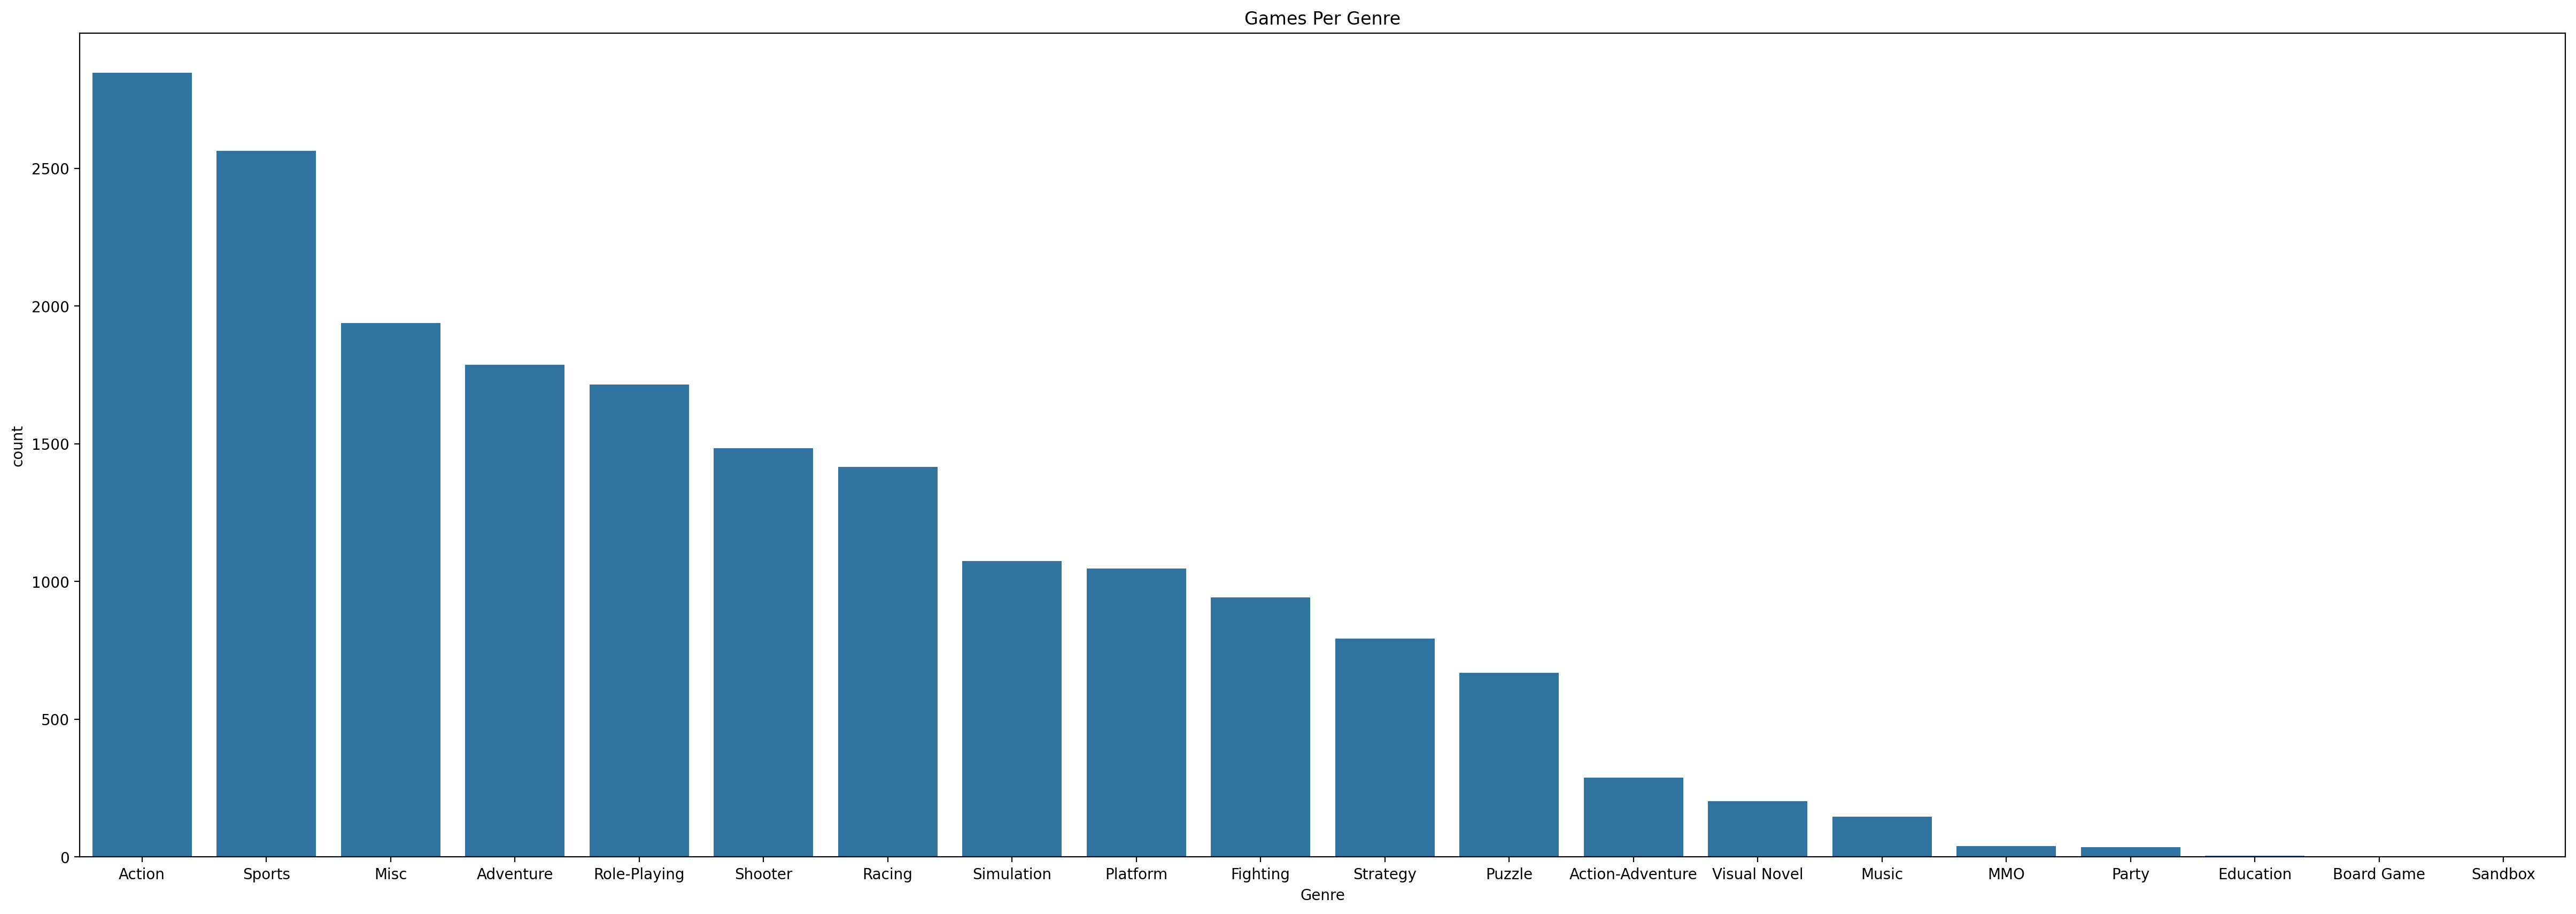

In [173]:
plt.figure(figsize = (30,10))
sns.barplot( x = df['Genre'].value_counts().index,y = df['Genre'].value_counts())
plt.title('Games Per Genre')

plt.show()

The action genre has the most games, with sports coming at second. Strategy and puzzle games come in at last. The data seems to suggest that there are many more titles in genres with faster pace game play and less for slower paced games based around tactics and problem solving. This is not an indictiation of which genres are most successful or have performed better.

Sports high count is likely tied into the yearly release cycle of many games in the genre such as Madden, NBA 2K, etc. These games release a new version for each new season of their respective sport causing an inflication in the number of titles in this genre.

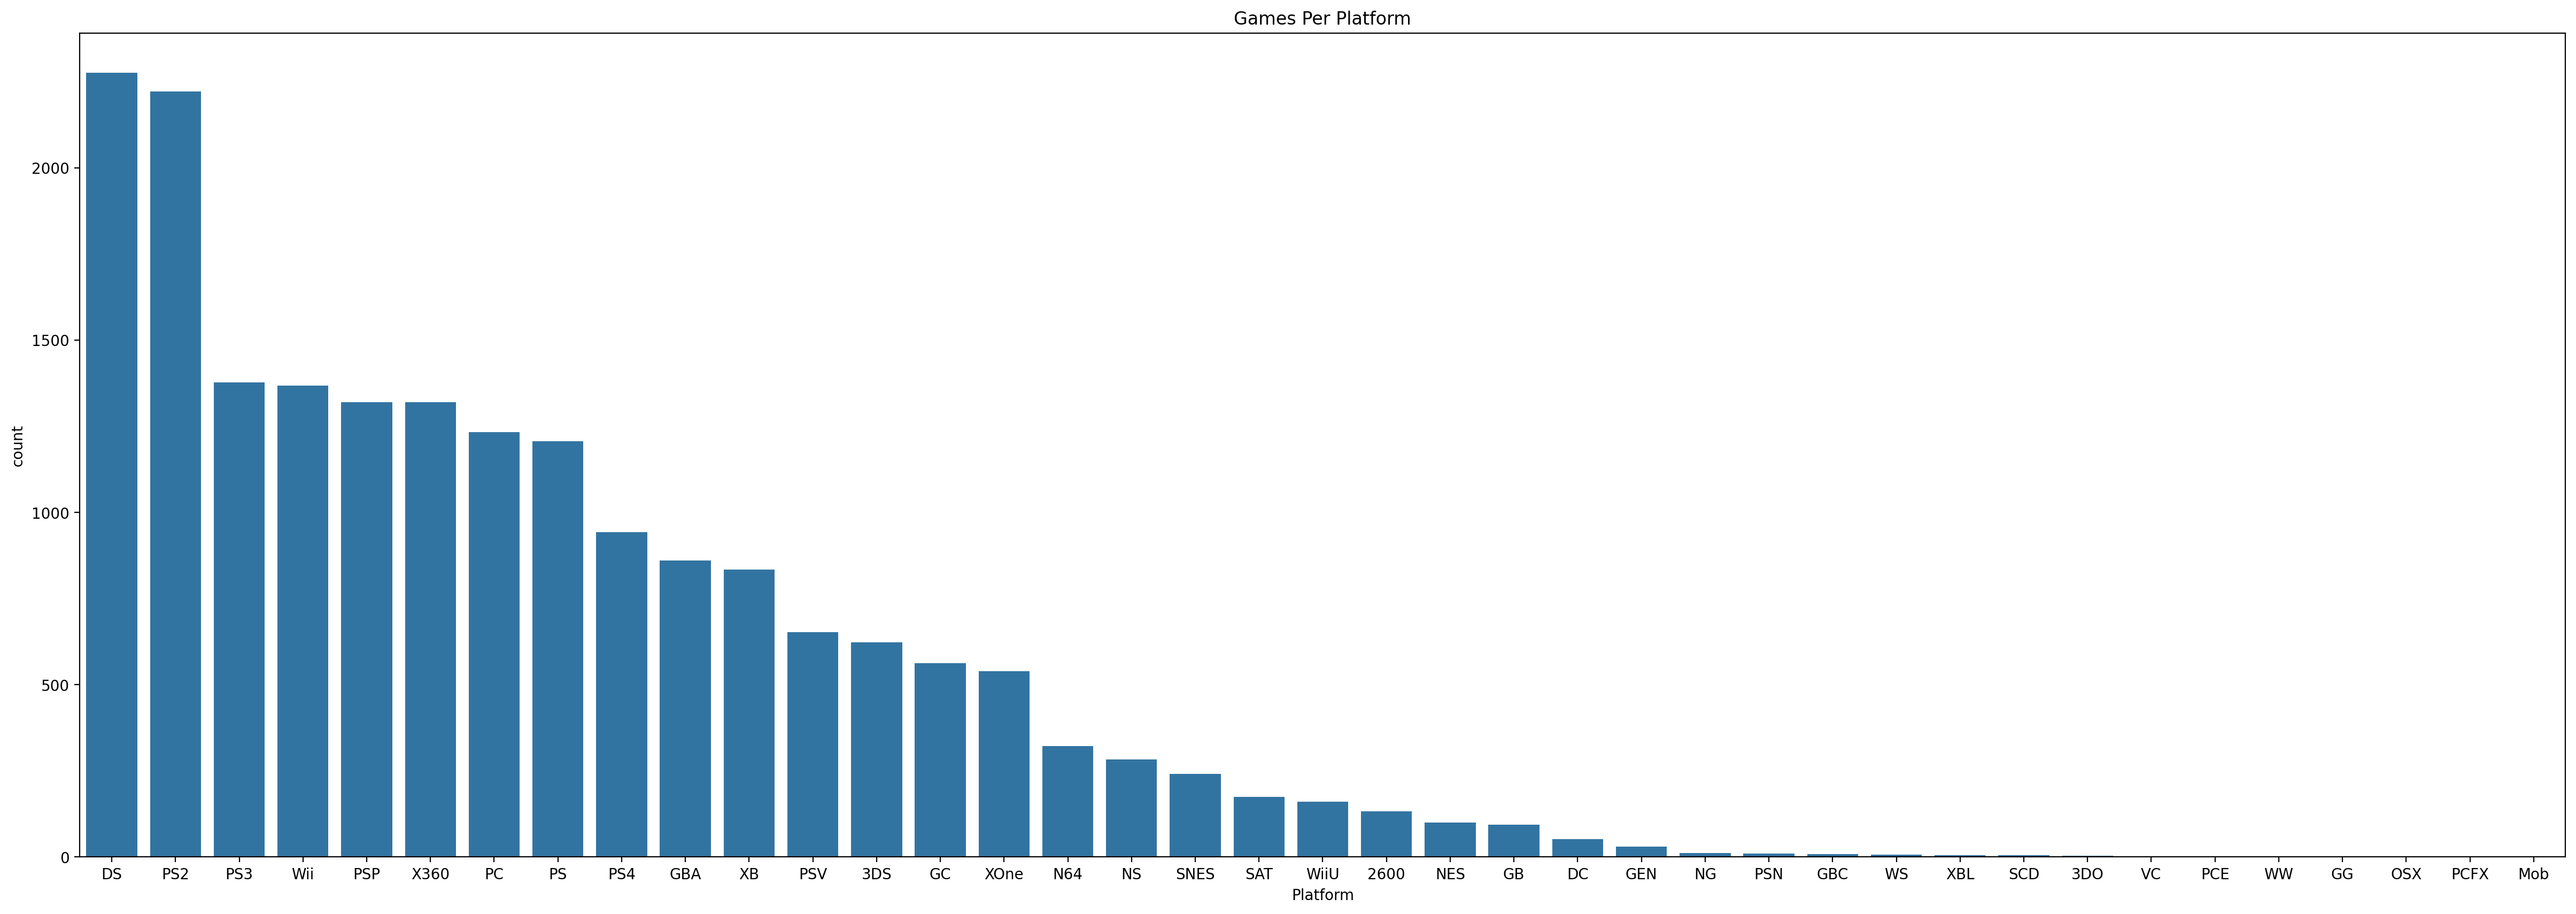

In [174]:
plt.figure(figsize = (30,10))
sns.barplot( x = df['Platform'].value_counts().index,y = df['Platform'].value_counts())
plt.title('Games Per Platform')

plt.show()

DS and PS2 have the most titles compared to all other consoles. PS3, Wii and XBox360 come in close behind. Around after that we begin to see a large drop in game catelogs for devices. Some of this can be explaned by the age of consoles. Older consoles like the NES came out at a time where less games were coming out and newer ones like the XBox One and PS5 have only been out for a couple of years and have not had as much time for titles to be developed. 

The DS came out in 2004 and was supported by Nintendo across several iterations. This console was at its most popular during the peak years we see that games where released. This is reflected by the overwhelming amount of titles that are supported by the DS.

The PS2 is a little more surprising to see come in at second at first but there a few factors that can explain why the PS2 has so many more titles than the PS3 even though we see that the PS3 was the newer console around the 2008/2009 spike we see in games released. One reason is the PS2 came out 6 years earlier giving it a head start for games that were developed for it. The second reason is that even though the PS3 was released in 2006, many of the titles that came out on PS3 also came out on PS2 until about 2013. Even though the PS2 may not have been the main console of focus for a long time. 

Next we will look at some relationships with our data over 
time.

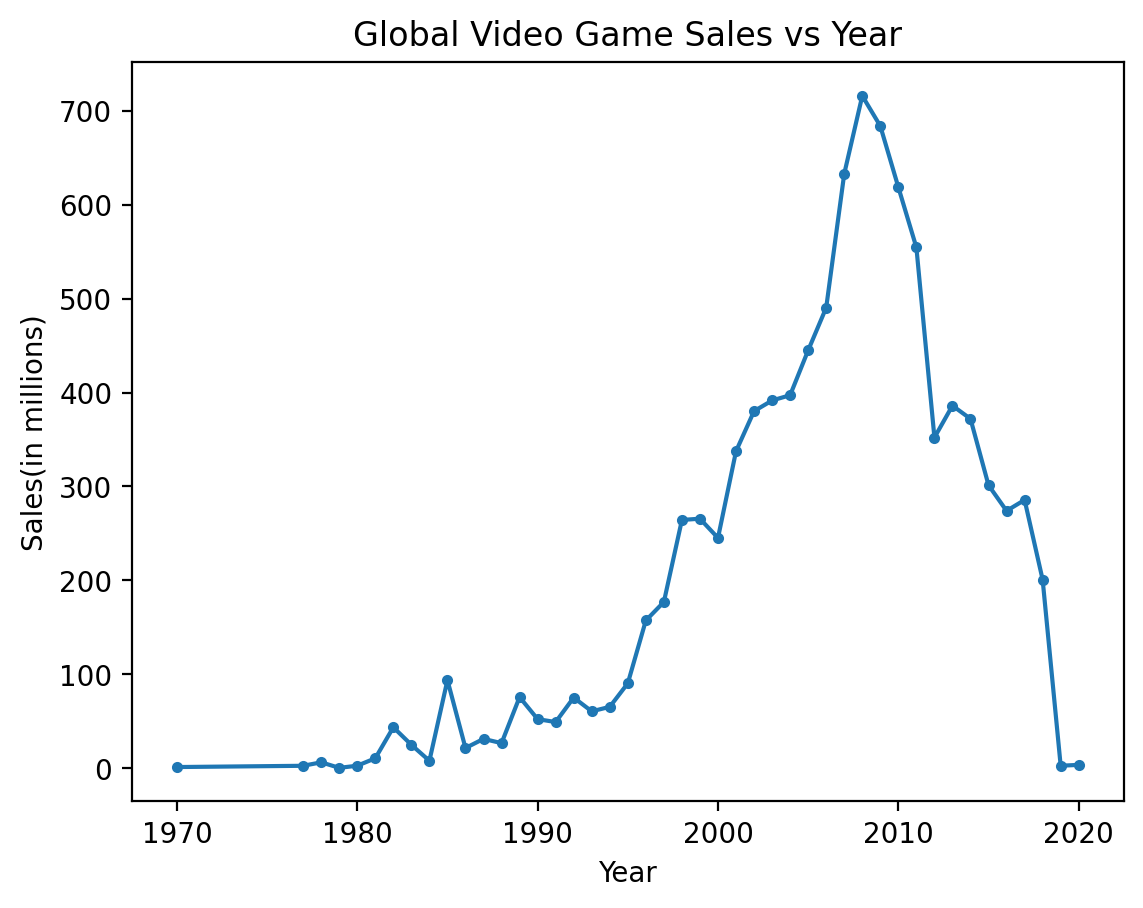

In [175]:
#look at overall video game sales over time
yearly_total_sales = df.groupby(['Release_date'])['Sales_Globe'].sum()

#graph
plt.figure()
plt.plot(yearly_total_sales,marker='.')
plt.title('Global Video Game Sales vs Year')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.show()

This graph shows steady increase in video games sales until around 2010 where we seem to take a steep dive. This is likely a problem with our data as opposed to an actual trend in our data. After 2010 the amount of titles in our data base per year starts to decrease. The shape of this graph is very similar to the shape of our graph depiciting how many games came out per year, capturing the connection between the amount of games released in a year and the total amount of sales in video games. Overall this trend of the amount of games released and total sales decrease after 2010 seems to be a product of our data no having as many data points on newer games.

([<matplotlib.patches.Wedge at 0x18d034663f0>,
 [Text(0.21862594659468498, 1.0780550521543777, 'NA'),
  Text(-1.0065555034538003, -0.4436733240424391, 'PAL'),
  Text(0.420488019104808, -1.01645945604796, 'JP'),
  Text(1.0727612788994207, -0.24327605409098405, 'Other')],
 [Text(0.11925051632437361, 0.5880300284478424, '43.6%'),
  Text(-0.5490302746111637, -0.24200363129587585, '26.0%'),
  Text(0.22935710132989523, -0.5544324305716145, '23.3%'),
  Text(0.5851425157633203, -0.13269602950417309, '7.1%')])

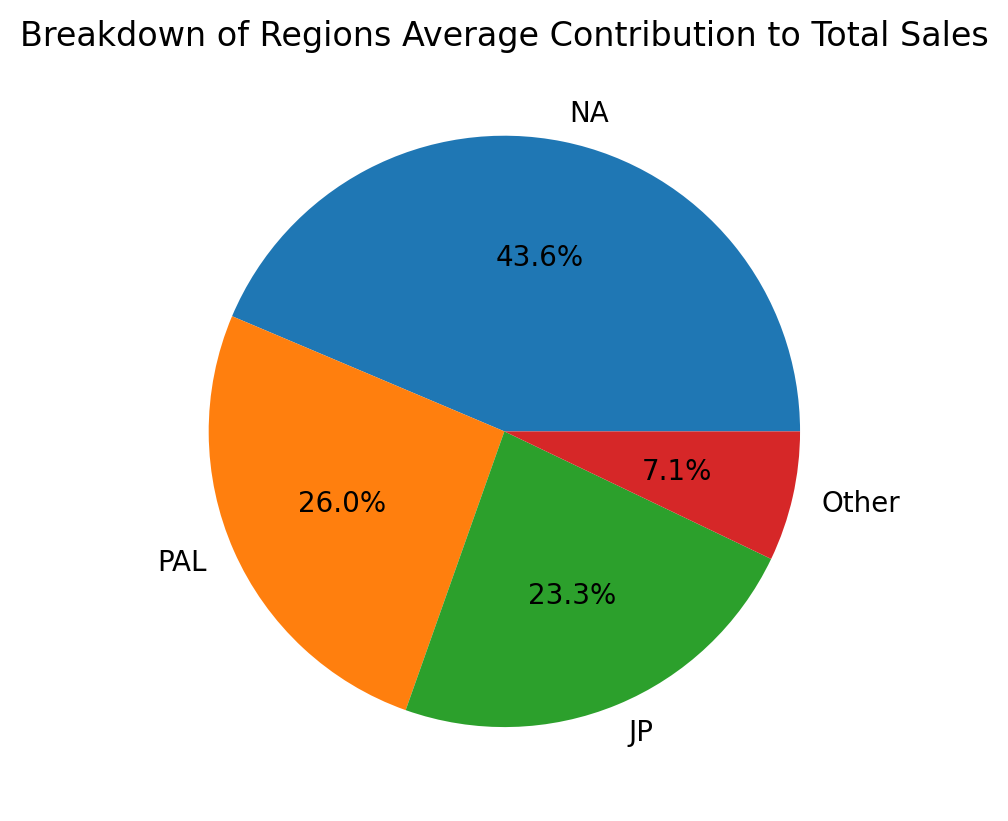

In [176]:
#look at regional information
#Breakdown of average contributions of different markets
avg_sales = [np.mean(df['Sales_NA']),np.mean(df['Sales_PAL']),np.mean(df['Sales_JP']),np.mean(df['Sales_Other'])]
avg_labels = ['NA','PAL','JP','Other']

plt.figure()
plt.title('Breakdown of Regions Average Contribution to Total Sales')
plt.pie(avg_sales,labels = avg_labels,autopct='%1.1f%%')

This graph indicates that on average around half of global sales come from north america. This seems to indicate that North America might be the largest market at least in terms of sales contributions

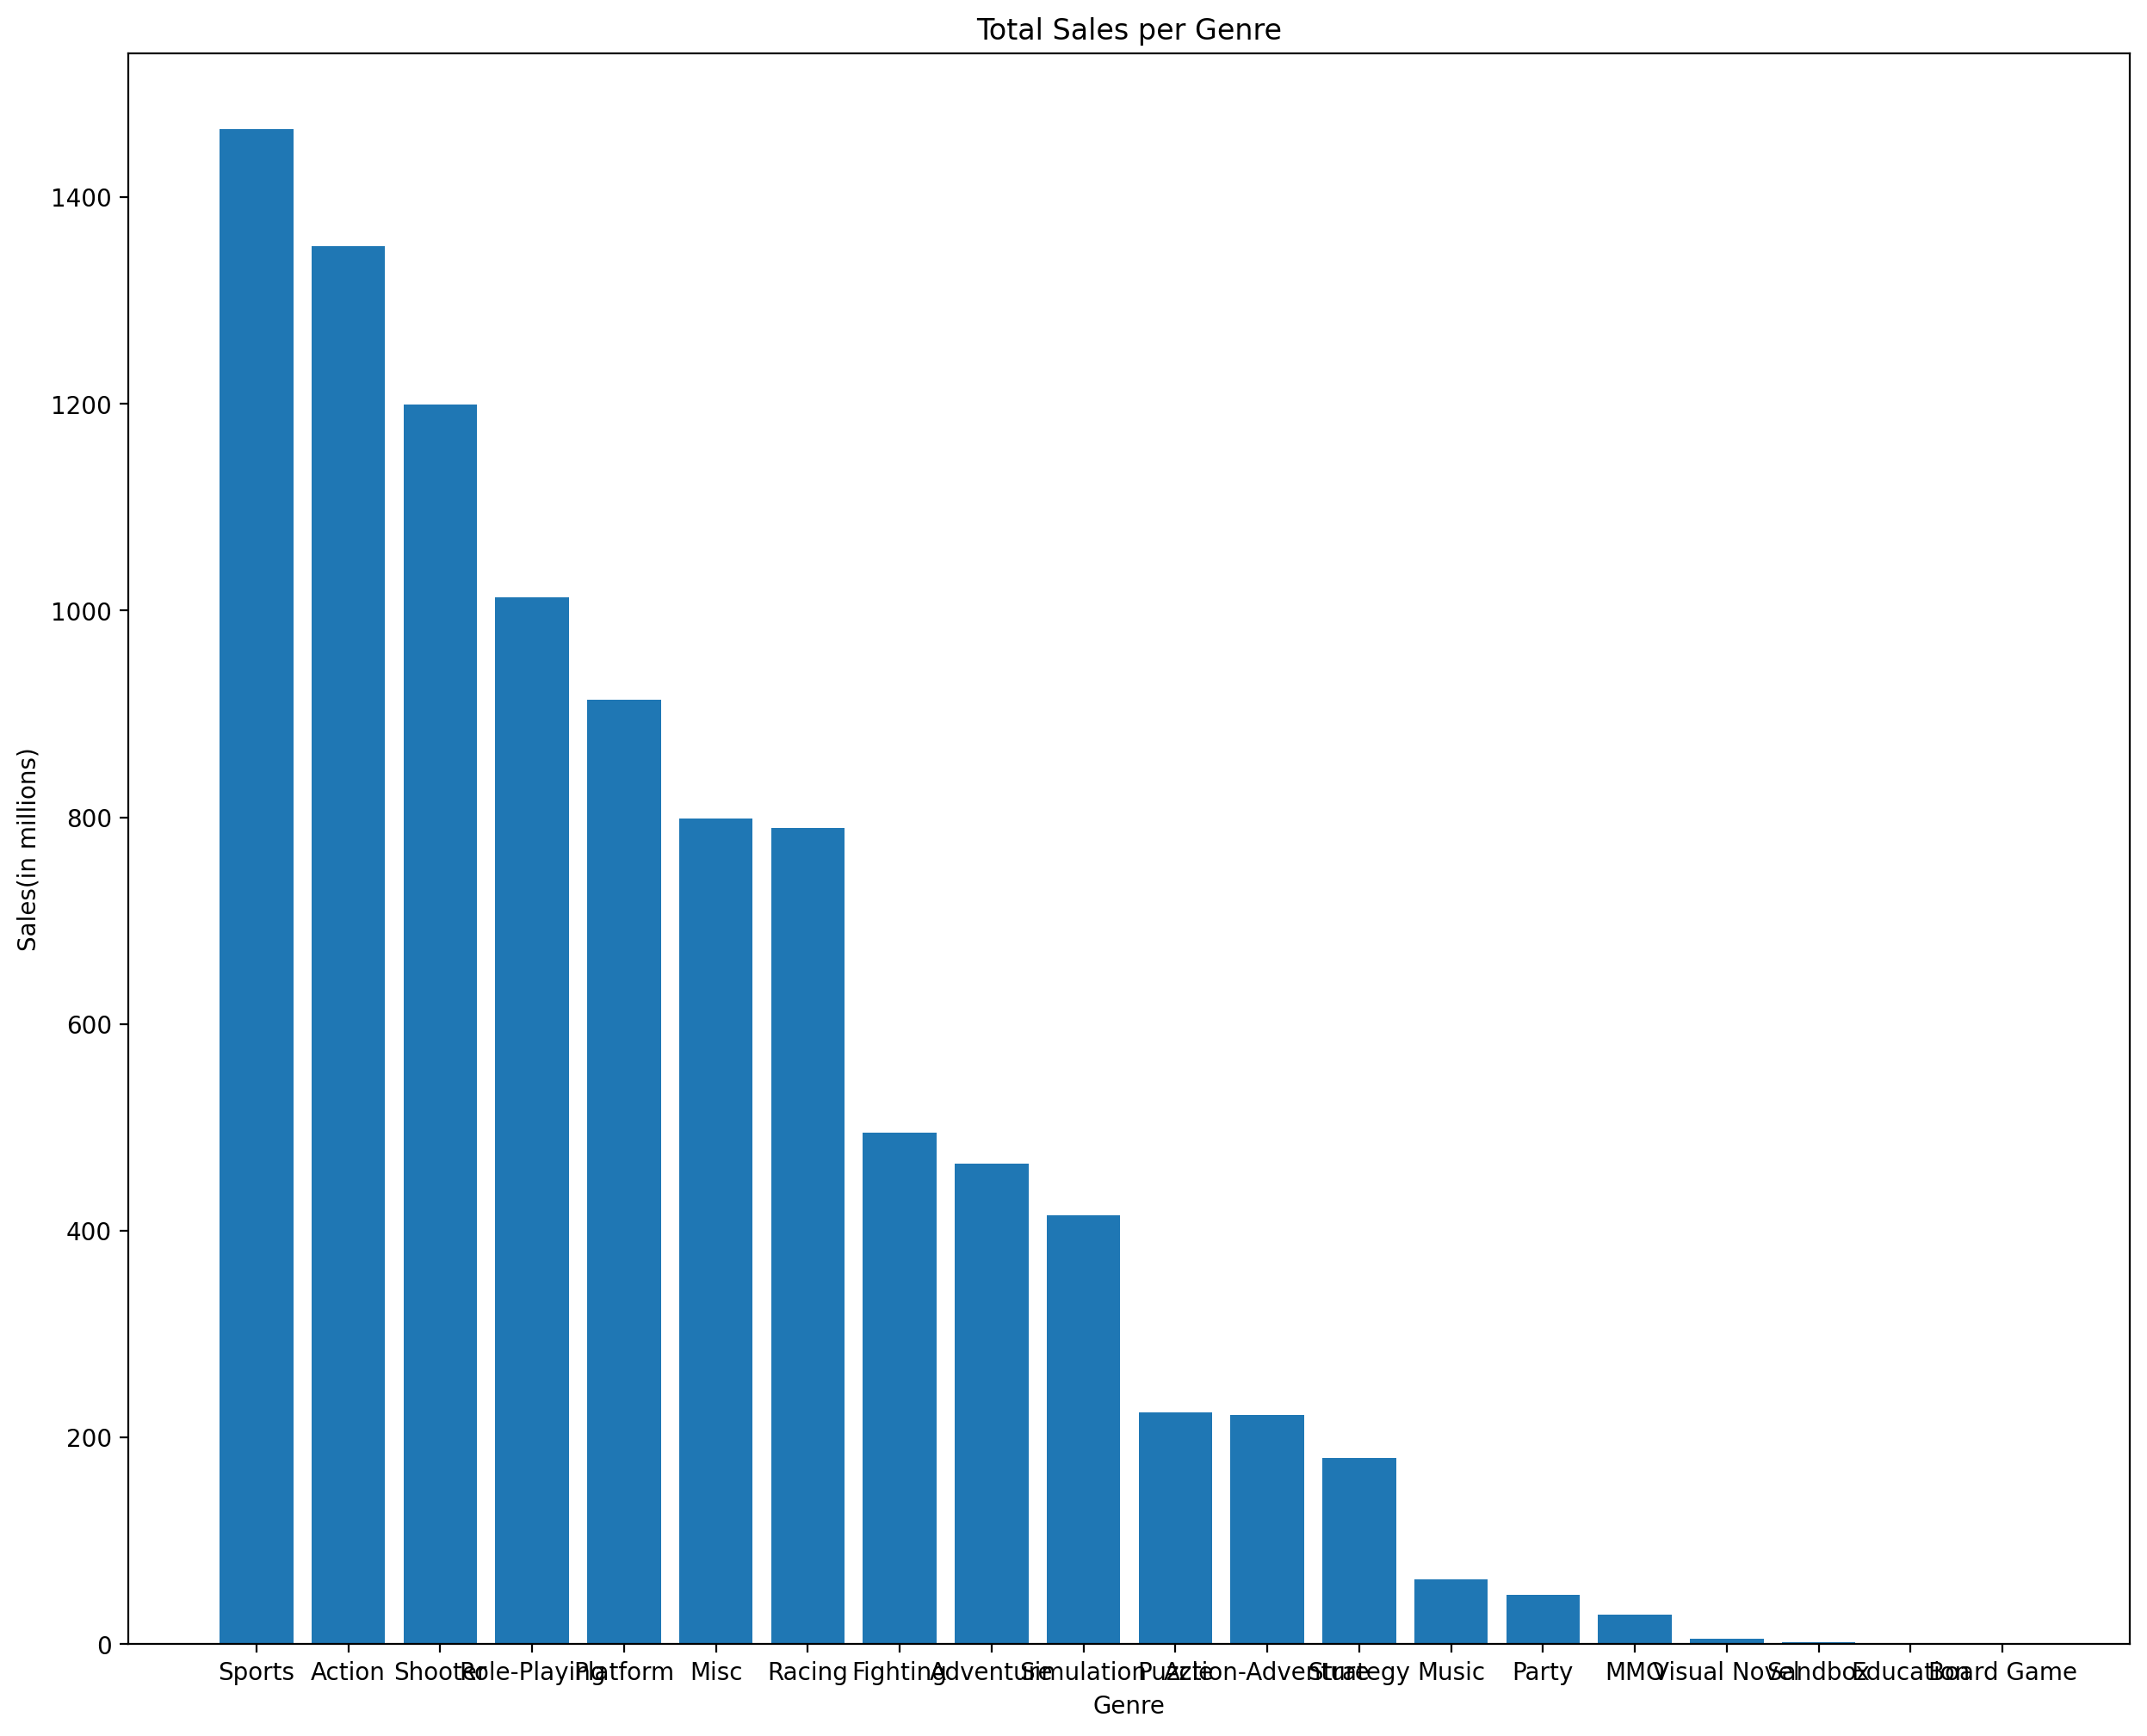

In [177]:
#look at best genres
#look at overall video game sales over time
genre_total_sales = df.groupby(['Genre'],as_index=False,sort=True)['Sales_Globe'].sum().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(15,12))
plt.bar(genre_total_sales['Genre'],genre_total_sales['Sales_Globe'])
plt.title('Total Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Sales(in millions)')
plt.show()

Once again we see action and sports as our top performing genres and puzzle and strategy games as our bottom performer. Some of this trend is a reflection of the total games we have per genre but there are still some differences. For example we see that shooters ranks 3rd in overall sales but is 5th in amount of games. This is a strong indication that shooting games tend to perform strong as they are out selling other genres with a larger catelog. Most of the other data matches similarly with our games per genre graph with slight shifts in placement

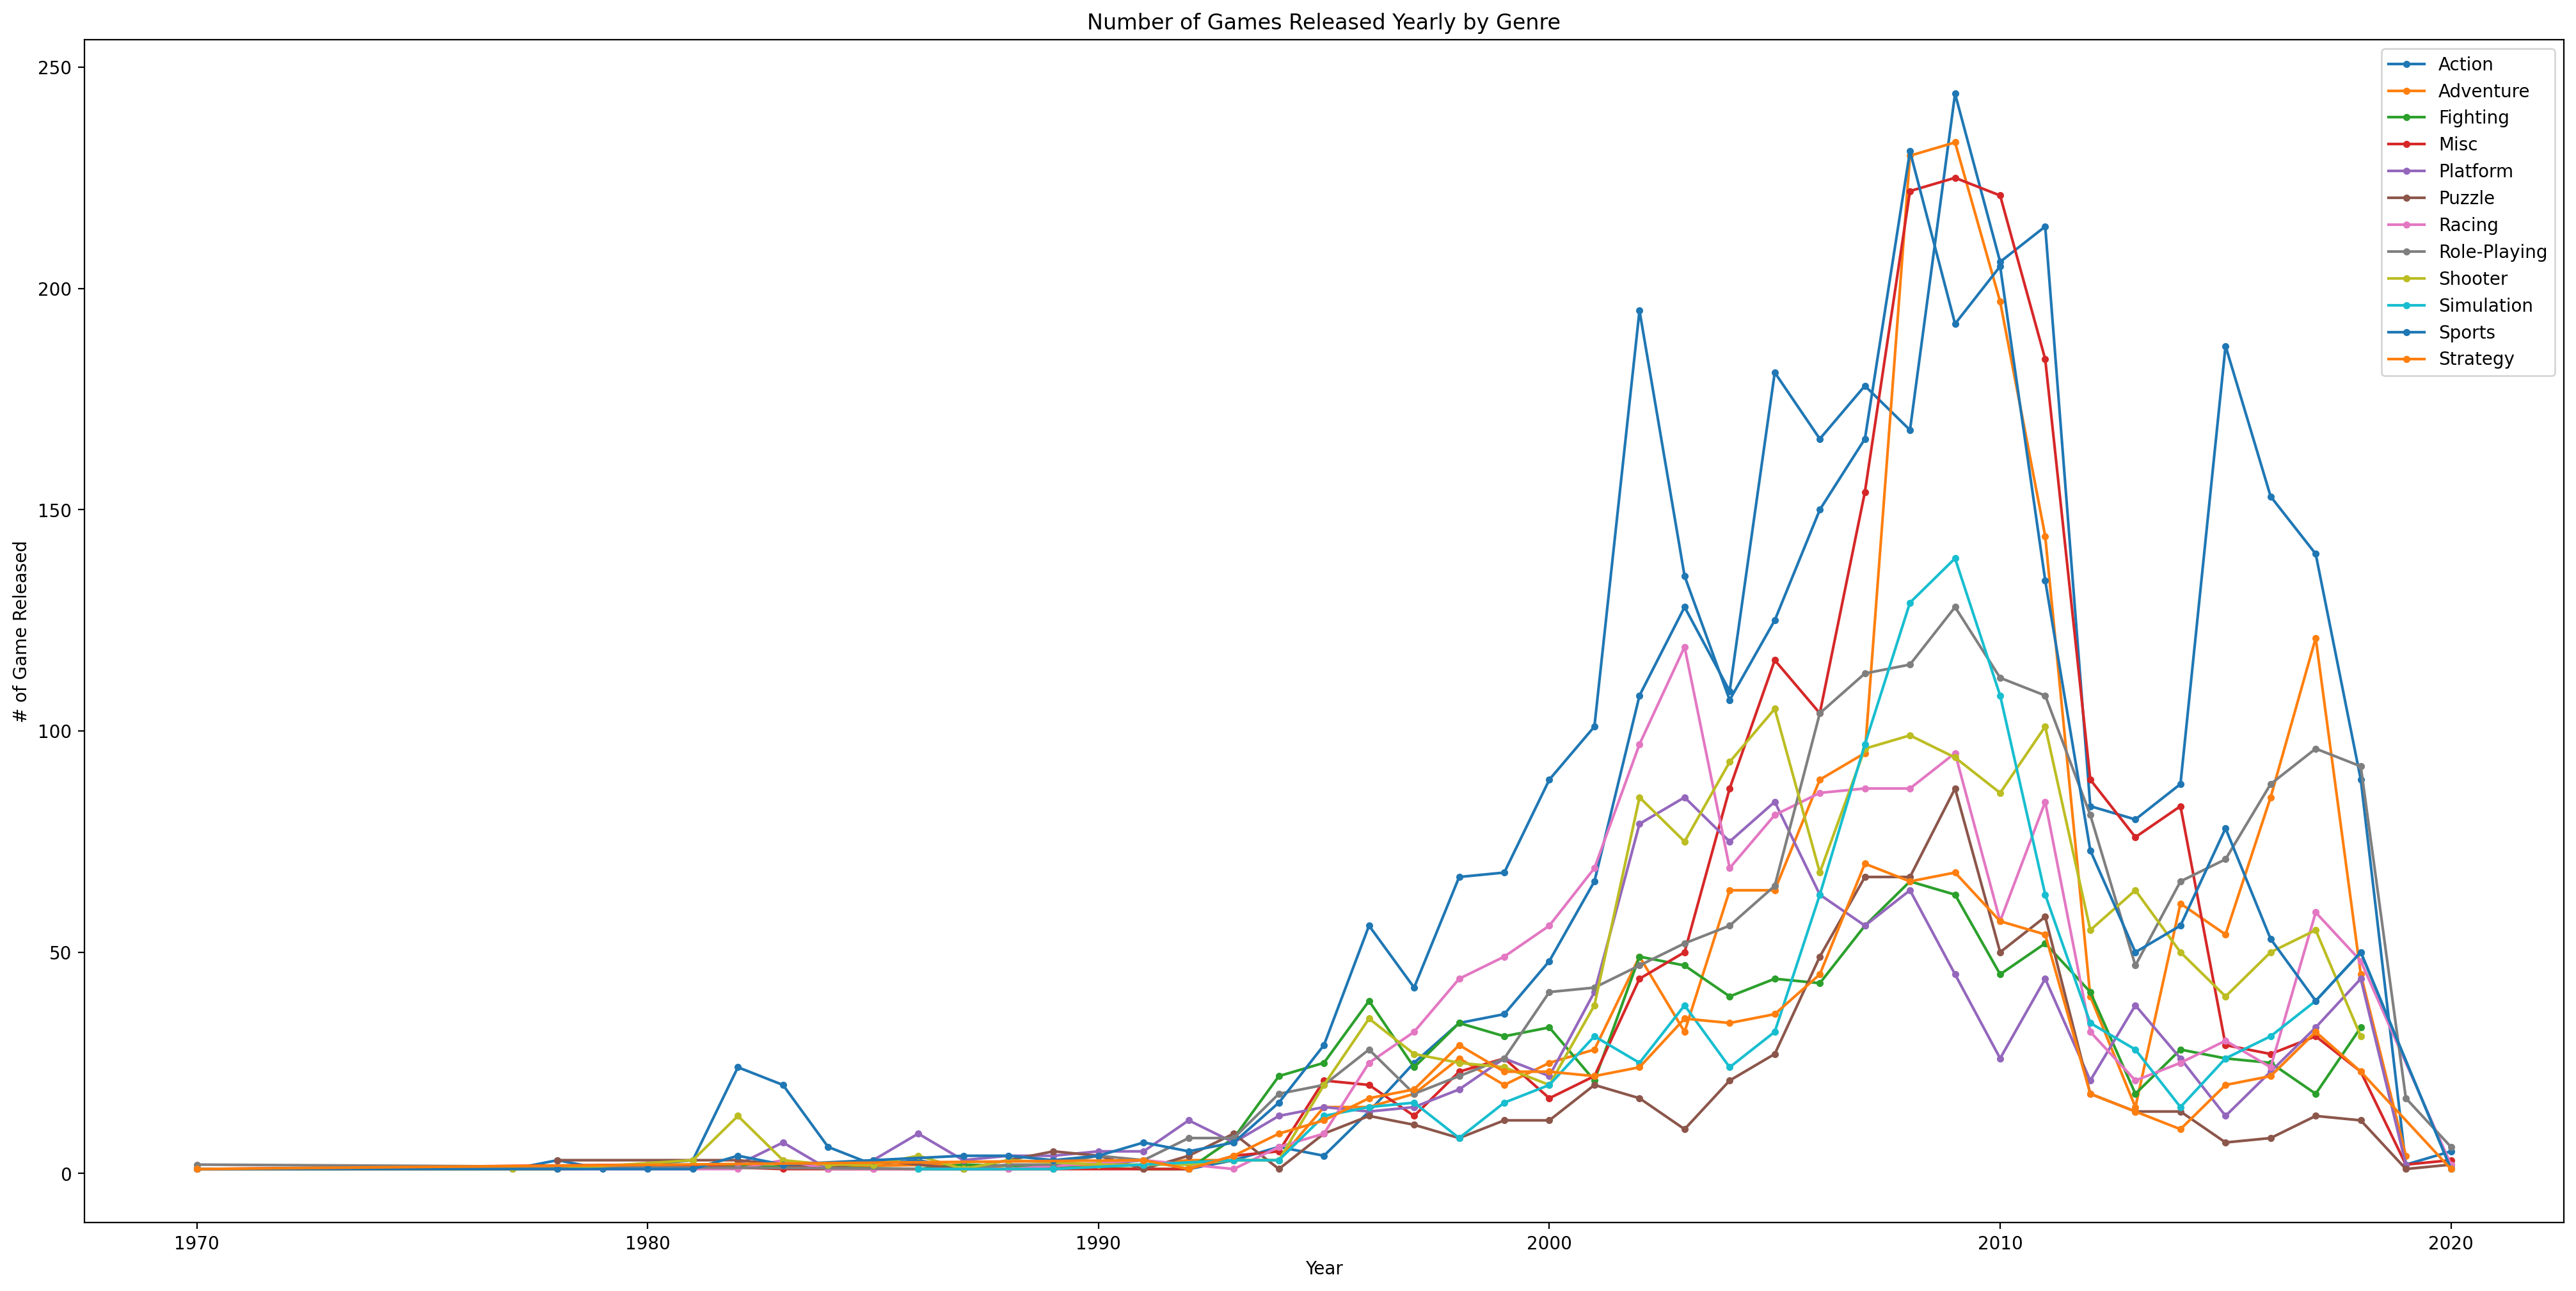

In [178]:
#look at genres trend over time 
#look at yearly release trends, sales trends per genre, best selling games per genre

genre_list = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

genre_yearly_releases = df.groupby(['Genre','Release_date'],as_index=False,sort=True)['Genre'].size()

plt.figure(figsize=(25,12))

for genre in genre_list:
    genre_release = genre_yearly_releases[genre_yearly_releases['Genre'] == genre]
    plt.plot(genre_release['Release_date'], genre_release['size'], label = genre,marker='.')


plt.title('Number of Games Released Yearly by Genre')
plt.xlabel('Year')
plt.ylabel('# of Game Released')
plt.legend()
plt.show()

We see that all genres have a similar trend in the amount of games released per year. They all seem to follow the pattern we've seen of peaking in releases around 2008/2009

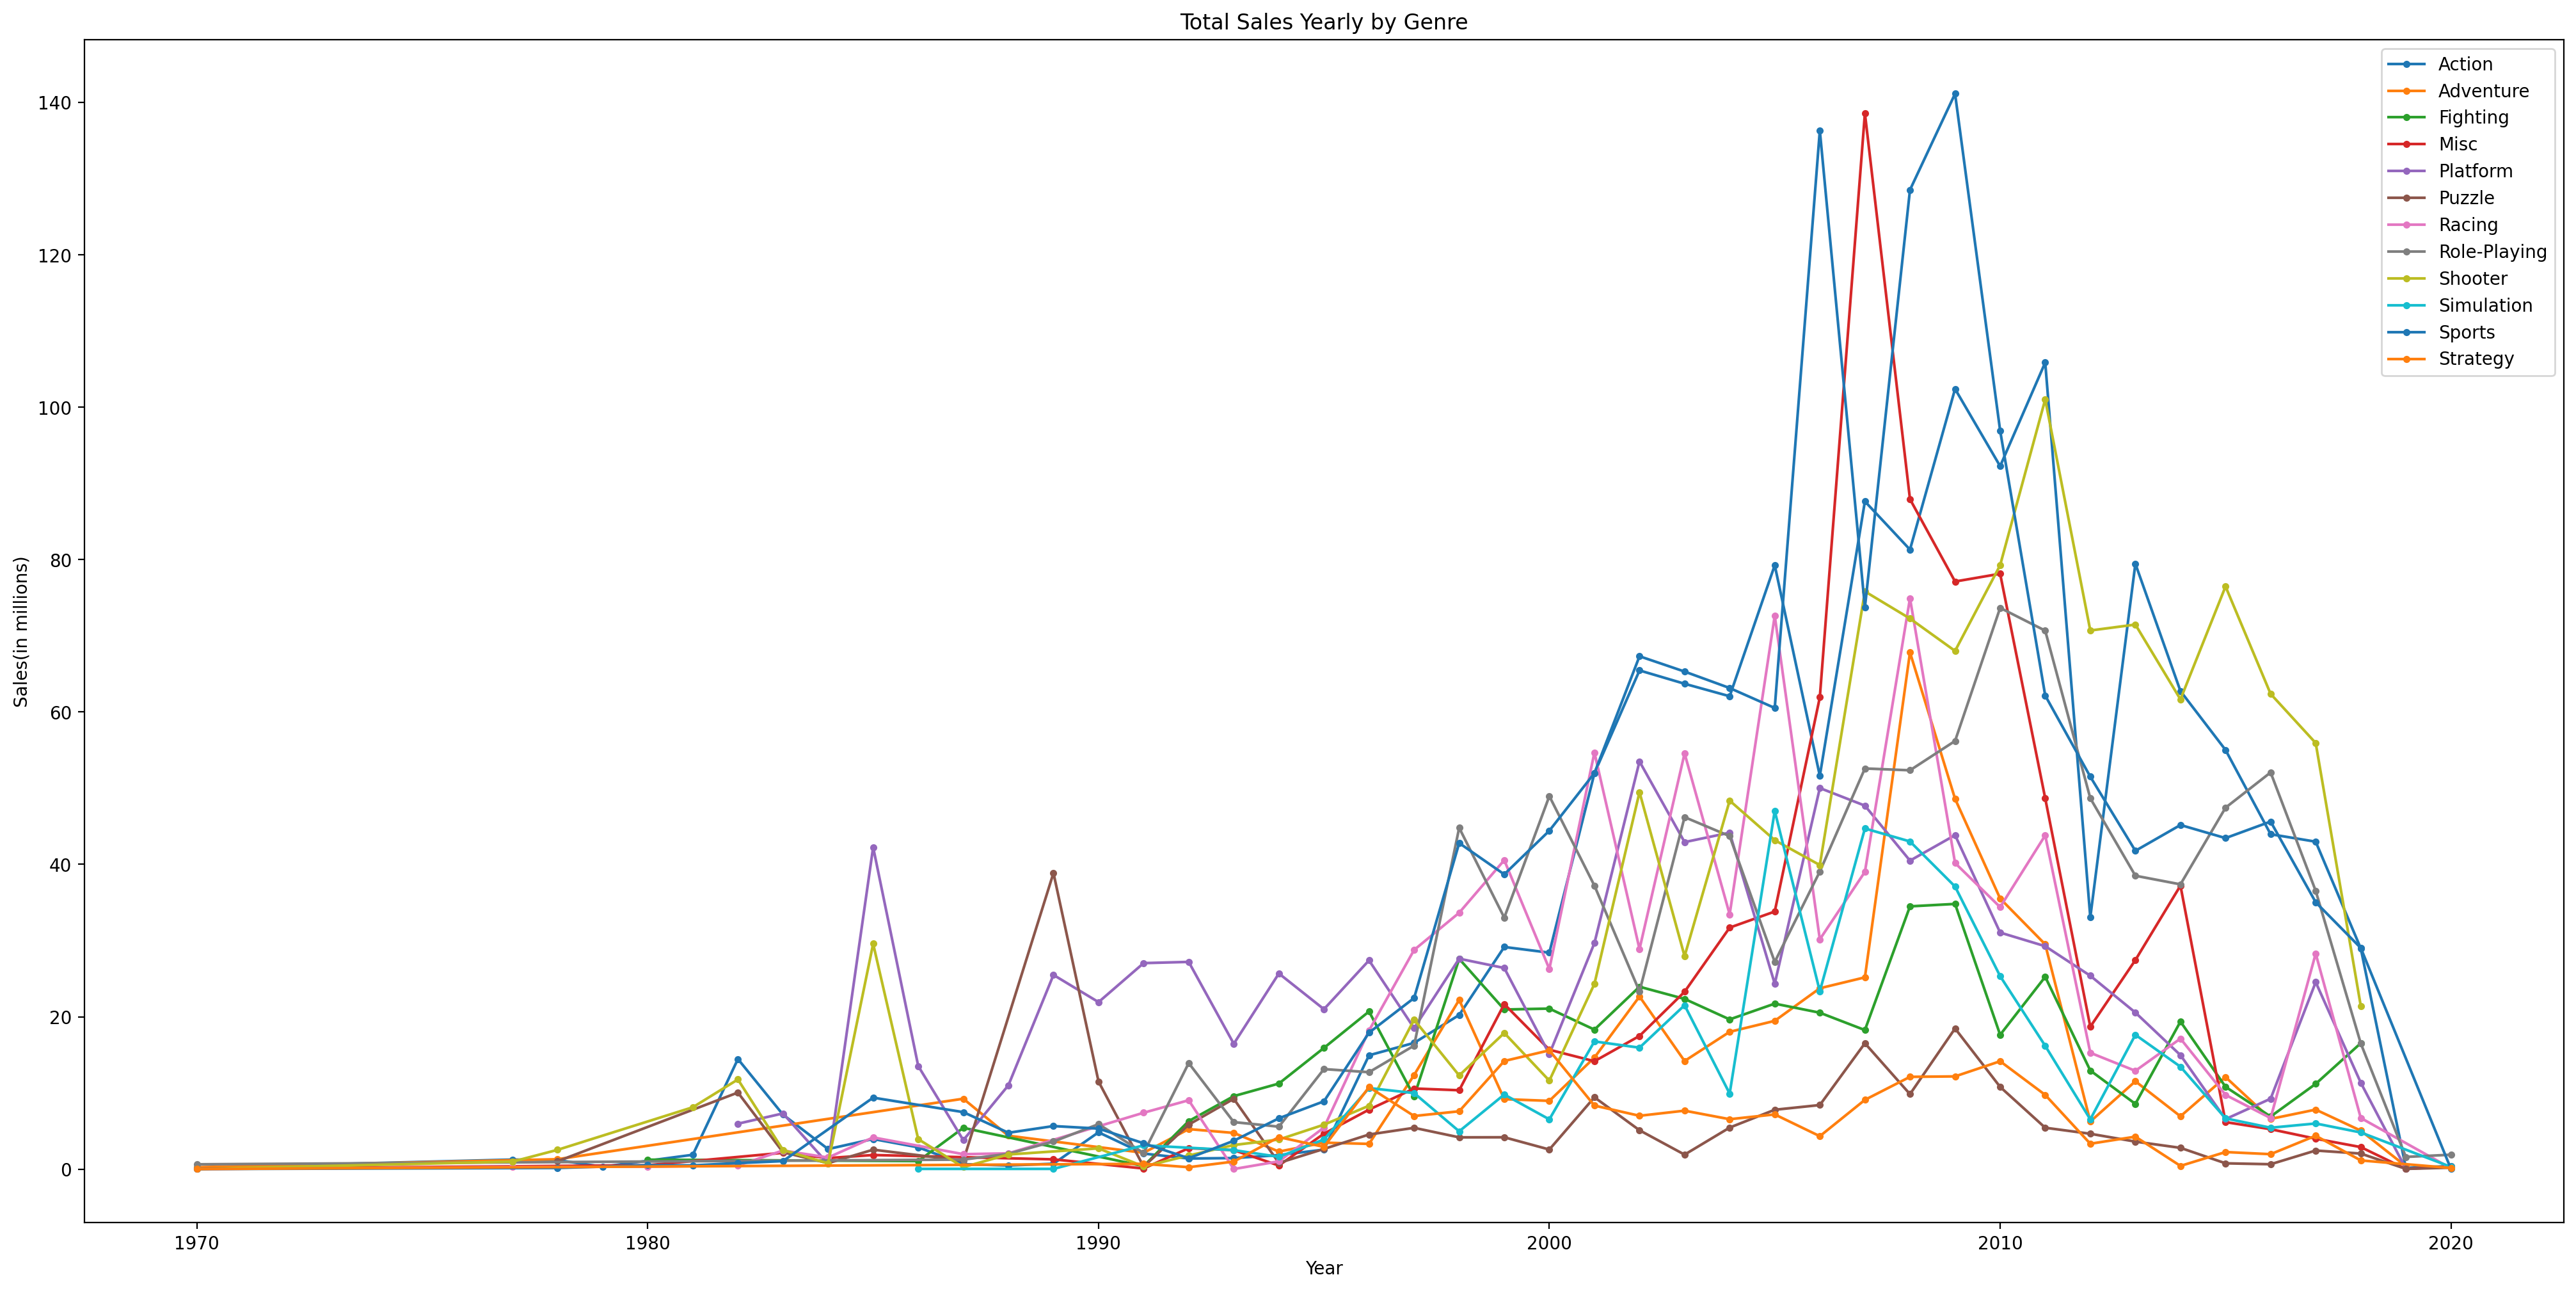

In [179]:
#look at genres trend over time 
#look at sales trends per genre, best selling games per genre


genre_yearly_sales = df.groupby(['Genre','Release_date'],as_index=False,sort=True)['Sales_Globe'].sum()

plt.figure(figsize=(25,12))

for genre in genre_list:
    genre_sales = genre_yearly_sales[genre_yearly_sales['Genre'] == genre]
    plt.plot(genre_sales['Release_date'], genre_sales['Sales_Globe'], label = genre,marker='.')


plt.title('Total Sales Yearly by Genre')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.legend()
plt.show()

In [180]:
#Best selling game per genre

idx_genre = df.groupby(['Genre'])['Sales_Globe'].idxmax()
max_sales_genre = df.loc[idx_genre][['Genre','Name','Sales_Globe']]

max_sales_genre

Genre                                  Name  Sales_Globe
16              Action         Grand Theft Auto: San Andreas        20.81
37    Action-Adventure                 Red Dead Redemption 2        13.94
109          Adventure  The Legend of Zelda: Ocarina of Time         7.60
6241        Board Game          Monopoly for Nintendo Switch         0.30
4085         Education    Sesame Street: Once Upon A Monster         0.52
45            Fighting               Super Smash Bros. Brawl        12.91
151                MMO                     World of Warcraft         6.35
7                 Misc                              Wii Play        28.92
129              Music                          Just Dance 4         6.89
14               Party                    Kinect Adventures!        22.10
1             Platform                     Super Mario Bros.        40.24
5               Puzzle                                Tetris        30.26
2               Racing                        Mario Kart Wii        35.98
4         Role-Playing    Pokémon Red / Green / Blue Version        31.37
1003           Sandbox                             Minecraft         1.89
9              Shooter                             Duck Hunt        28.31
10          Simulation                            Nintendogs        24.68
0               Sports                            Wii Sports        82.65
192           Strategy                       Pokémon Stadium         5.45
8253      Visual Novel                           Steins;Gate         0.19

### Best selling game by region

In [181]:
#Best selling game per region

best_NA_id = df['Sales_NA'].idxmax()
max_sales_NA = df.loc[best_NA_id][['Sales_NA','Name','Genre']]
best_EU_id = df['Sales_PAL'].idxmax()
max_sales_EU = df.loc[best_EU_id][['Sales_PAL','Name','Genre']]
best_JP_id = df['Sales_JP'].idxmax()
max_sales_JP = df.loc[best_JP_id][['Sales_JP','Name','Genre']]
best_Other_id = df['Sales_Other'].idxmax()
max_sales_other = df.loc[best_Other_id][['Sales_Other','Name','Genre']]

#set up data
max_regions = ['North America','Europe','Japan','Other']
max_names = [max_sales_NA[1],max_sales_EU[1],max_sales_JP[1],max_sales_other[1]]
max_genre = [max_sales_NA[2],max_sales_EU[2],max_sales_JP[2],max_sales_other[2]]
max_sales = [max_sales_NA[0],max_sales_EU[0],max_sales_JP[0],max_sales_other[0]]

#set up dataframe
most_sales_per_region = pd.DataFrame(data = {
    'Region' : max_regions,
    'Name' : max_names,
    'Genre' : max_genre,
    'Sales' : max_sales
})

most_sales_per_region

C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\2141513736.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_names = [max_sales_NA[1],max_sales_EU[1],max_sales_JP[1],max_sales_other[1]]
C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\2141513736.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_genre = [max_sales_NA[2],max_sales_EU[2],max_sales_JP[2],max_sales_other[2]]
C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\2141513736.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Dat

Region                                Name         Genre  Sales
0  North America                          Wii Sports        Sports  41.36
1         Europe                          Wii Sports        Sports  29.02
2          Japan  Pokémon Red / Green / Blue Version  Role-Playing  10.22
3          Other       Grand Theft Auto: San Andreas        Action  10.57

In [182]:
max_names

['Wii Sports',
 'Wii Sports',
 'Pokémon Red / Green / Blue Version',
 'Grand Theft Auto: San Andreas']

### Console Information

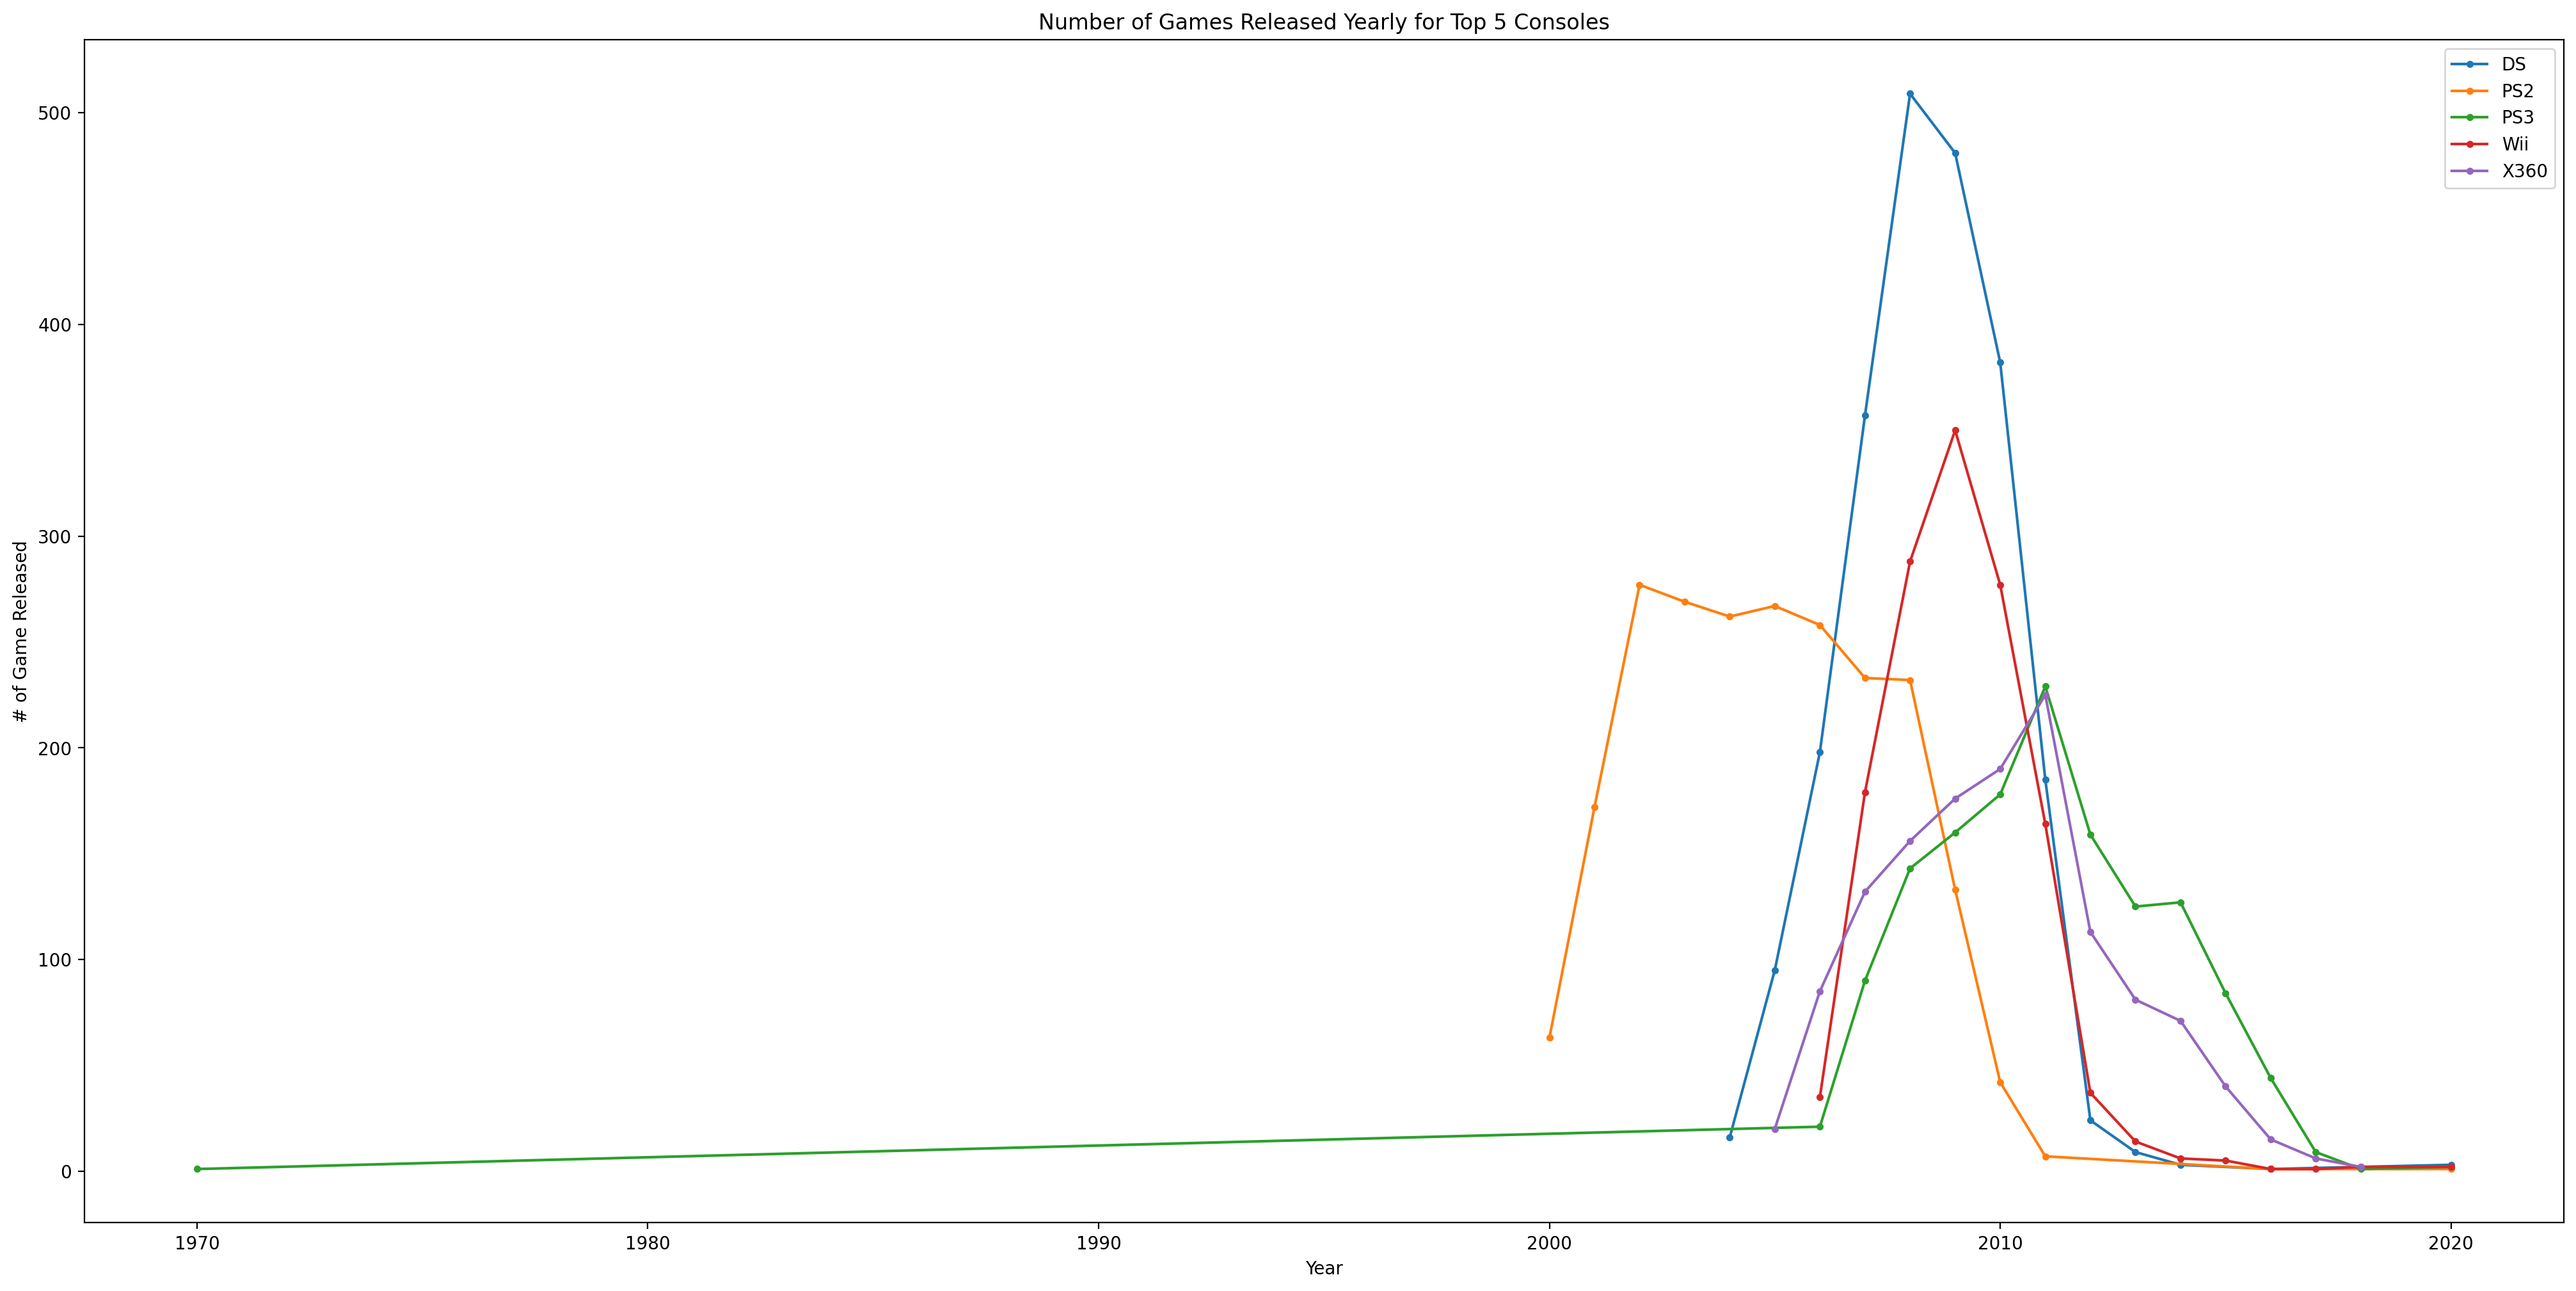

In [183]:
#look at console information
console_list = ['DS','PS2','PS3','Wii','X360']

console_yearly_releases = df.groupby(['Platform','Release_date'],as_index=False,sort=True)['Platform'].size()

plt.figure(figsize=(25,12))

for console in console_list:
    console_release = console_yearly_releases[console_yearly_releases['Platform'] == console]
    plt.plot(console_release['Release_date'], console_release['size'], label = console,marker='.')


plt.title('Number of Games Released Yearly for Top 5 Consoles')
plt.xlabel('Year')
plt.ylabel('# of Game Released')
plt.legend()
plt.show()

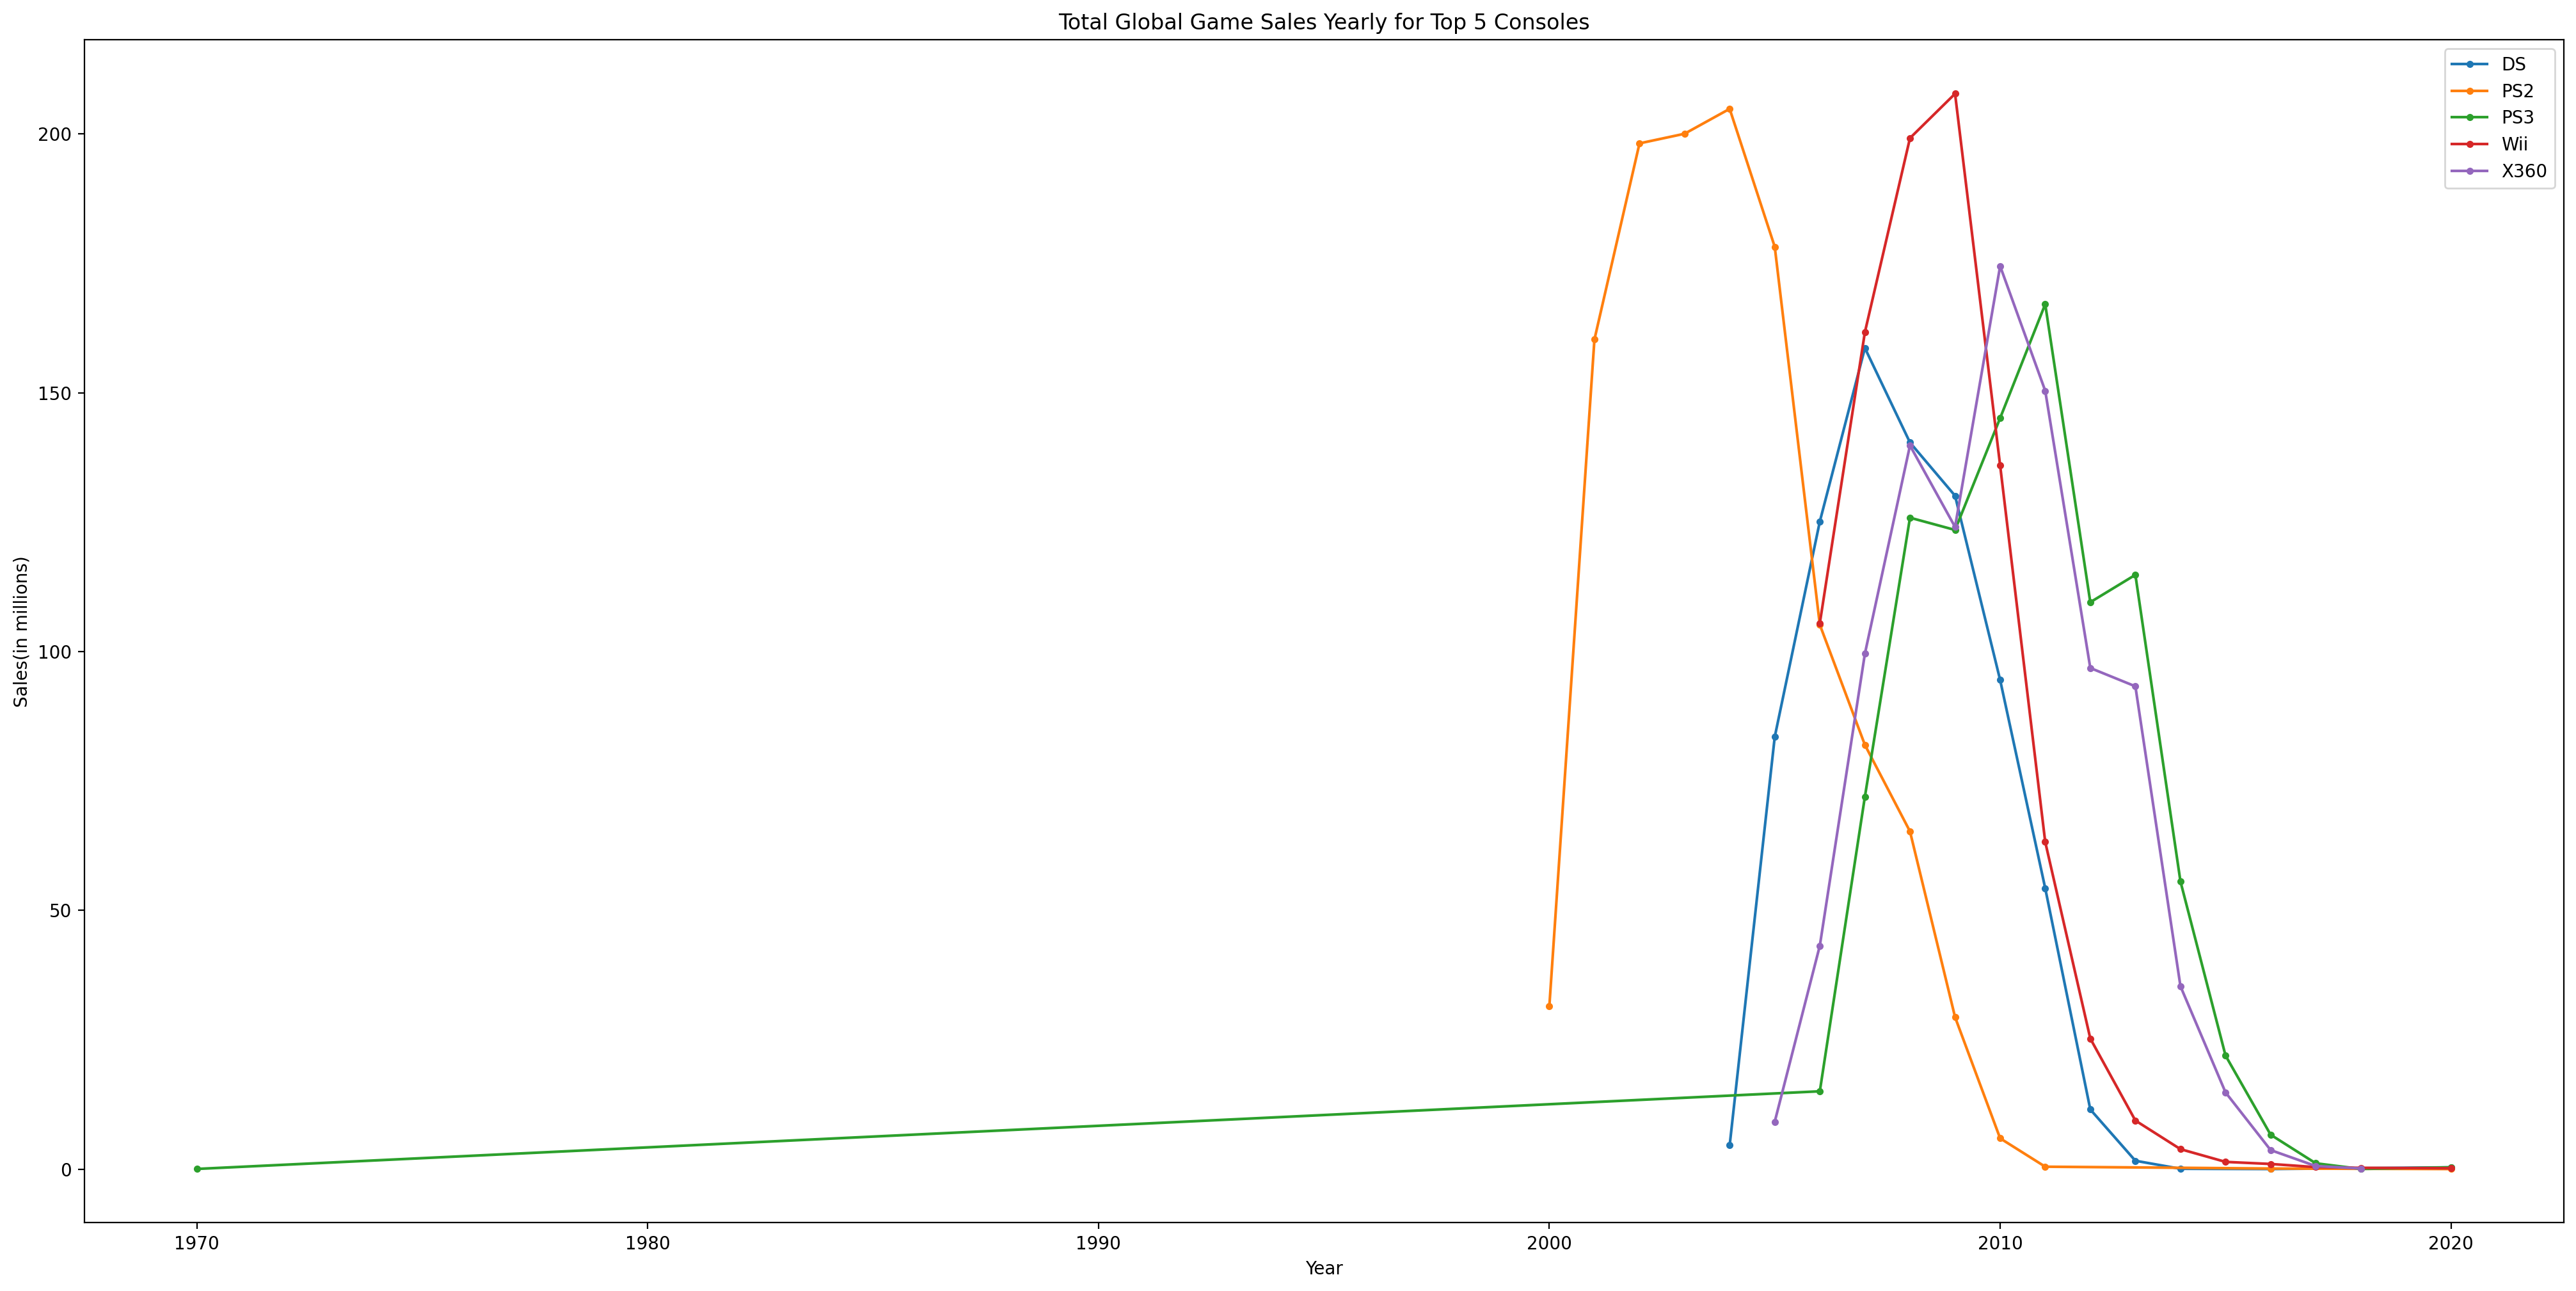

In [184]:
#most popular genres per console

console_yearly_sales = df.groupby(['Platform','Release_date'],as_index=False,sort=True)['Sales_Globe'].sum()

plt.figure(figsize=(25,12))

for console in console_list:
    console_sales = console_yearly_sales[console_yearly_sales['Platform'] == console]
    plt.plot(console_sales['Release_date'], console_sales['Sales_Globe'], label = console,marker='.')

plt.title('Total Global Game Sales Yearly for Top 5 Consoles')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.legend()
plt.show()

In [185]:
#best selling games for top 5 console
game_sales_per_console_id = df.groupby(df['Platform'],as_index=False,sort=True)['Sales_Globe'].idxmax()

max_game_DS = np.array(df.loc[game_sales_per_console_id[game_sales_per_console_id['Platform'] == 'DS']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_PS2 = np.array(df.loc[game_sales_per_console_id[game_sales_per_console_id['Platform'] == 'PS2']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_PS3 = np.array(df.loc[game_sales_per_console_id[game_sales_per_console_id['Platform'] == 'PS3']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_Wii = np.array(df.loc[game_sales_per_console_id[game_sales_per_console_id['Platform'] == 'Wii']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_X360 = np.array(df.loc[game_sales_per_console_id[game_sales_per_console_id['Platform'] == 'X360']['Sales_Globe']][['Name','Genre','Sales_Globe']])

max_games_name = [max_game_DS[0][0],max_game_PS2[0][0],max_game_PS3[0][0],max_game_Wii[0][0],max_game_X360[0][0]]
max_games_genre = [max_game_DS[0][1],max_game_PS2[0][1],max_game_PS3[0][1],max_game_Wii[0][1],max_game_X360[0][1]]
max_games_sales = [max_game_DS[0][2],max_game_PS2[0][2],max_game_PS3[0][2],max_game_Wii[0][2],max_game_X360[0][2]]

#set up dataframe
most_sales_per_console = pd.DataFrame(data = {
    'Console' : console_list,
    'Name' : max_games_name,
    'Genre' : max_games_genre,
    'Sales' : max_games_sales
})

most_sales_per_console


Console                           Name     Genre  Sales
0      DS          New Super Mario Bros.  Platform  29.85
1     PS2  Grand Theft Auto: San Andreas    Action  20.81
2     PS3             Grand Theft Auto V    Action  20.32
3     Wii                     Wii Sports    Sports  82.65
4    X360             Kinect Adventures!     Party  22.10

In [186]:
#look at publisher info
#top release publishers

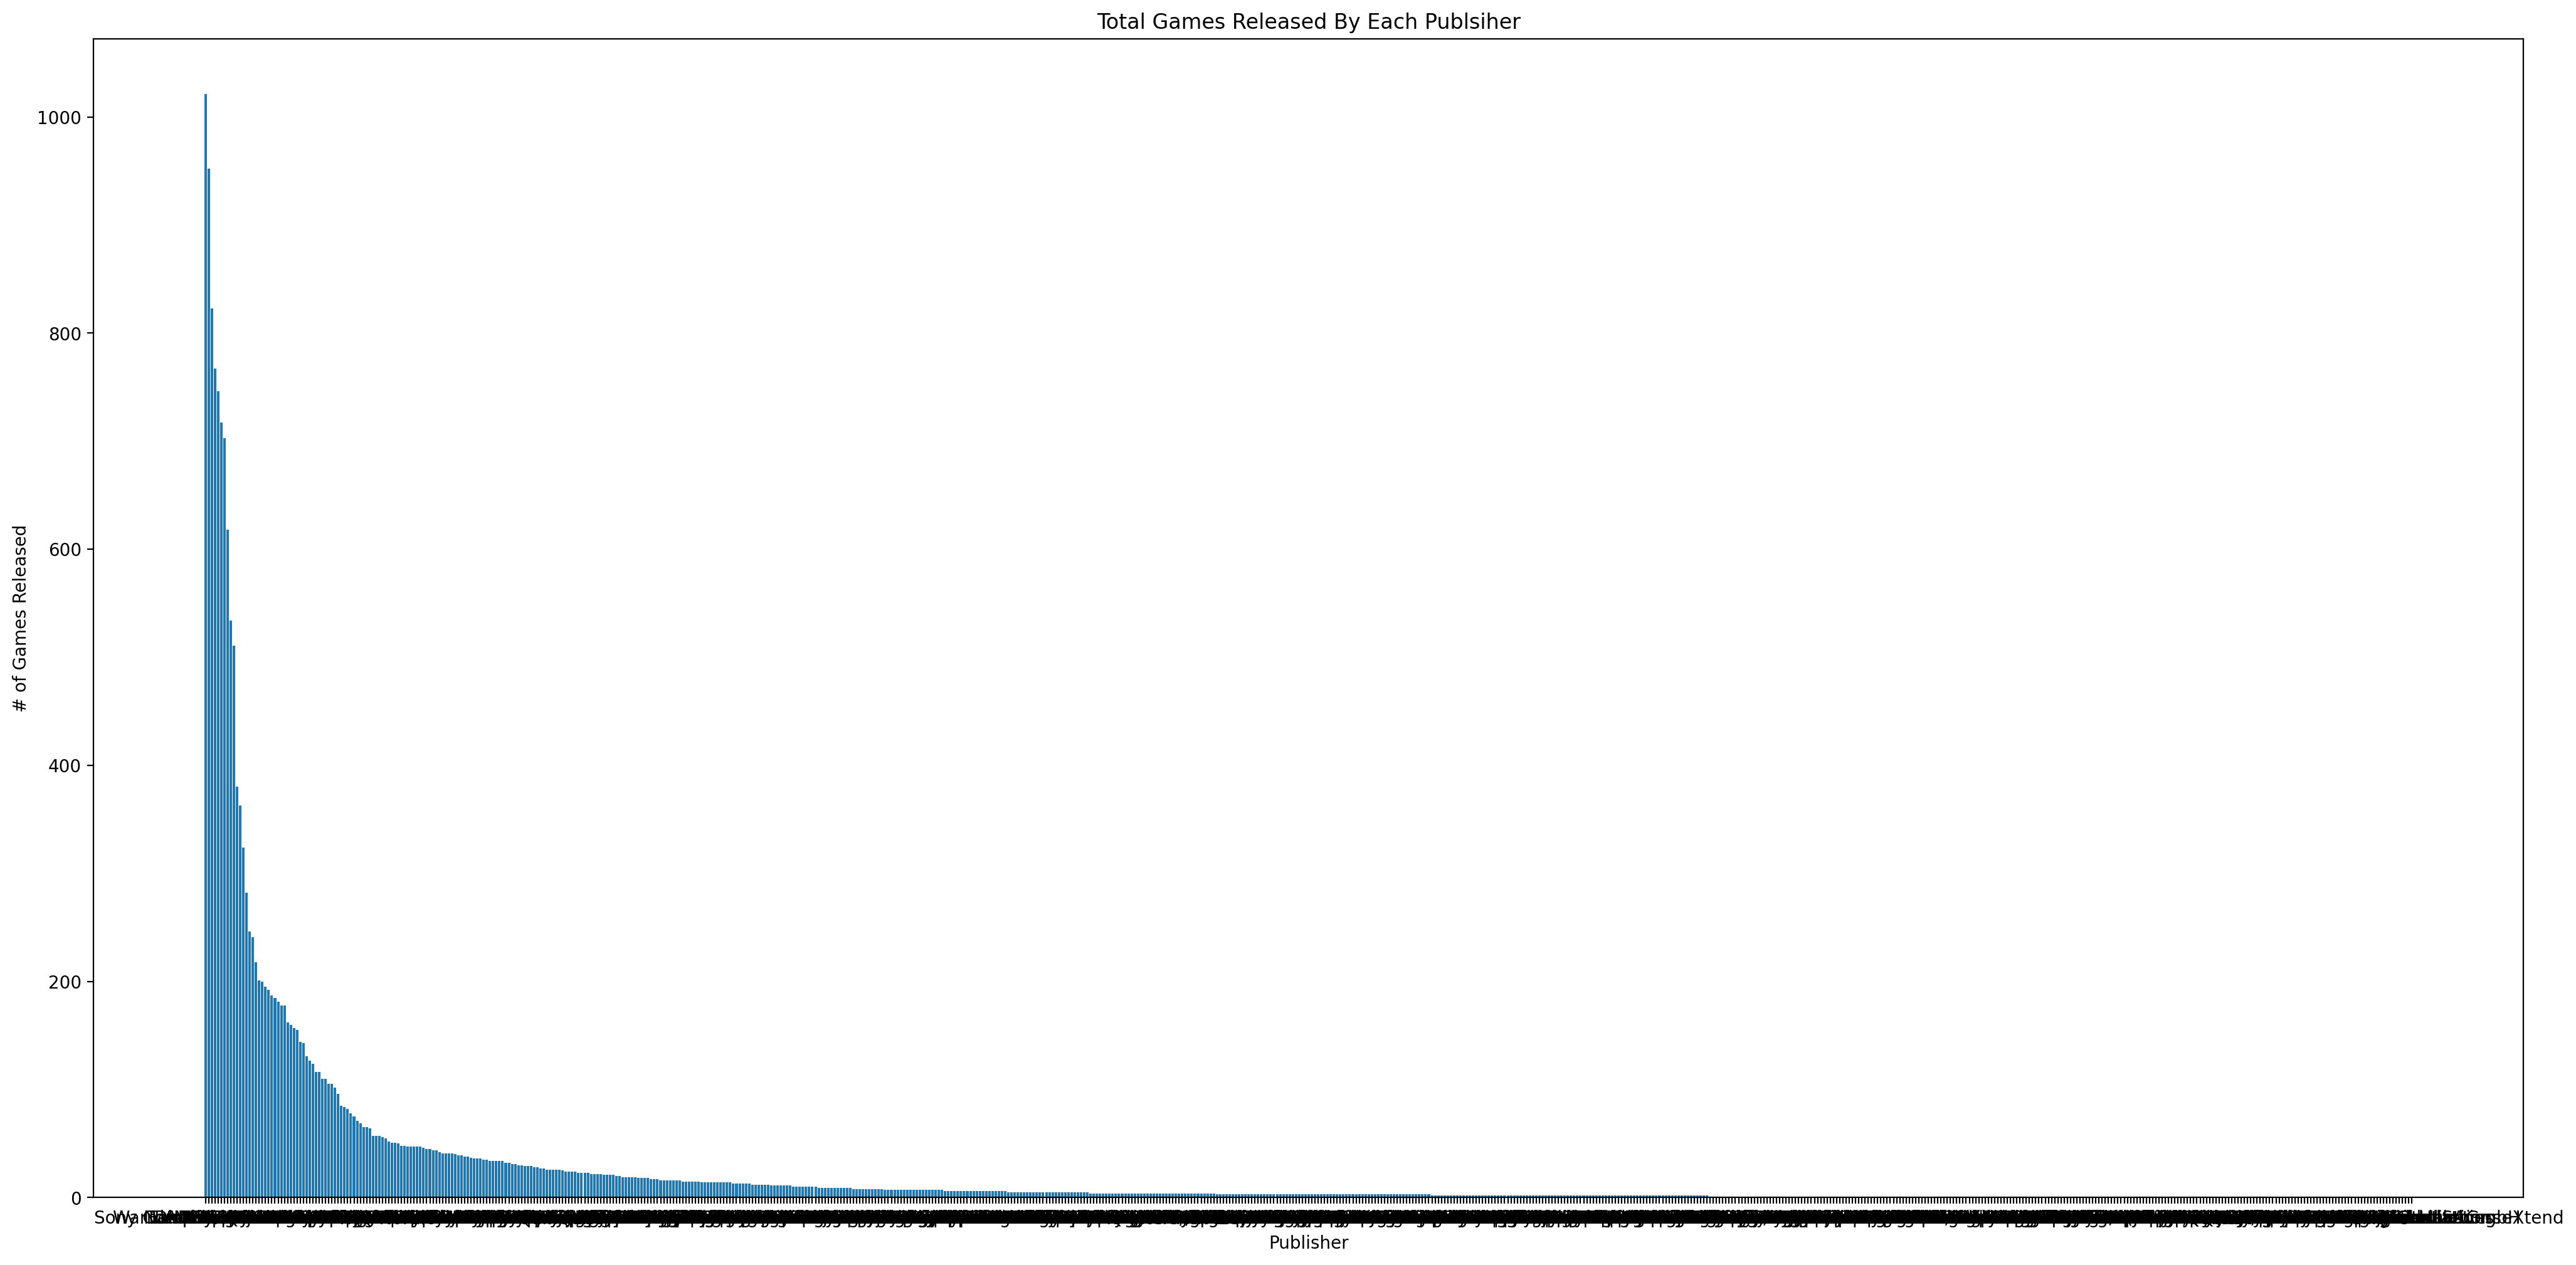

In [187]:
#Total sales for each publisher
publisher_total_releases = df.groupby(['Publisher'],as_index=False,sort=True)['Sales_Globe'].count().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(25,12))
plt.bar(publisher_total_releases['Publisher'],publisher_total_releases['Sales_Globe'])
plt.title('Total Games Released By Each Publsiher')
plt.xlabel('Publisher')
plt.ylabel('# of Games Released')
plt.show()

Can see that the releases decrease exponentially between publishers so we will focus on top 10

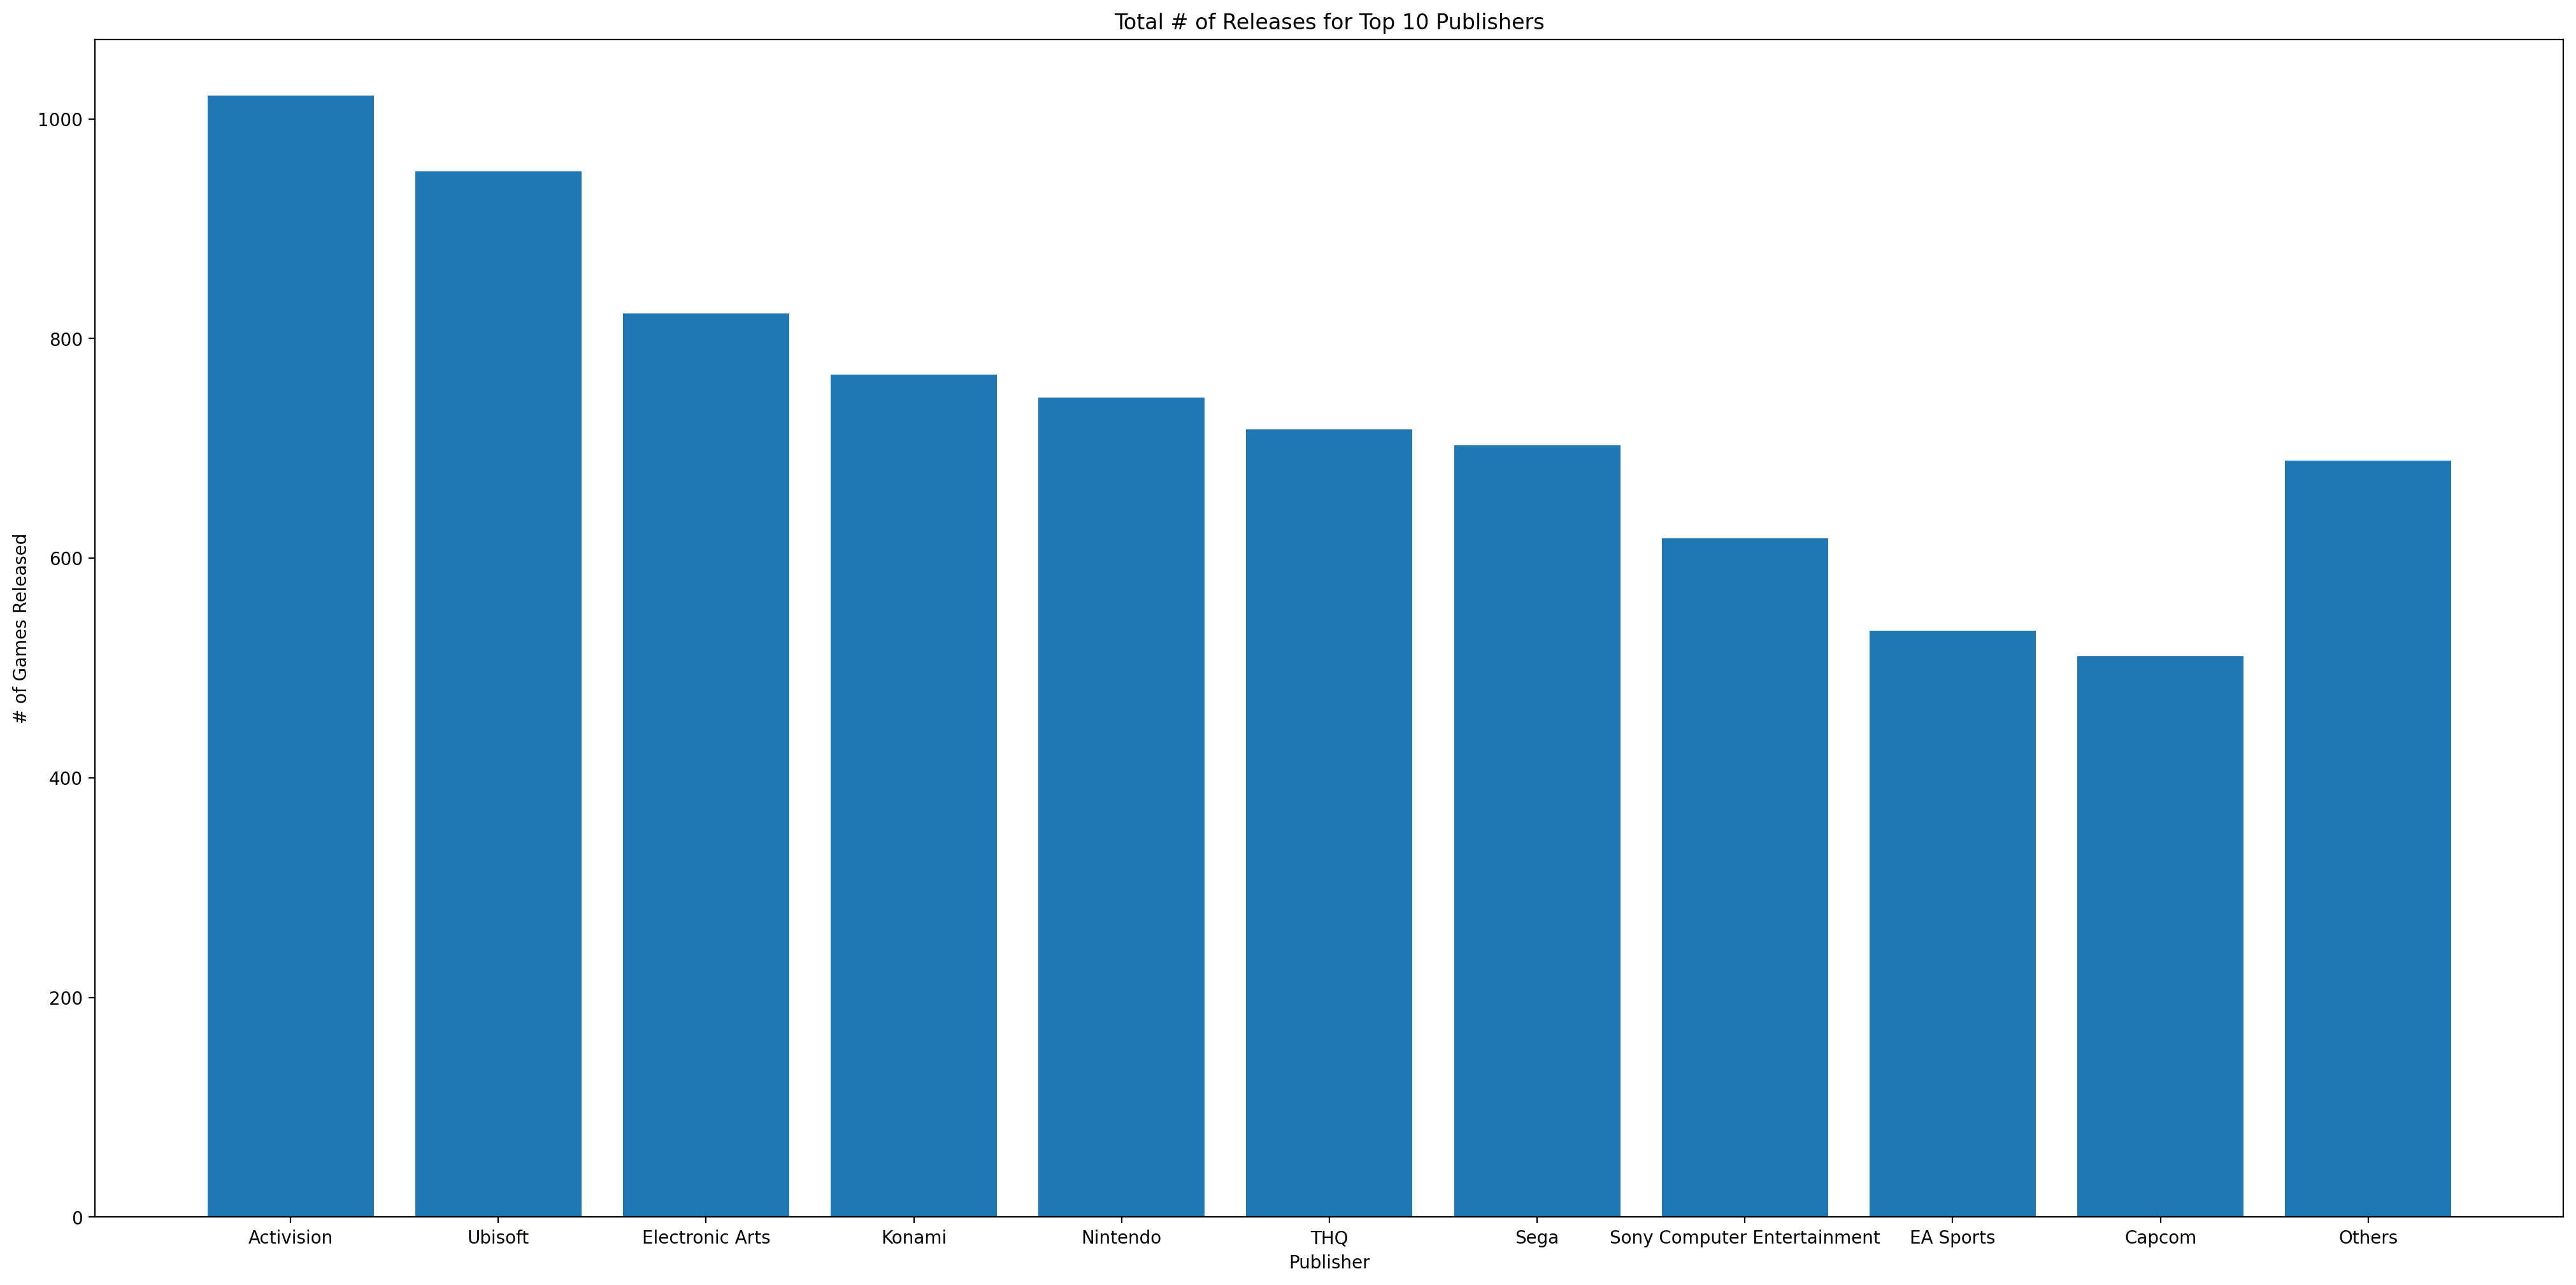

In [188]:
#Isolate top 10 publishers
top_10_publishers_releases = pd.DataFrame(publisher_total_releases[:10])

#The rest of the publishers
other_publishers_releases = pd.DataFrame(publisher_total_releases[10:])

#Add all other publisher info together and put under name 'Other'
top_10_publishers_releases.loc[len(top_10_publishers_releases.index)] = ['Others',other_publishers_releases['Sales_Globe'].count()]

#graph
plt.figure(figsize =(25,12))
plt.bar(top_10_publishers_releases['Publisher'],top_10_publishers_releases['Sales_Globe'])
plt.title('Total # of Releases for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('# of Games Released')
plt.show()

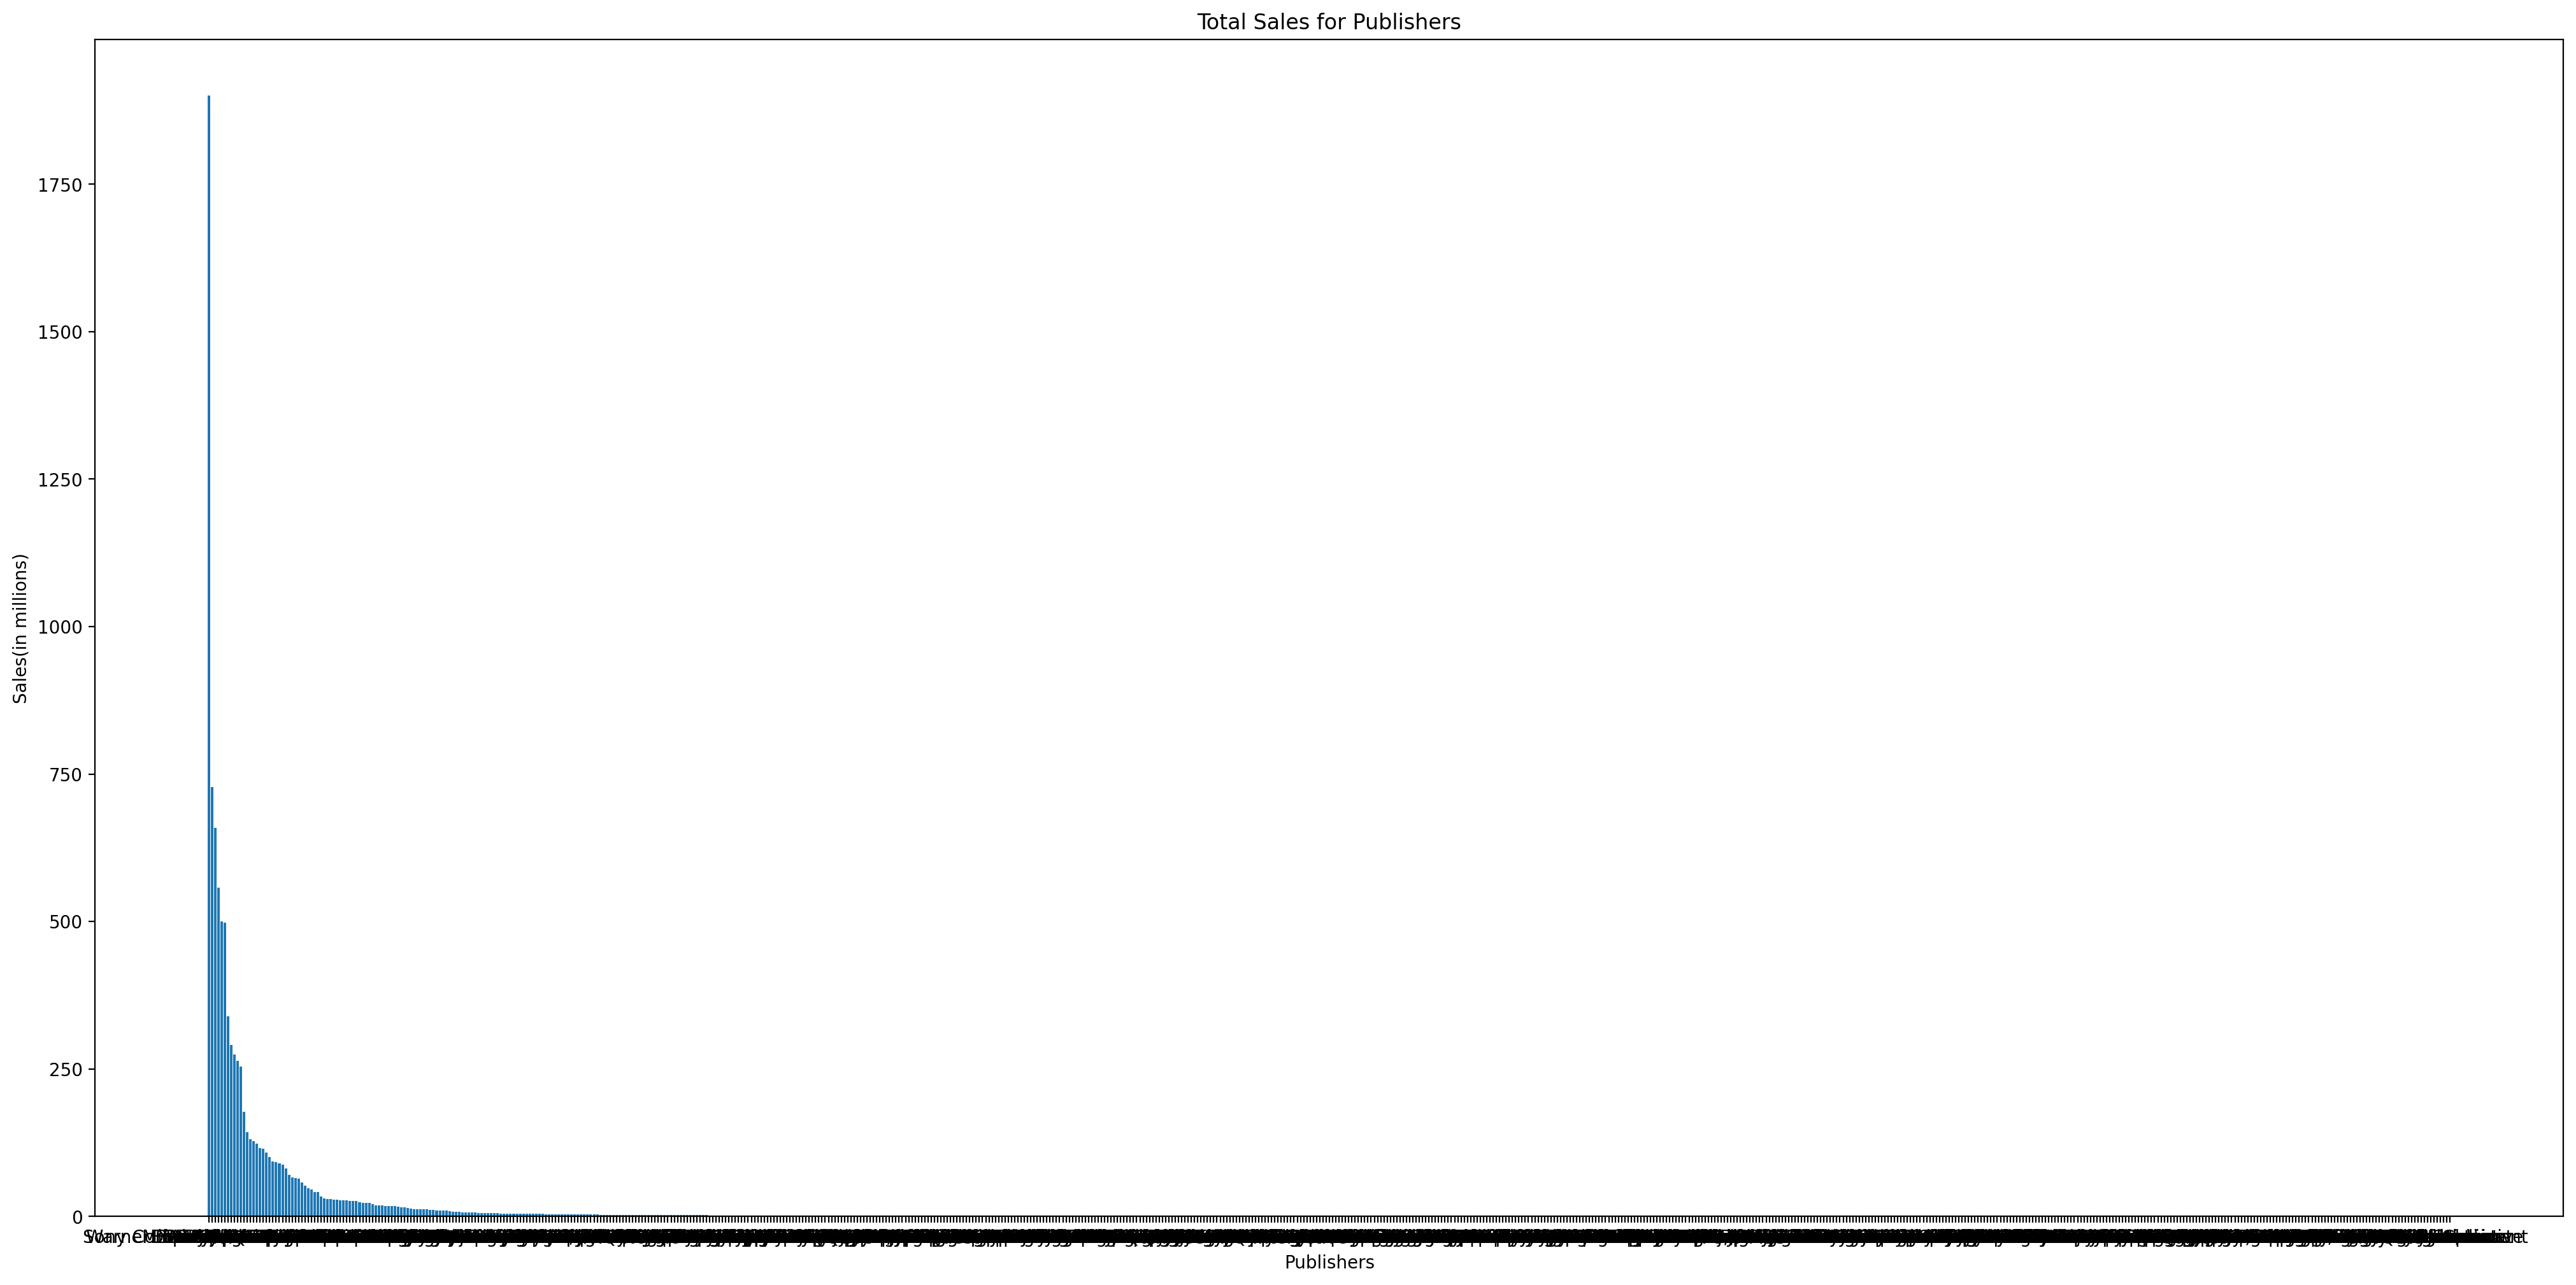

In [189]:
#top selling publishers


#Total sales for each publisher
publisher_total_sales = df.groupby(['Publisher'],as_index=False,sort=True)['Sales_Globe'].sum().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(25,12))
plt.bar(publisher_total_sales['Publisher'],publisher_total_sales['Sales_Globe'])
plt.title('Total Sales for Publishers')
plt.xlabel('Publishers')
plt.ylabel('Sales(in millions)')
plt.show()


Very similar to releases, we can see that the sales decrease exponentially between publishers so we will focus on top 10

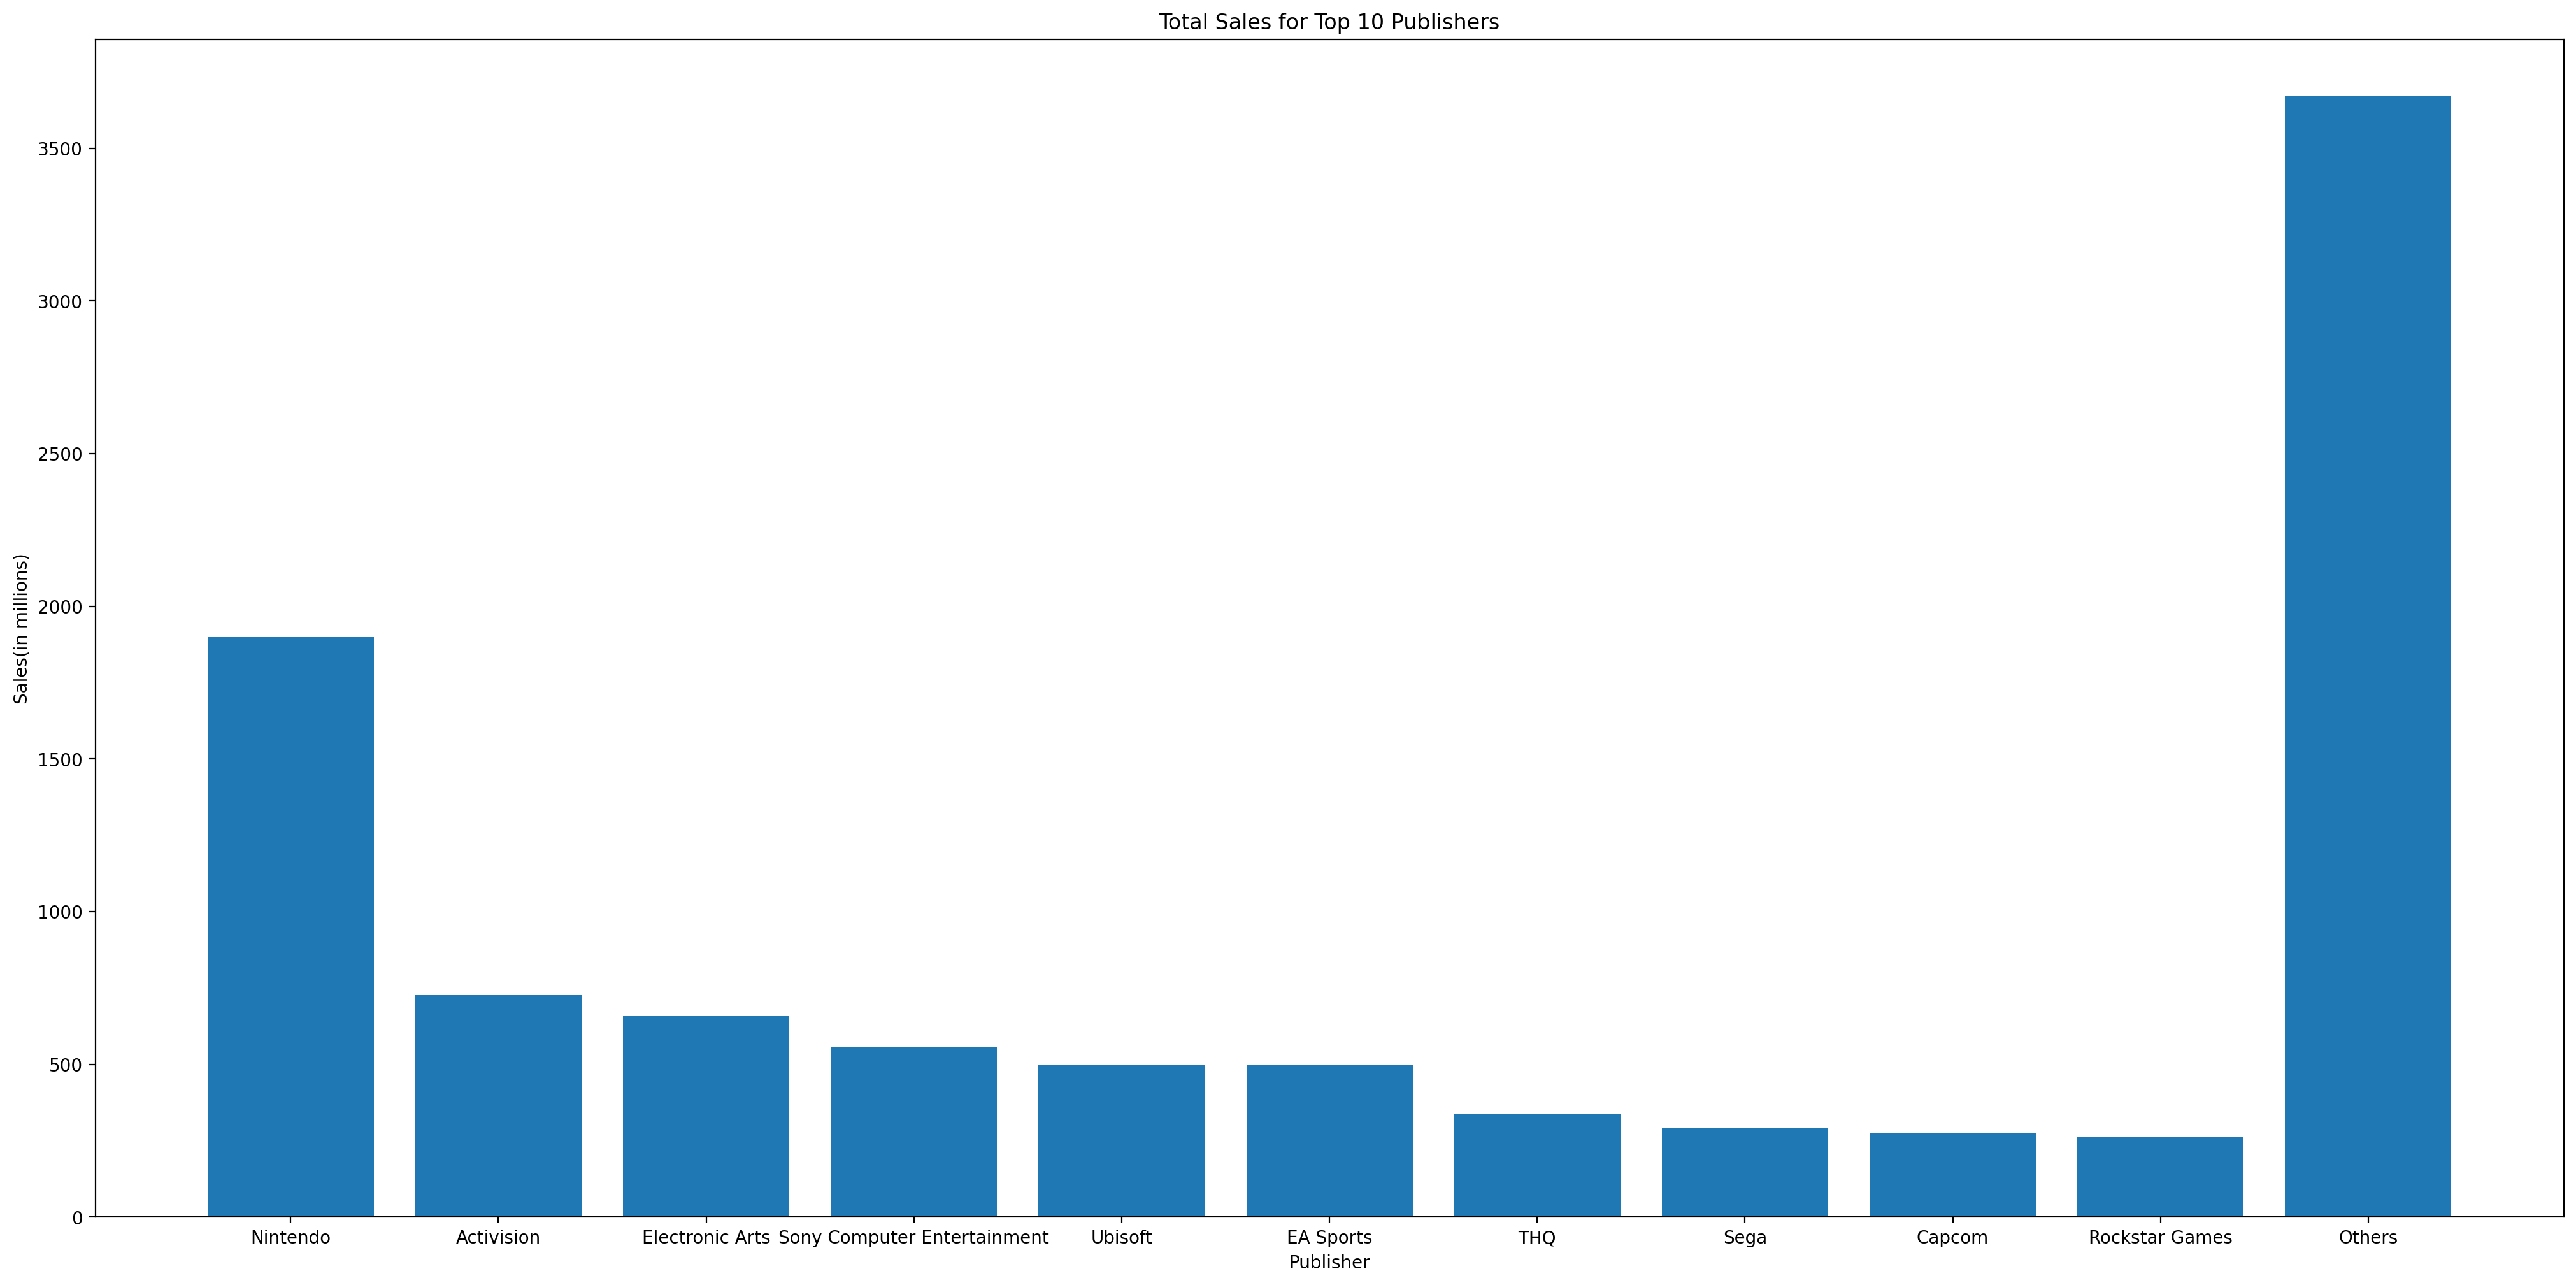

In [190]:
#Isolate top 10 publishers
top_10_publishers_sales = pd.DataFrame(publisher_total_sales[:10])

#The rest of the publishers
other_publishers_sales = pd.DataFrame(publisher_total_sales[10:])

#Add all other publisher info together and put under name 'Other'
top_10_publishers_sales.loc[len(top_10_publishers_sales.index)] = ['Others',other_publishers_sales['Sales_Globe'].sum()]

#graph
plt.figure(figsize =(25,12))
plt.bar(top_10_publishers_sales['Publisher'],top_10_publishers_sales['Sales_Globe'])
plt.title('Total Sales for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Sales(in millions)')
plt.show()


We see that the top 10 publishers that released the most games are also the top 10 in terms of sales, but there is a differences between where some publishers rankes in terms of releases vs sales. For example Nintendo is only ranked 7 for number of titles released but is ranked 1 in total global sales. This seems to indicated that Nintendo games sell better than any other publisher per title.

([<matplotlib.patches.Wedge at 0x18d65183020>,
 [Text(1.0144787044441175, 0.42524458636105533, 'Activision'),
  Text(0.43528047125311464, 1.0102132999251527, 'Ubisoft'),
  Text(-0.3073871180959298, 1.0561785642724808, 'Electronic Arts'),
  Text(-0.8625796759103729, 0.6826099198710462, 'Konami'),
  Text(-1.096371014161698, 0.08927821294162323, 'Nintendo'),
  Text(-0.9718528627128297, -0.5152688747022063, 'THQ'),
  Text(-0.5572672883425454, -0.9483950491980369, 'Sega'),
  Text(-0.019456495659278712, -1.0998279159835236, 'Sony Computer Entertainment'),
  Text(0.458724022673515, -0.9997861126372124, 'EA Sports'),
  Text(0.8164761831881877, -0.737134073480835, 'Capcom'),
  Text(1.0607741536619828, -0.2911326071100669, 'Others')],
 [Text(0.5533520206058822, 0.2319515925605756, '12.6%'),
  Text(0.23742571159260795, 0.5510254363228105, '11.8%'),
  Text(-0.16766570077959803, 0.5760973986940804, '10.2%'),
  Text(-0.4704980050420215, 0.3723326835660252, '9.5%'),
  Text(-0.598020553179108, 0.04869

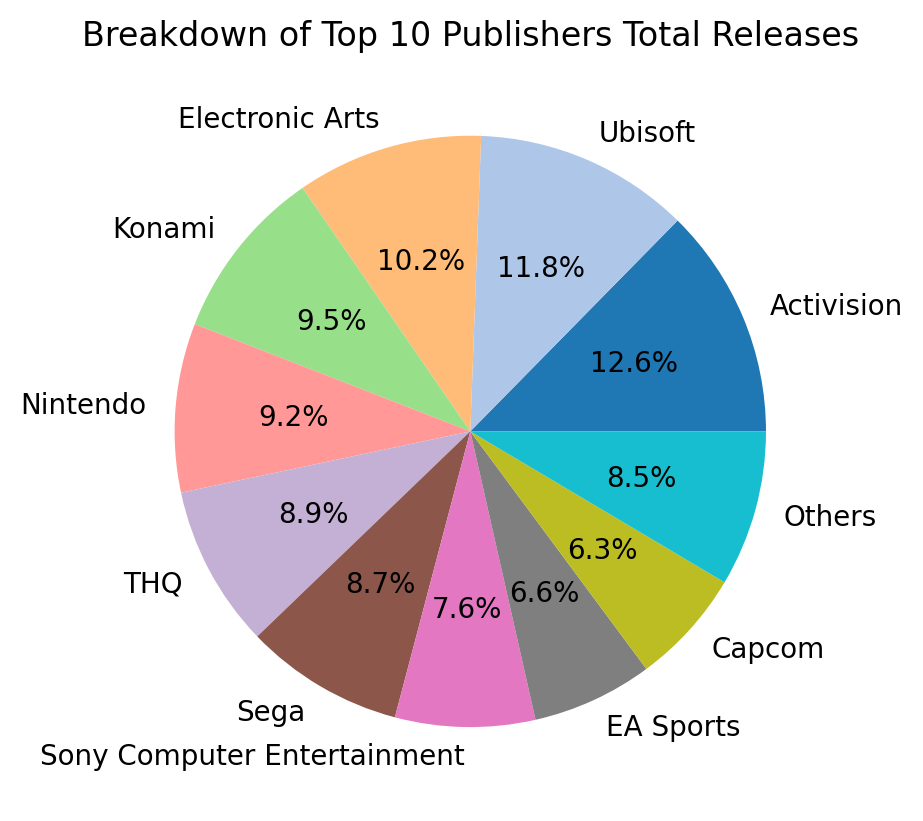

In [191]:
#Breakdown of average contributions of different publishers for releases pie graph

#
cs = plt.cm.tab20(np.arange(11)/11)

plt.figure()
plt.title('Breakdown of Top 10 Publishers Total Releases')

# ax.set_color_cycle(['red','blue'])
plt.pie(top_10_publishers_releases['Sales_Globe'],labels = top_10_publishers_releases['Publisher'],autopct='%1.1f%%',colors = cs)

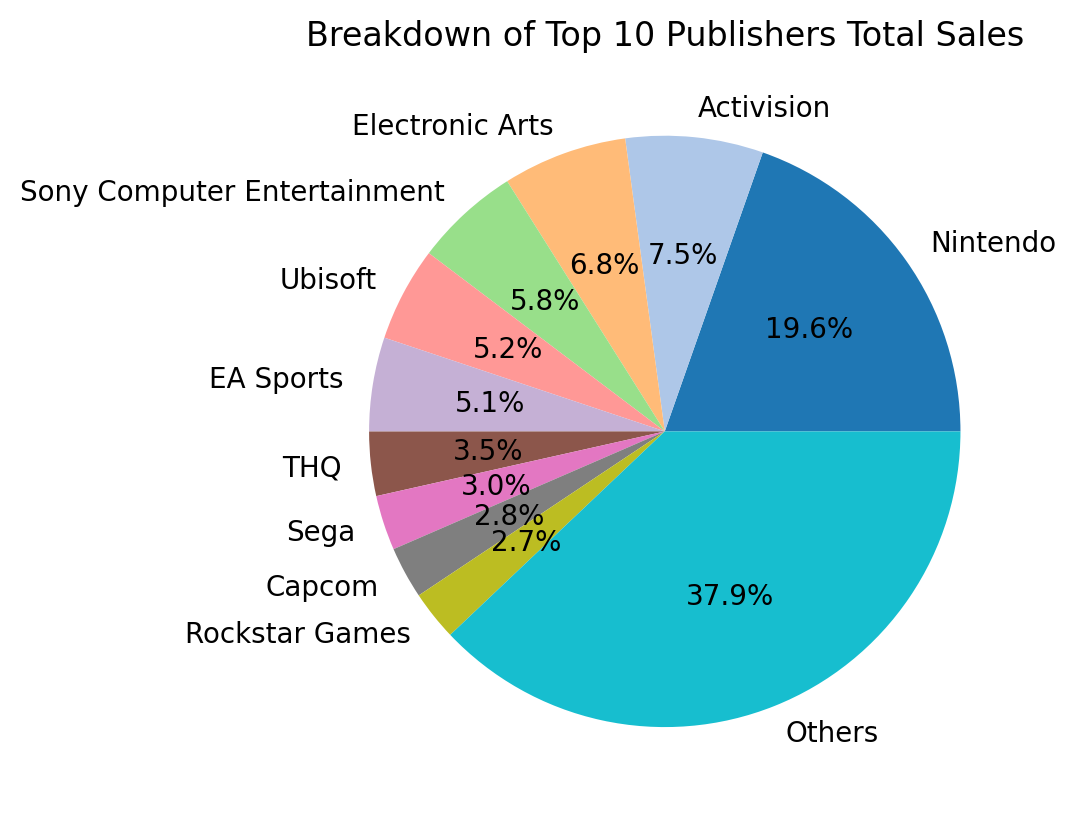

In [192]:
#Breakdown of average contributions of different publishers for sales pie graph

cs = plt.cm.tab20(np.arange(11)/11)

plt.figure()

plt.title('Breakdown of Top 10 Publishers Total Sales')
plt.pie(top_10_publishers_sales['Sales_Globe'],labels = top_10_publishers_sales['Publisher'],autopct='%1.1f%%', colors = cs)



plt.show()

In [193]:
#look at developer info
#top release developer
#top selling developer


Focus on the last 5 years to more closley analyze modern trends

In [194]:
#repeat most of my analysis above for data from the last 5 years
#pull data from last 5 years 
df_newer = df[df['Release_date'] > 2013]
df_5_years = df_newer[df_newer['Release_date'] < 2019]
df_5_years['Release_date'].unique()

array([2014., 2016., 2015., 2018., 2017.])

In [195]:
#shape
print("Data Shape :",df_5_years.shape)

Data Shape : (3353, 12)


In [196]:
df_5_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3353 entries, 20 to 18991
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          3353 non-null   int64  
 1   Name          3353 non-null   object 
 2   Publisher     3353 non-null   object 
 3   Developer     3353 non-null   object 
 4   Platform      3353 non-null   object 
 5   Release_date  3353 non-null   float64
 6   Genre         3353 non-null   object 
 7   Sales_NA      2084 non-null   float64
 8   Sales_PAL     1863 non-null   float64
 9   Sales_JP      1686 non-null   float64
 10  Sales_Other   2497 non-null   float64
 11  Sales_Globe   3353 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 340.5+ KB


In [197]:
df_5_years.nunique()

Rank            3353
Name            1983
Publisher        265
Developer        665
Platform          14
Release_date       5
Genre             19
Sales_NA         198
Sales_PAL        179
Sales_JP          90
Sales_Other       95
Sales_Globe      319
dtype: int64

In [198]:
#check null values
print("data :\n")
print(df_5_years.isnull().sum())
print('Total null values : ',df_5_years.isnull().sum().sum())

data :

Rank               0
Name               0
Publisher          0
Developer          0
Platform           0
Release_date       0
Genre              0
Sales_NA        1269
Sales_PAL       1490
Sales_JP        1667
Sales_Other      856
Sales_Globe        0
dtype: int64
Total null values :  5282


In [199]:
# Look at columns with only null values
df_nan_5y = pd.DataFrame({'Count': df_5_years.isna().sum()[df_5_years.isna().sum() != 0]})

df_nan_5y['% of total'] = round((df_nan_5y['Count'] * 100)/df_5_years.shape[0], 2)
print(df_nan_5y.sort_values('Count', ascending = False))
print('\n')
print('of the %d columns in the training data, %d columns contain null values' %(df_5_years.shape[1], len(df_nan_5y)))

             Count  % of total
Sales_JP      1667       49.72
Sales_PAL     1490       44.44
Sales_NA      1269       37.85
Sales_Other    856       25.53


of the 12 columns in the training data, 4 columns contain null values


In [200]:
round(df_5_years.describe(), 2)

Rank  Release_date  Sales_NA  Sales_PAL  Sales_JP  Sales_Other  \
count   3353.00       3353.00   2084.00    1863.00   1686.00      2497.00   
mean   11123.46       2016.03      0.28       0.28      0.10         0.06   
std     5686.75          1.41      0.61       0.69      0.28         0.18   
min       21.00       2014.00      0.00       0.00      0.00         0.00   
25%     6288.00       2015.00      0.04       0.02      0.02         0.00   
50%    12458.00       2016.00      0.08       0.07      0.03         0.01   
75%    16081.00       2017.00      0.23       0.24      0.09         0.05   
max    18992.00       2018.00      6.18       9.71      3.82         3.02   

       Sales_Globe  
count      3353.00  
mean          0.43  
std           1.21  
min           0.00  
25%           0.03  
50%           0.08  
75%           0.30  
max          19.39

In [201]:
# Check for correlations between variables
corr_metrics_train_5y = df_5_years[con].corr()
corr_metrics_train_5y.style.background_gradient()

EDA 5 years

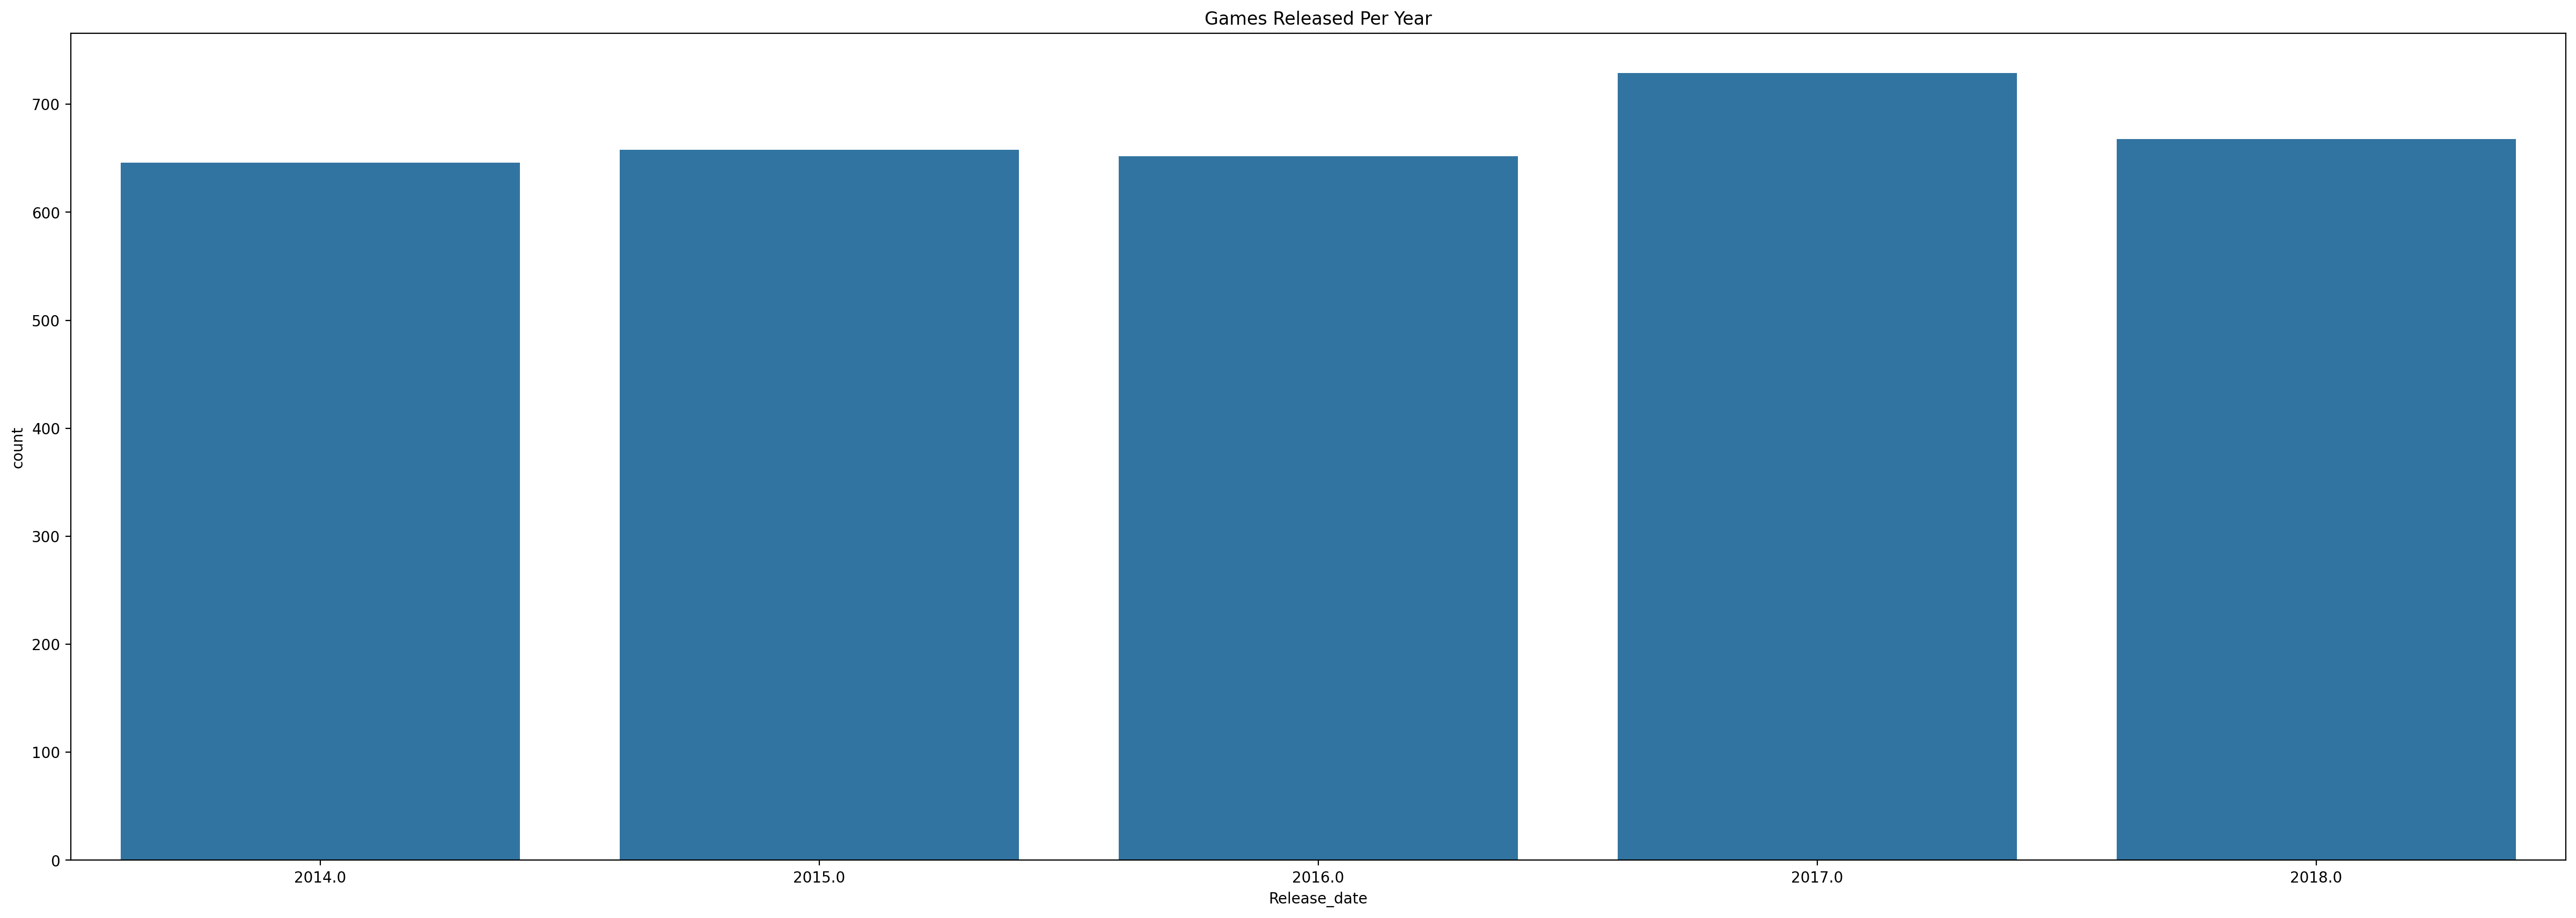

In [202]:
plt.figure(figsize = (30,10))
sns.barplot( x = df_5_years['Release_date'].value_counts().index,y = df_5_years['Release_date'].value_counts())
plt.title('Games Released Per Year')

plt.show()

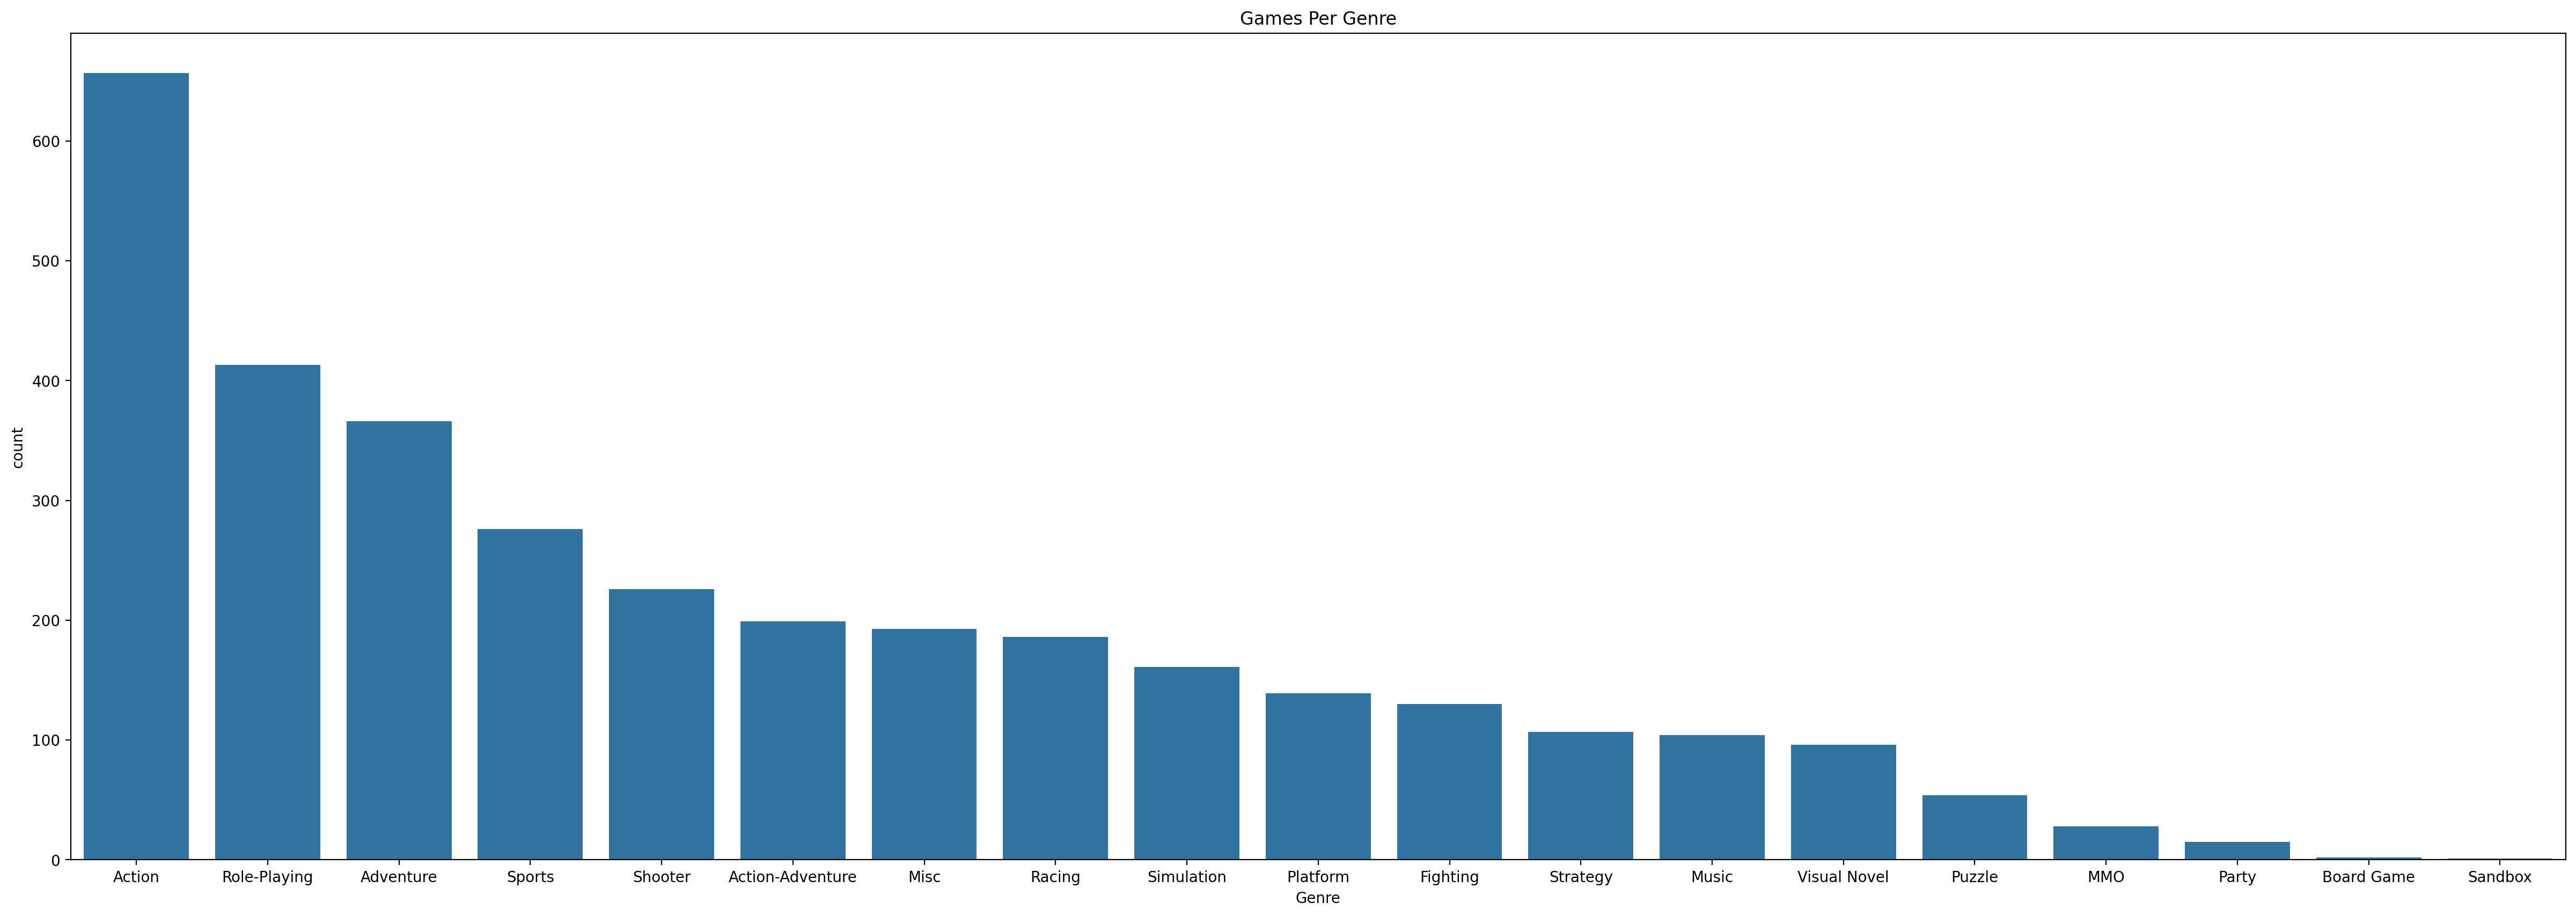

In [203]:
plt.figure(figsize = (30,10))
sns.barplot( x = df_5_years['Genre'].value_counts().index,y = df_5_years['Genre'].value_counts())
plt.title('Games Per Genre')

plt.show()

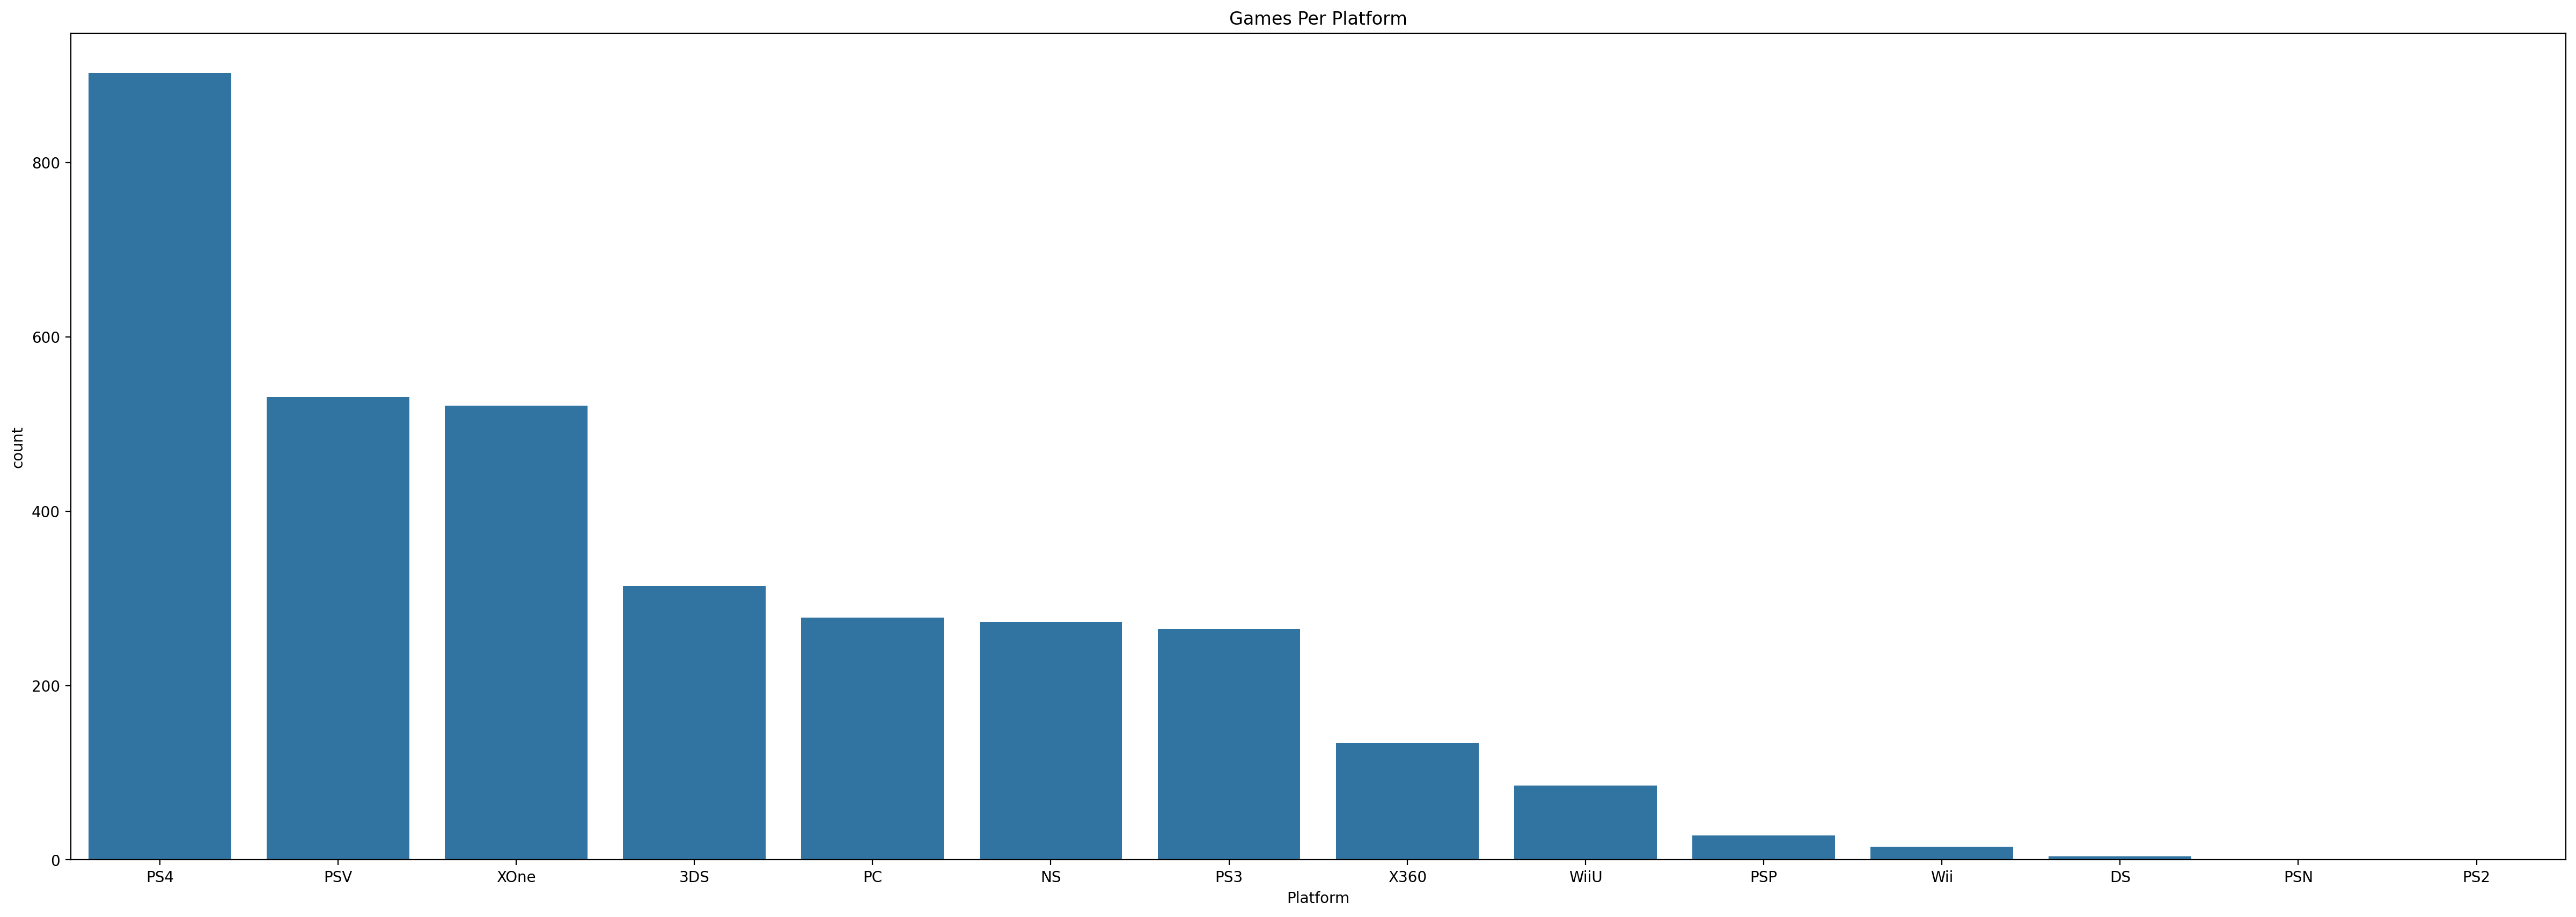

In [204]:
plt.figure(figsize = (30,10))
sns.barplot( x = df_5_years['Platform'].value_counts().index,y = df_5_years['Platform'].value_counts())
plt.title('Games Per Platform')

plt.show()

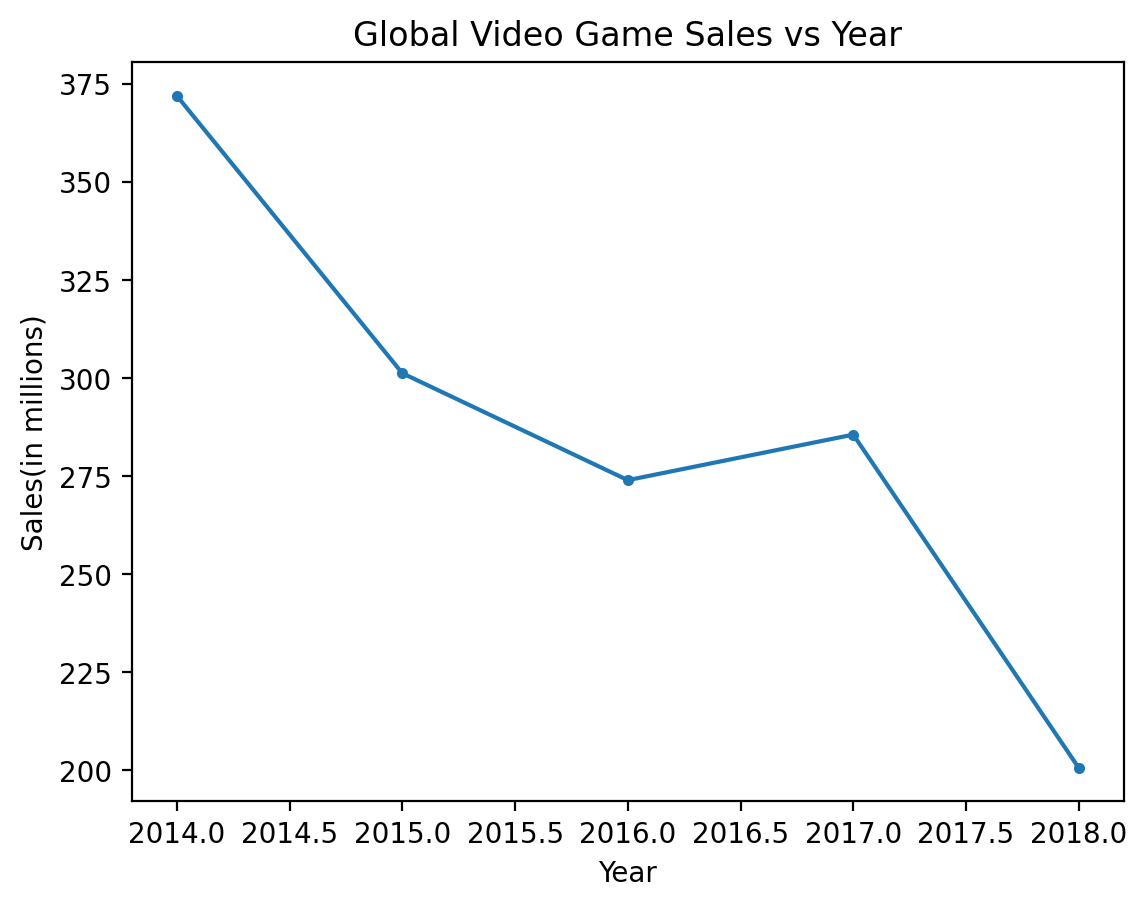

In [205]:
#look at overall video game sales over time
yearly_total_sales_5y = df_5_years.groupby(['Release_date'])['Sales_Globe'].sum()

#graph
plt.figure()
plt.plot(yearly_total_sales_5y,marker='.')
plt.title('Global Video Game Sales vs Year')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.show()

([<matplotlib.patches.Wedge at 0x18d64cffe60>,
 [Text(0.39197260966353403, 1.027792524429692, 'NA'),
  Text(-0.9779260788118057, -0.5036472817158514, 'PAL'),
  Text(0.5826039095670554, -0.9330448459517809, 'JP'),
  Text(1.056624768007036, -0.3058497991401624, 'Other')],
 [Text(0.2138032416346549, 0.5606141042343774, '38.4%'),
  Text(-0.5334142248064394, -0.2747166991177371, '38.3%'),
  Text(0.3177839506729393, -0.508933552337335, '14.3%'),
  Text(0.5763407825492923, -0.16682716316736132, '9.0%')])

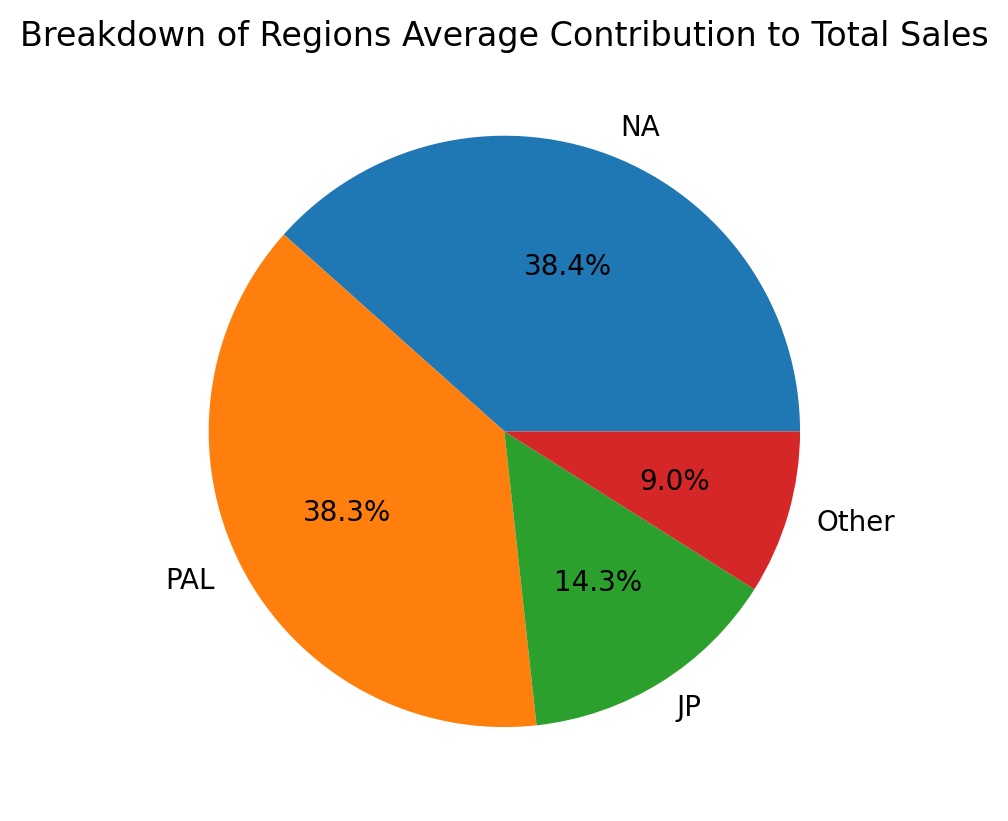

In [206]:
#look at regional information
#Breakdown of average contributions of different markets
avg_sales_5y = [np.mean(df_5_years['Sales_NA']),np.mean(df_5_years['Sales_PAL']),np.mean(df_5_years['Sales_JP']),np.mean(df_5_years['Sales_Other'])]
avg_labels = ['NA','PAL','JP','Other']

plt.figure()
plt.title('Breakdown of Regions Average Contribution to Total Sales')
plt.pie(avg_sales_5y,labels = avg_labels,autopct='%1.1f%%')

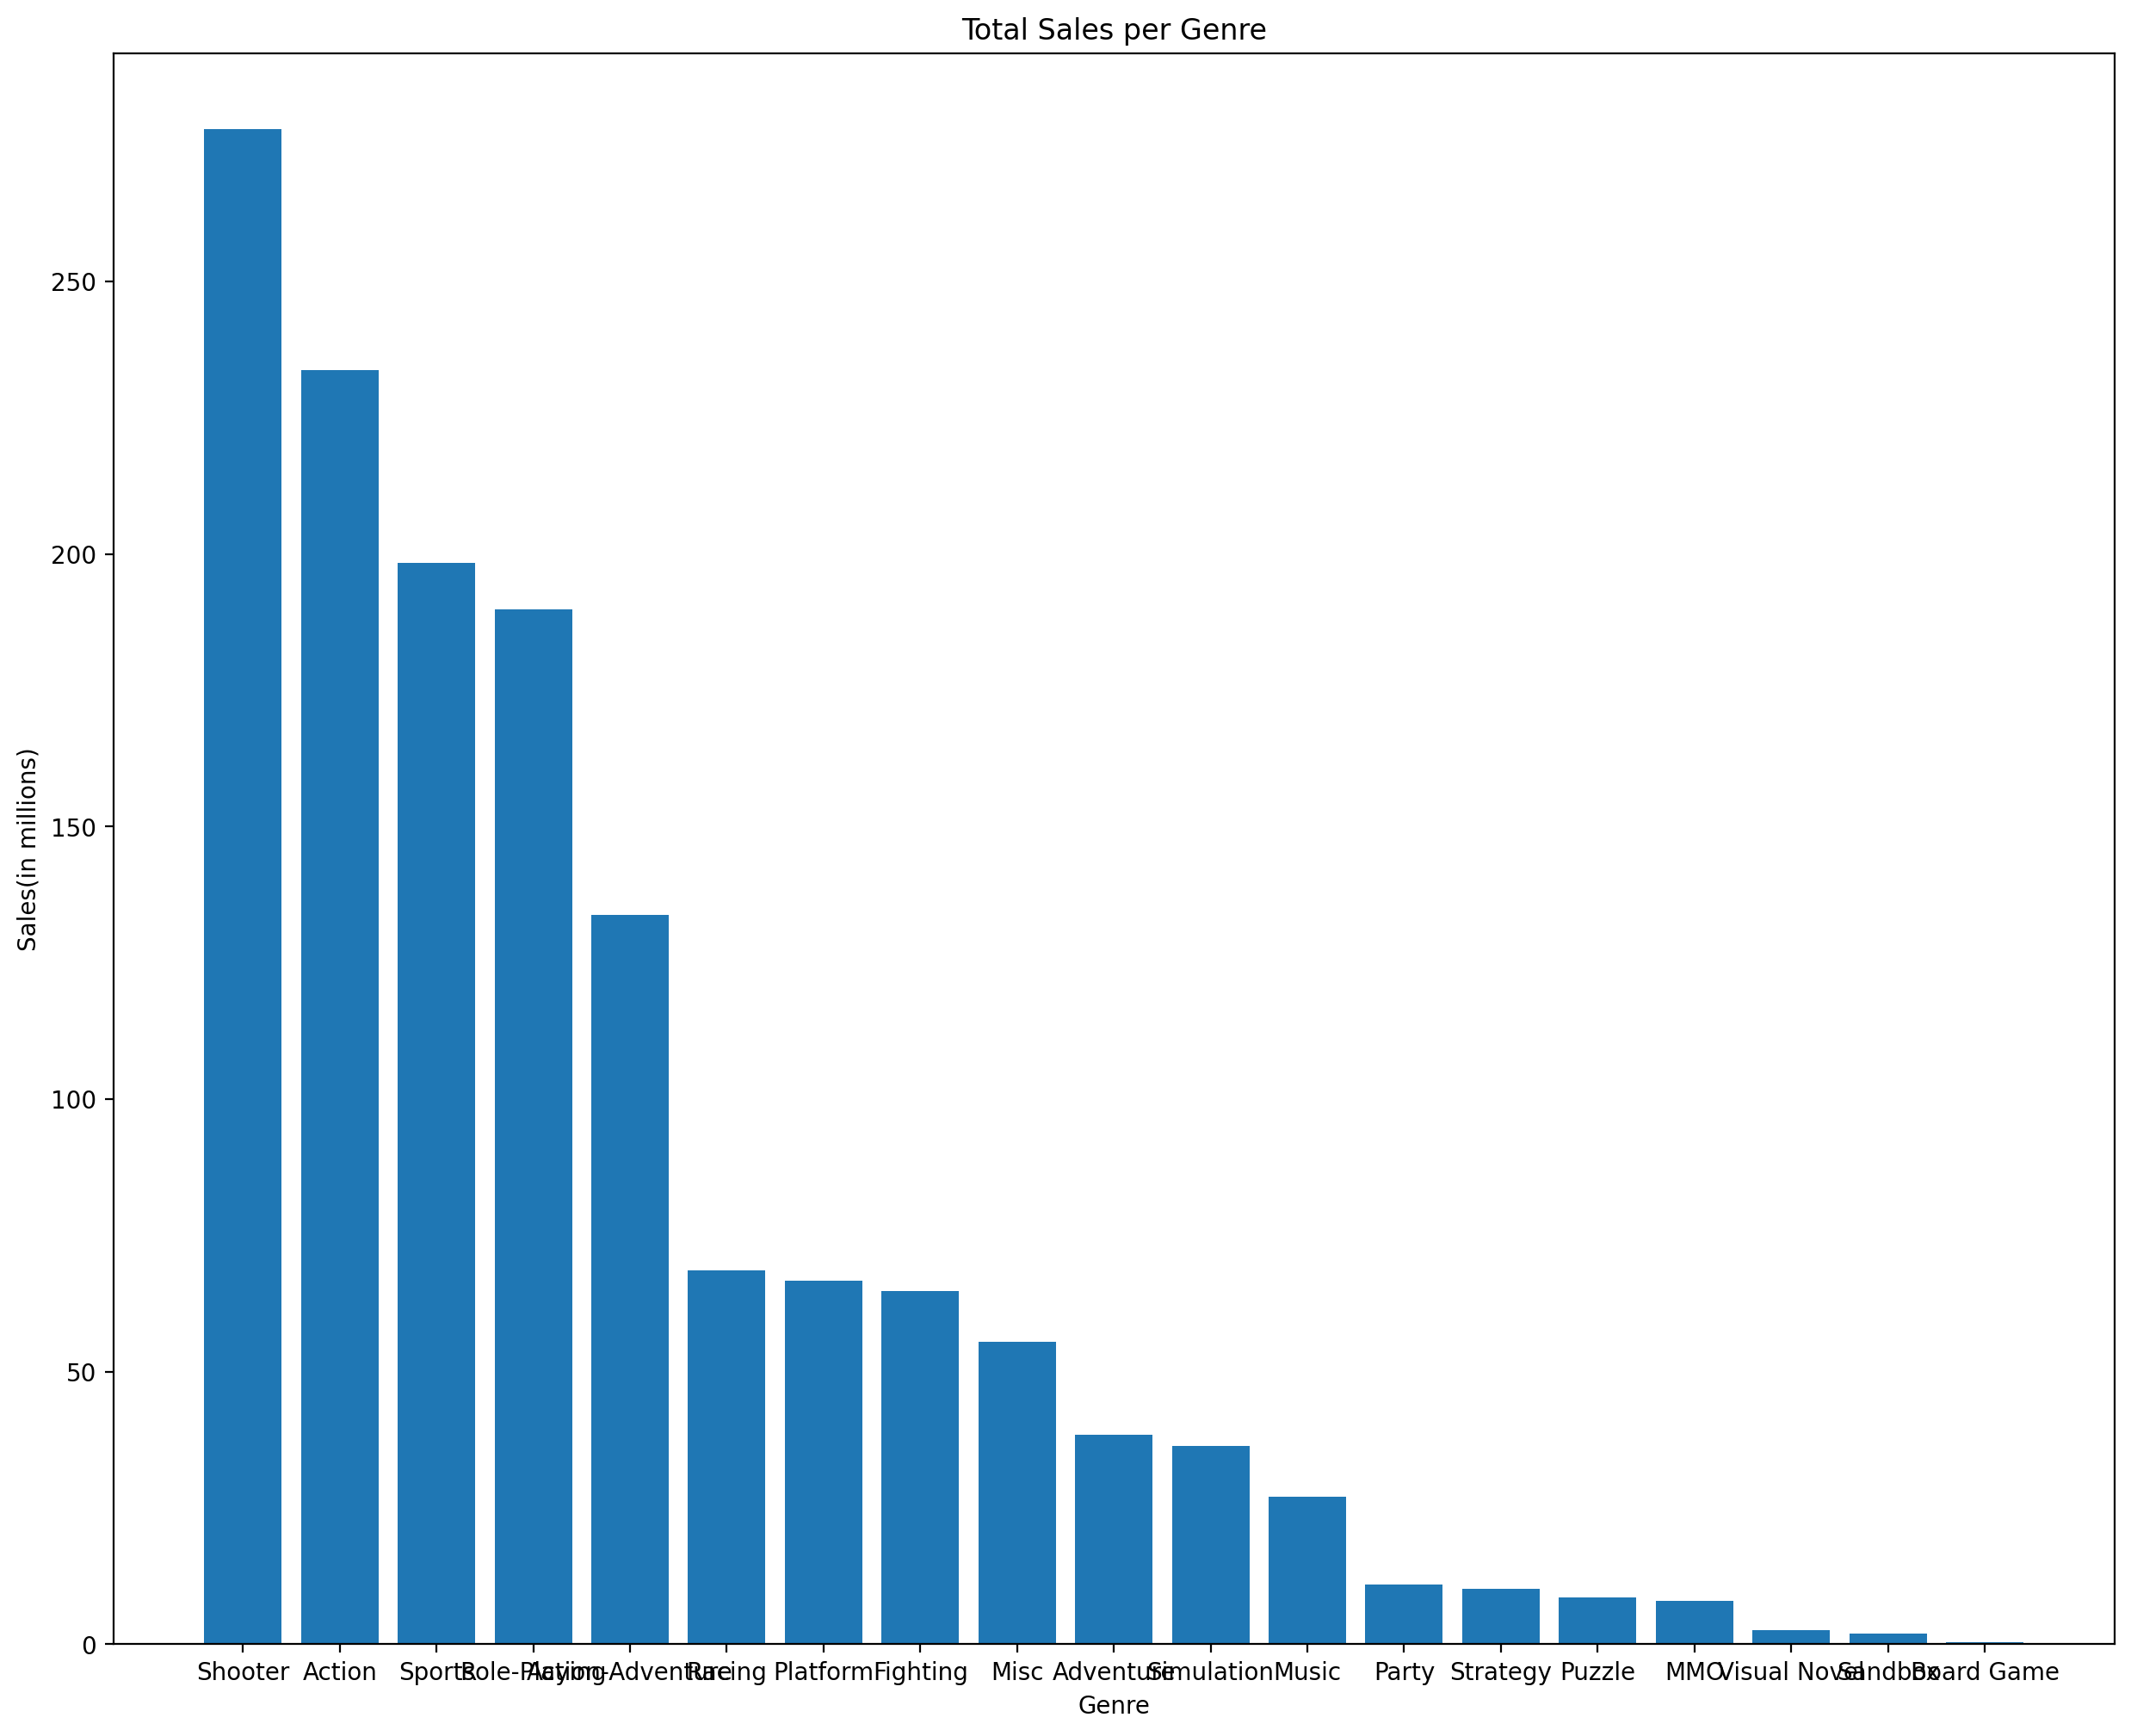

In [207]:
#look at best genres
#look at overall video game sales over time
genre_total_sales_5y = df_5_years.groupby(['Genre'],as_index=False,sort=True)['Sales_Globe'].sum().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(15,12))
plt.bar(genre_total_sales_5y['Genre'],genre_total_sales_5y['Sales_Globe'])
plt.title('Total Sales per Genre')
plt.xlabel('Genre')
plt.ylabel('Sales(in millions)')
plt.show()

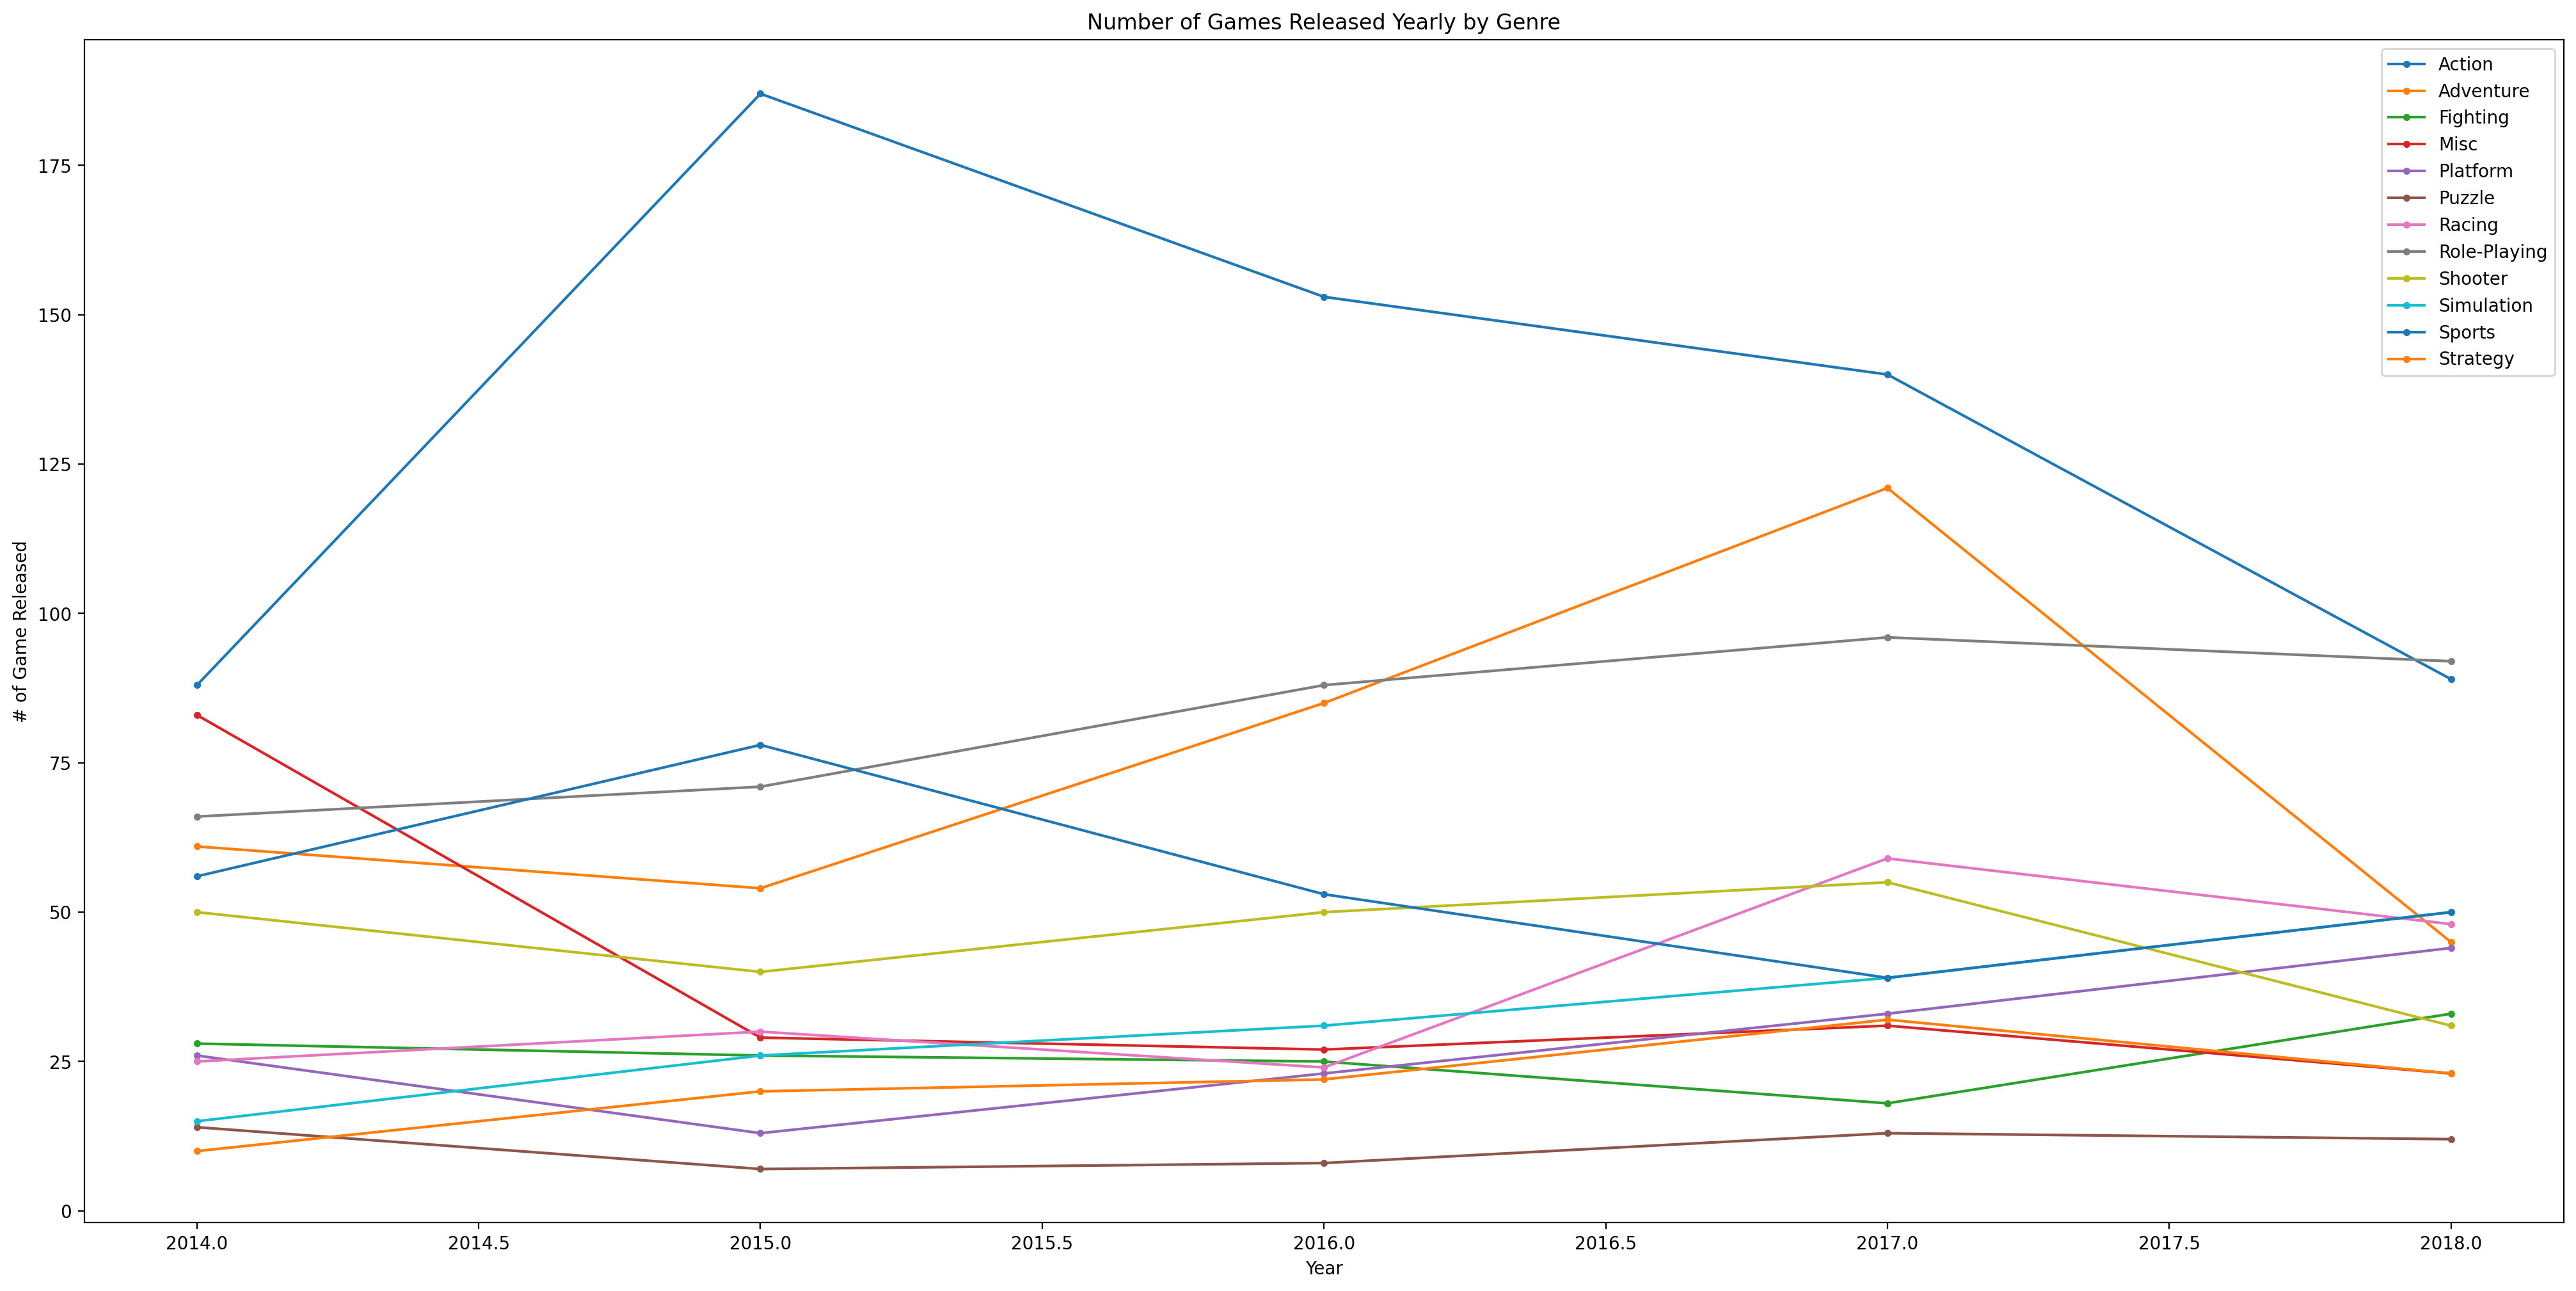

In [208]:
#look at genres trend over time 
#look at yearly release trends, sales trends per genre, best selling games per genre

genre_list = ['Action','Adventure','Fighting','Misc','Platform','Puzzle','Racing','Role-Playing','Shooter','Simulation','Sports','Strategy']

genre_yearly_releases_5y = df_5_years.groupby(['Genre','Release_date'],as_index=False,sort=True)['Genre'].size()

plt.figure(figsize=(25,12))

for genre in genre_list:
    genre_release_5y = genre_yearly_releases_5y[genre_yearly_releases_5y['Genre'] == genre]
    plt.plot(genre_release_5y['Release_date'], genre_release_5y['size'], label = genre,marker='.')


plt.title('Number of Games Released Yearly by Genre')
plt.xlabel('Year')
plt.ylabel('# of Game Released')
plt.legend()
plt.show()

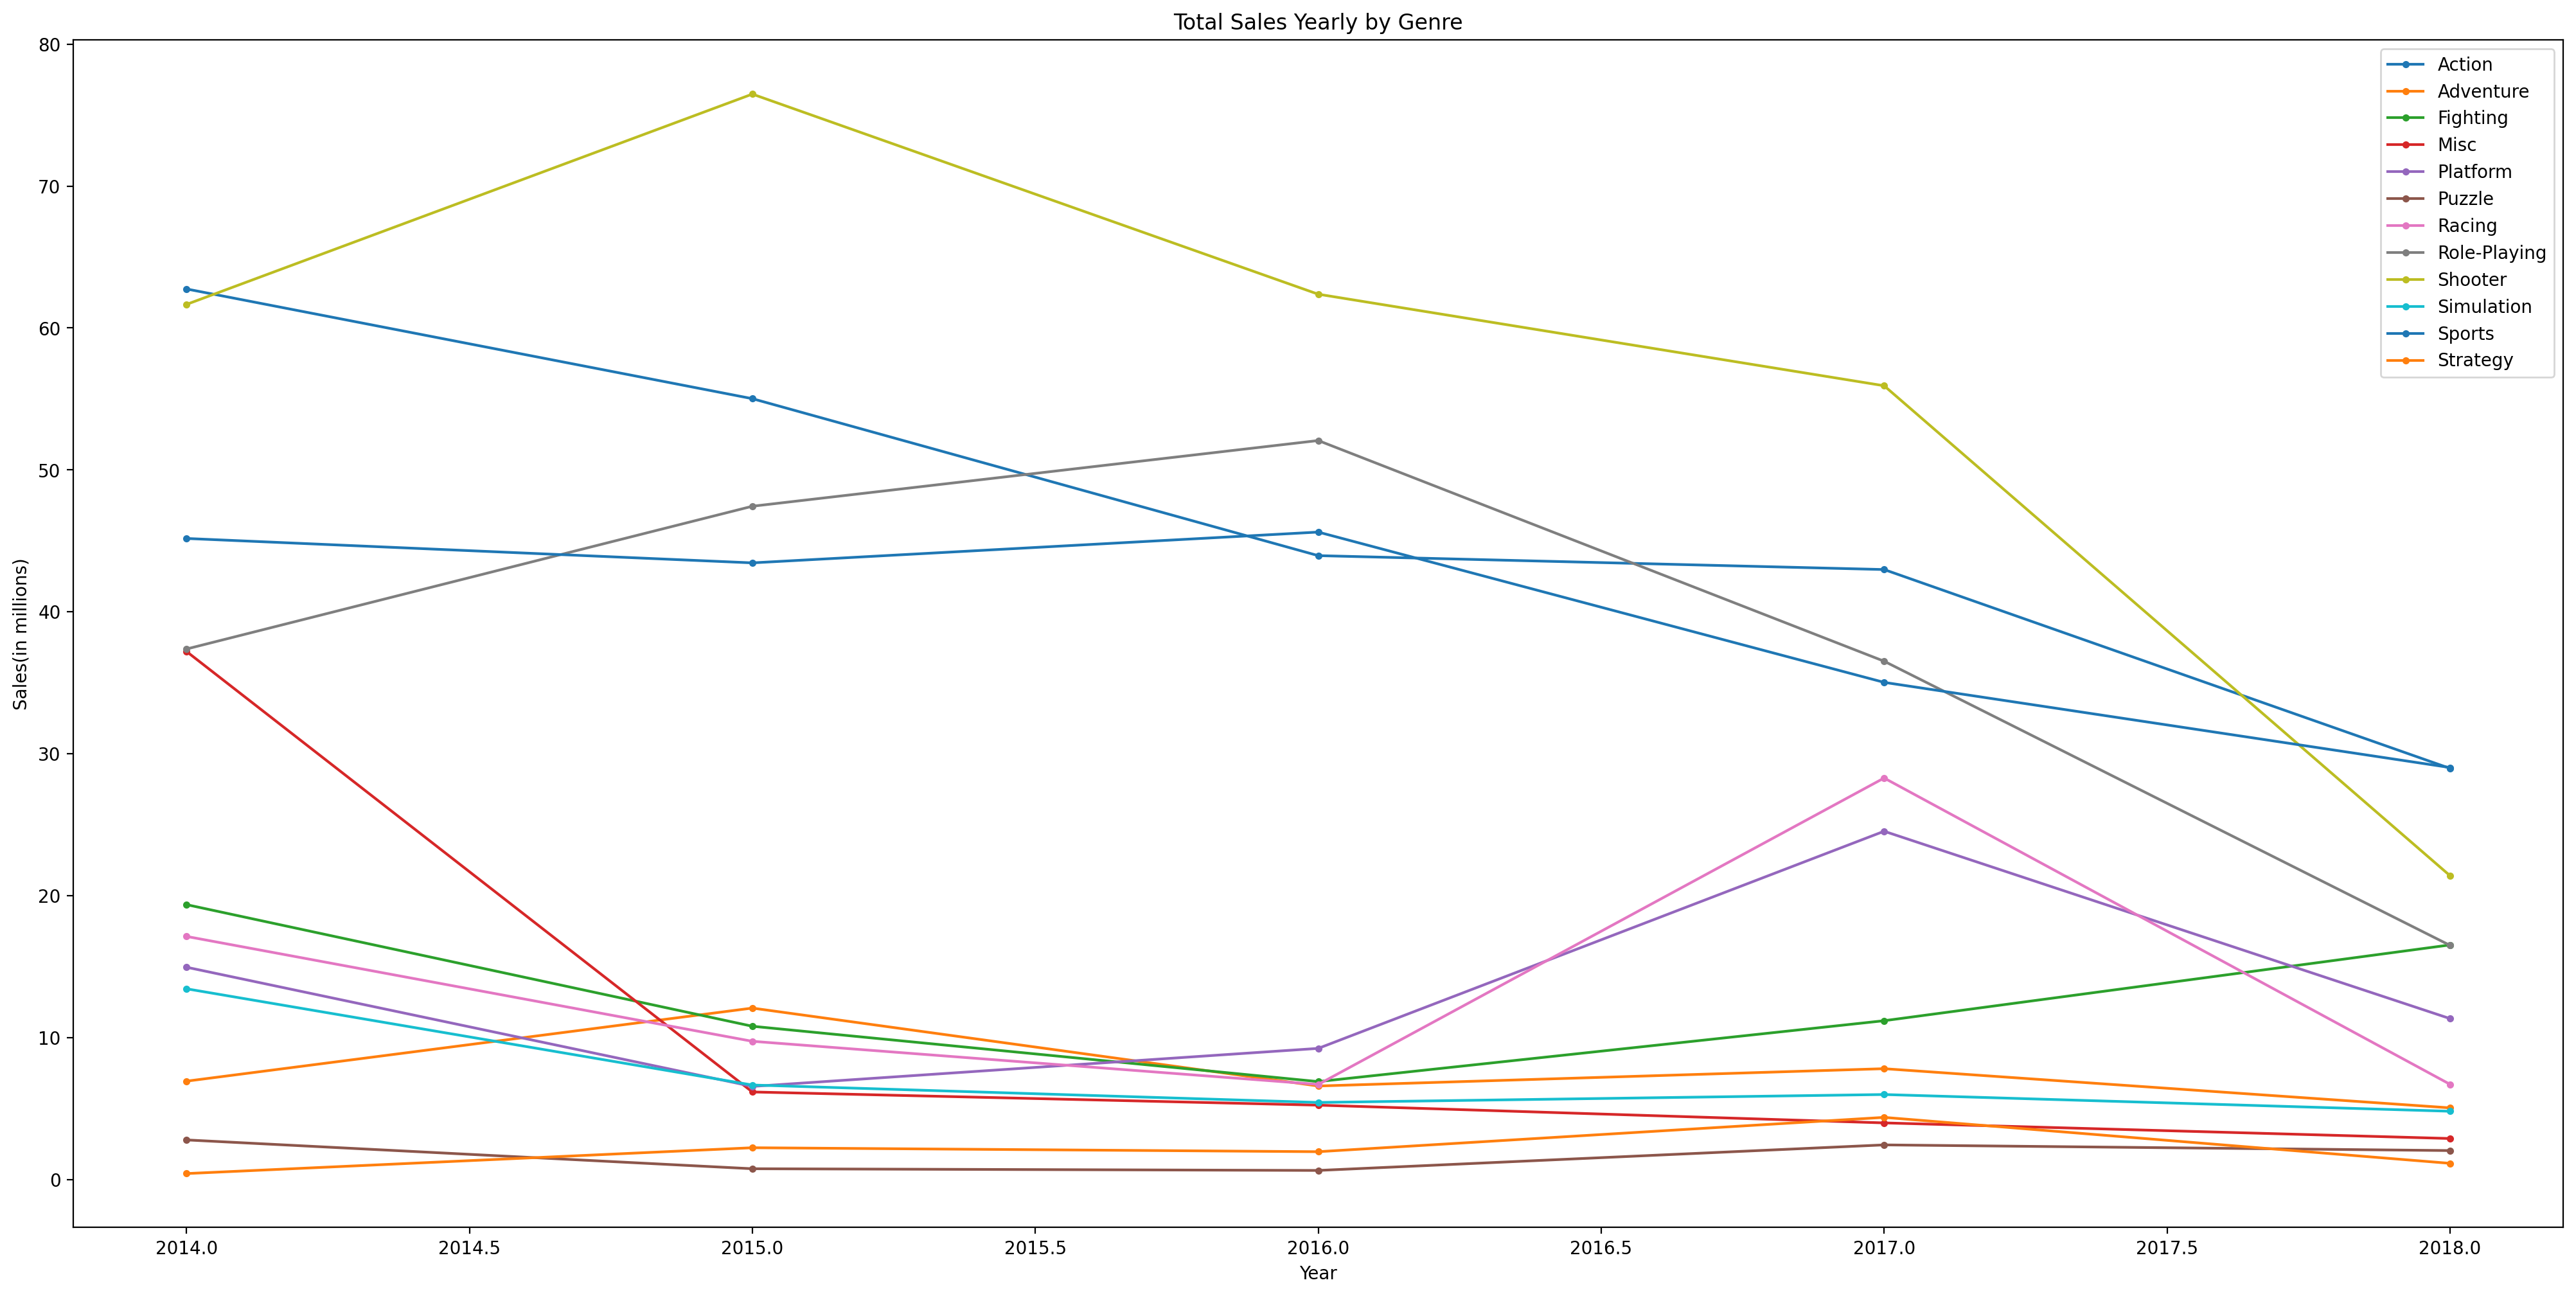

In [209]:
#look at genres trend over time 
#look at sales trends per genre, best selling games per genre


genre_yearly_sales_5y = df_5_years.groupby(['Genre','Release_date'],as_index=False,sort=True)['Sales_Globe'].sum()

plt.figure(figsize=(25,12))

for genre in genre_list:
    genre_sales_5y = genre_yearly_sales_5y[genre_yearly_sales_5y['Genre'] == genre]
    plt.plot(genre_sales_5y['Release_date'], genre_sales_5y['Sales_Globe'], label = genre,marker='.')


plt.title('Total Sales Yearly by Genre')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.legend()
plt.show()

In [210]:
#Best selling game per genre

idx_genre_5y = df_5_years.groupby(['Genre'])['Sales_Globe'].idxmax()
max_sales_genre_5y = df.loc[idx_genre_5y][['Genre','Name','Sales_Globe']]

max_sales_genre_5y

Genre                                         Name  \
20              Action                           Grand Theft Auto V   
37    Action-Adventure                        Red Dead Redemption 2   
893          Adventure                      Rise of the Tomb Raider   
6241        Board Game                 Monopoly for Nintendo Switch   
84            Fighting                   Super Smash Bros. Ultimate   
907                MMO  The Elder Scrolls Online: Tamriel Unlimited   
153               Misc                                    Minecraft   
871              Music                              Just Dance 2015   
238              Party                            Super Mario Party   
53            Platform                          Super Mario Odyssey   
1484            Puzzle               Captain Toad: Treasure Tracker   
44              Racing                          Mario Kart 8 Deluxe   
31        Role-Playing                             Pokémon Sun/Moon   
1003           Sandbox                                    Minecraft   
32             Shooter                    Call of Duty: Black Ops 3   
170         Simulation                               Tomodachi Life   
51              Sports                                      FIFA 18   
648           Strategy              Mario + Rabbids: Kingdom Battle   
9269      Visual Novel      Tears to Tiara II: Heir of the Overlord   

      Sales_Globe  
20          19.39  
37          13.94  
893          2.07  
6241         0.30  
84           8.95  
907          2.05  
153          6.33  
871          2.09  
238          4.97  
53          11.71  
1484         1.41  
44          13.05  
31          15.17  
1003         1.89  
32          15.09  
170          5.88  
51          11.80  
648          2.59  
9269         0.15

### Best selling game by region 5 years

In [211]:
#Best selling game per region

best_NA_id_5y = df_5_years['Sales_NA'].idxmax()
max_sales_NA_5y = df_5_years.loc[best_NA_id_5y][['Sales_NA','Name','Genre']]
best_EU_id_5y = df_5_years['Sales_PAL'].idxmax()
max_sales_EU_5y = df_5_years.loc[best_EU_id_5y][['Sales_PAL','Name','Genre']]
best_JP_id_5y = df_5_years['Sales_JP'].idxmax()
max_sales_JP_5y = df_5_years.loc[best_JP_id_5y][['Sales_JP','Name','Genre']]
best_Other_id_5y = df_5_years['Sales_Other'].idxmax()
max_sales_other_5y = df_5_years.loc[best_Other_id_5y][['Sales_Other','Name','Genre']]

#set up data
max_regions = ['North America','Europe','Japan','Other']
max_names_5y = [max_sales_NA_5y[1],max_sales_EU_5y[1],max_sales_JP_5y[1],max_sales_other_5y[1]]
max_genre_5y = [max_sales_NA_5y[2],max_sales_EU_5y[2],max_sales_JP_5y[2],max_sales_other_5y[2]]
max_sales_5y = [max_sales_NA_5y[0],max_sales_EU_5y[0],max_sales_JP_5y[0],max_sales_other_5y[0]]

#set up dataframe
most_sales_per_region_5y = pd.DataFrame(data = {
    'Region' : max_regions,
    'Name' : max_names_5y,
    'Genre' : max_genre_5y,
    'Sales' : max_sales_5y
})

most_sales_per_region_5y

C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\1144148275.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_names_5y = [max_sales_NA_5y[1],max_sales_EU_5y[1],max_sales_JP_5y[1],max_sales_other_5y[1]]
C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\1144148275.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_genre_5y = [max_sales_NA_5y[2],max_sales_EU_5y[2],max_sales_JP_5y[2],max_sales_other_5y[2]]
C:\Users\Monado\AppData\Local\Temp\ipykernel_17752\1144148275.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated 

Region                       Name         Genre  Sales
0  North America  Call of Duty: Black Ops 3       Shooter   6.18
1         Europe         Grand Theft Auto V        Action   9.71
2          Japan           Pokémon Sun/Moon  Role-Playing   3.82
3          Other         Grand Theft Auto V        Action   3.02

In [212]:
max_names_5y

['Call of Duty: Black Ops 3',
 'Grand Theft Auto V',
 'Pokémon Sun/Moon',
 'Grand Theft Auto V']

### Console Information 5 years

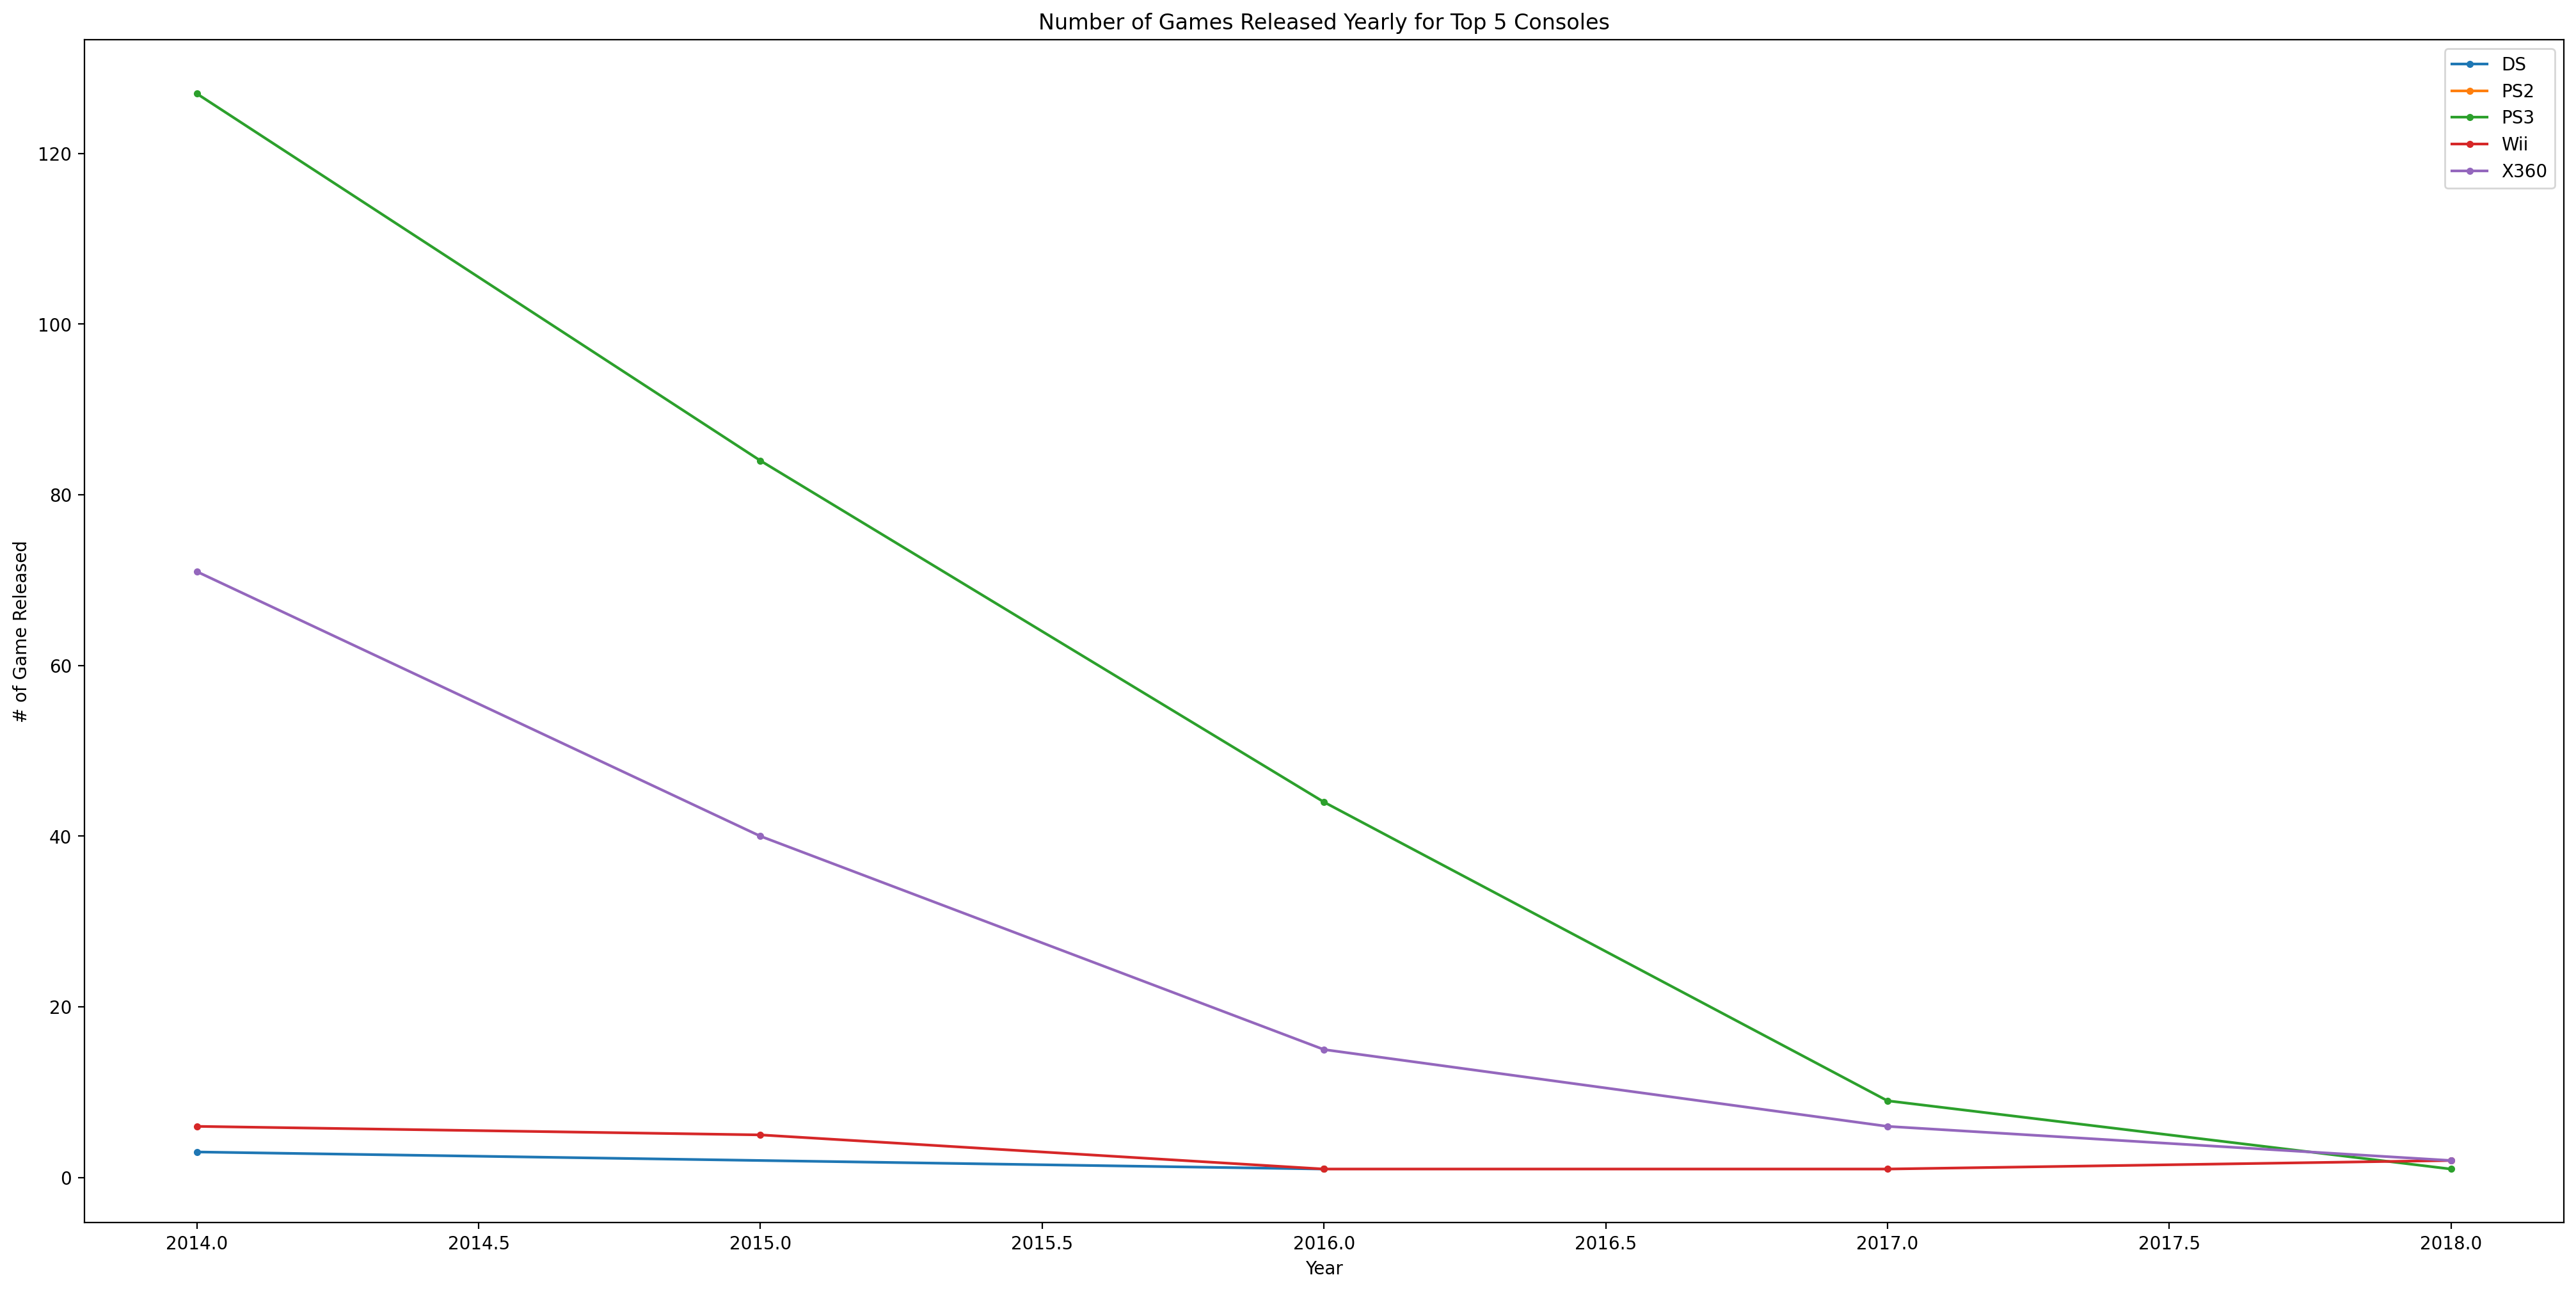

In [213]:
#look at console information
console_list_5y = ['PS3','PSV','3DS','PS4','X360']

console_yearly_releases_5y = df_5_years.groupby(['Platform','Release_date'],as_index=False,sort=True)['Platform'].size()

plt.figure(figsize=(25,12))

for console in console_list:
    console_release_5y = console_yearly_releases_5y[console_yearly_releases_5y['Platform'] == console]
    plt.plot(console_release_5y['Release_date'], console_release_5y['size'], label = console,marker='.')


plt.title('Number of Games Released Yearly for Top 5 Consoles')
plt.xlabel('Year')
plt.ylabel('# of Game Released')
plt.legend()
plt.show()

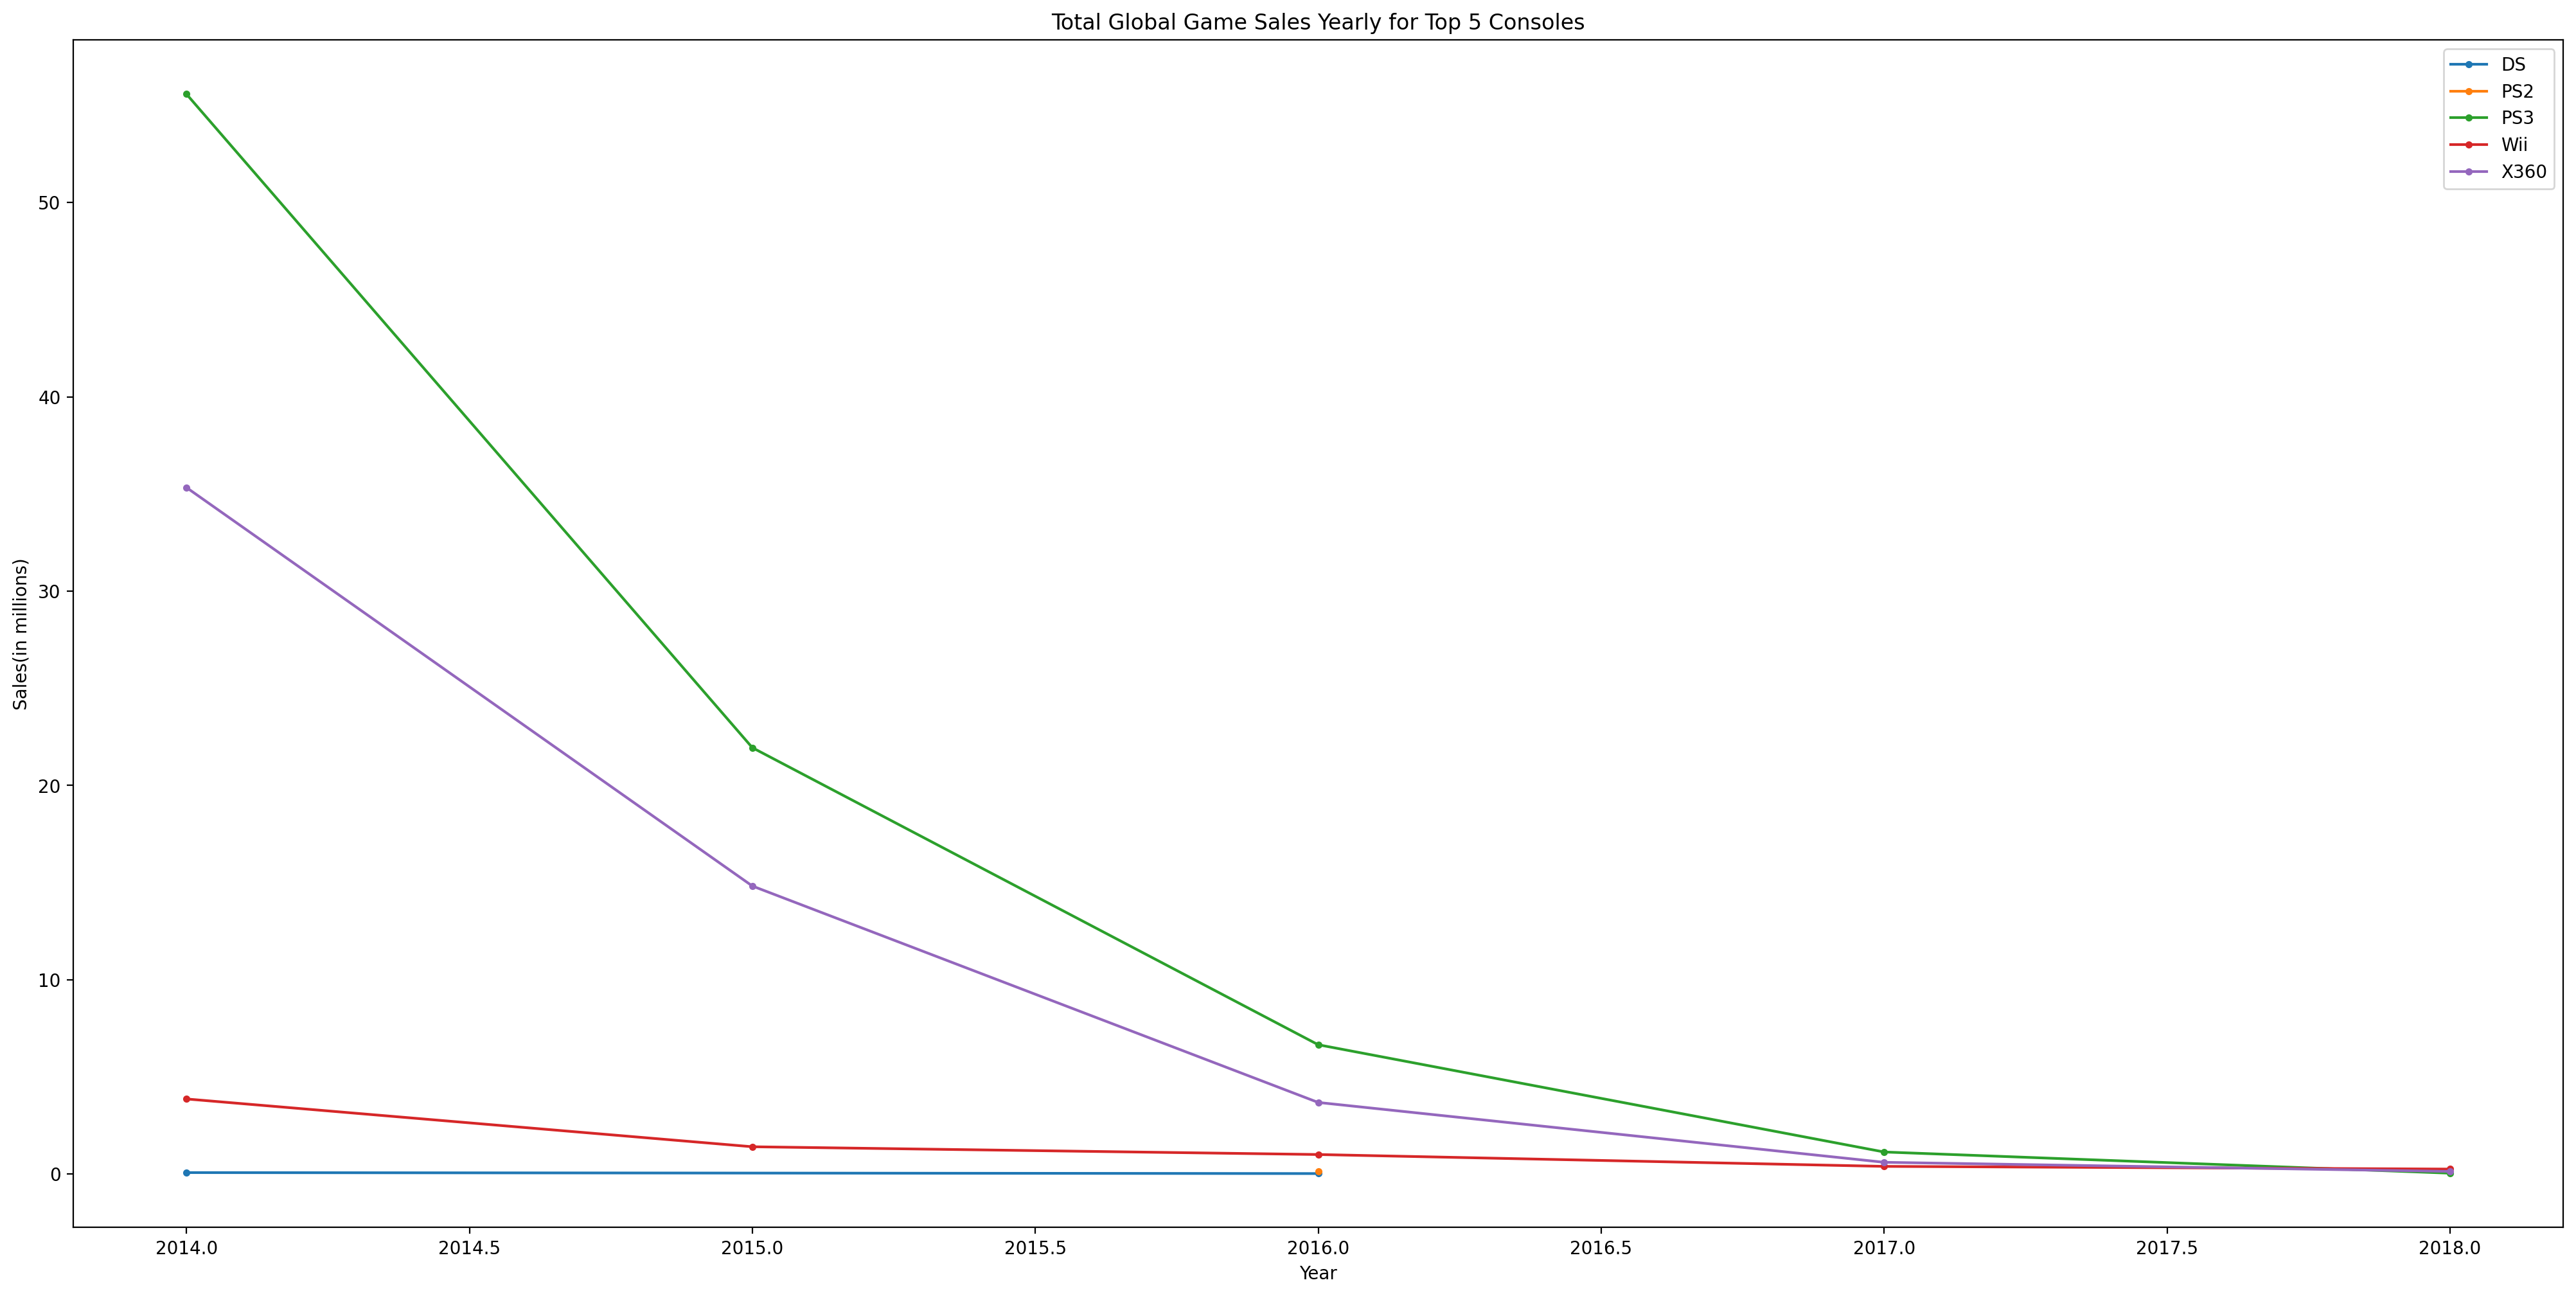

In [214]:
#most popular genres per console

console_yearly_sales_5y = df_5_years.groupby(['Platform','Release_date'],as_index=False,sort=True)['Sales_Globe'].sum()

plt.figure(figsize=(25,12))

for console in console_list:
    console_sales_5y = console_yearly_sales_5y[console_yearly_sales_5y['Platform'] == console]
    plt.plot(console_sales_5y['Release_date'], console_sales_5y['Sales_Globe'], label = console,marker='.')

plt.title('Total Global Game Sales Yearly for Top 5 Consoles')
plt.xlabel('Year')
plt.ylabel('Sales(in millions)')
plt.legend()
plt.show()

In [215]:
#best selling games for top 5 console
game_sales_per_console_id_5y = df_5_years.groupby(df_5_years['Platform'],as_index=False,sort=True)['Sales_Globe'].idxmax()

max_game_PS3_5y = np.array(df_5_years.loc[game_sales_per_console_id_5y[game_sales_per_console_id_5y['Platform'] == 'PS3']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_PSV_5y = np.array(df_5_years.loc[game_sales_per_console_id_5y[game_sales_per_console_id_5y['Platform'] == 'PSV']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_3DS_5y = np.array(df_5_years.loc[game_sales_per_console_id_5y[game_sales_per_console_id_5y['Platform'] == '3DS']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_PS4_5y = np.array(df_5_years.loc[game_sales_per_console_id_5y[game_sales_per_console_id_5y['Platform'] == 'PS4']['Sales_Globe']][['Name','Genre','Sales_Globe']])
max_game_X360_5y = np.array(df_5_years.loc[game_sales_per_console_id_5y[game_sales_per_console_id_5y['Platform'] == 'X360']['Sales_Globe']][['Name','Genre','Sales_Globe']])

max_games_name_5y = [max_game_PS3_5y[0][0],max_game_PSV_5y[0][0],max_game_3DS_5y[0][0],max_game_PS4_5y[0][0],max_game_X360_5y[0][0]]
max_games_genre_5y = [max_game_PS3_5y[0][1],max_game_PSV_5y[0][1],max_game_3DS_5y[0][1],max_game_PS4_5y[0][1],max_game_X360_5y[0][1]]
max_games_sales_5y = [max_game_PS3_5y[0][2],max_game_PSV_5y[0][2],max_game_3DS_5y[0][2],max_game_PS4_5y[0][2],max_game_X360_5y[0][2]]

#set up dataframe
most_sales_per_console_5y = pd.DataFrame(data = {
    'Console' : console_list_5y,
    'Name' : max_games_name_5y,
    'Genre' : max_games_genre_5y,
    'Sales' : max_games_sales_5y
})

most_sales_per_console_5y

Console                            Name         Genre  Sales
0     PS3                       Minecraft          Misc   6.05
1     PSV                       Minecraft          Misc   2.47
2     3DS                Pokémon Sun/Moon  Role-Playing  15.17
3     PS4              Grand Theft Auto V        Action  19.39
4    X360  Call of Duty: Advanced Warfare       Shooter   4.34

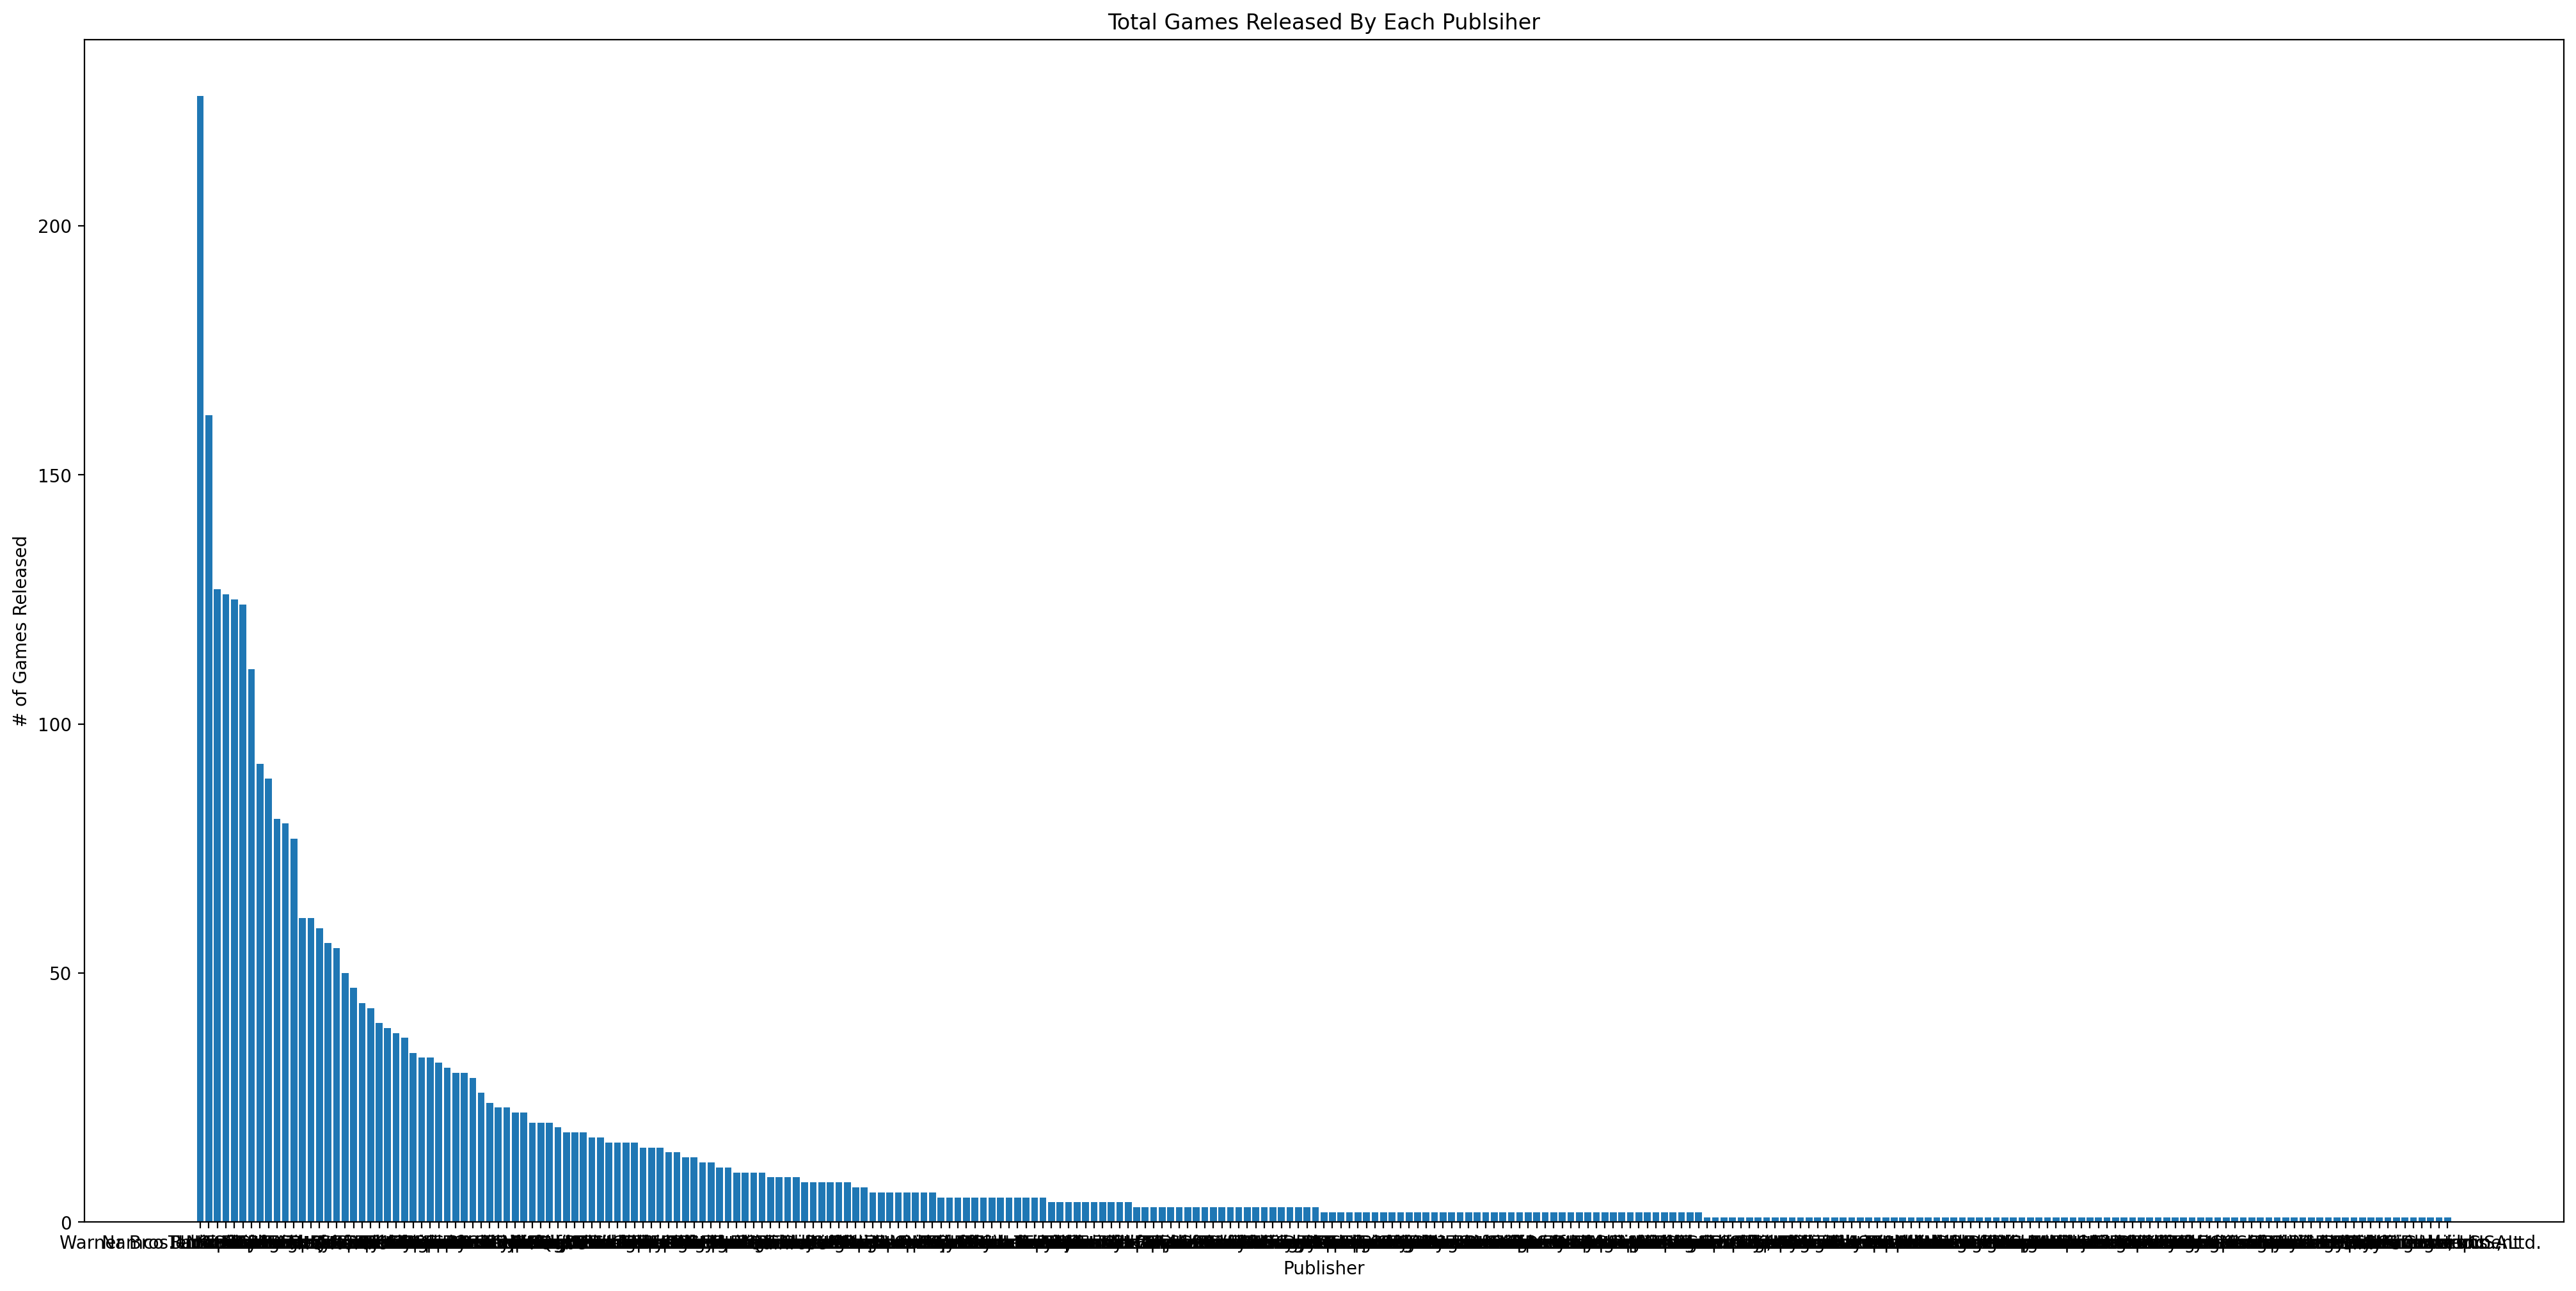

In [216]:
#Total sales for each publisher
publisher_total_releases_5y = df_5_years.groupby(['Publisher'],as_index=False,sort=True)['Sales_Globe'].count().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(25,12))
plt.bar(publisher_total_releases_5y['Publisher'],publisher_total_releases_5y['Sales_Globe'])
plt.title('Total Games Released By Each Publsiher')
plt.xlabel('Publisher')
plt.ylabel('# of Games Released')
plt.show()

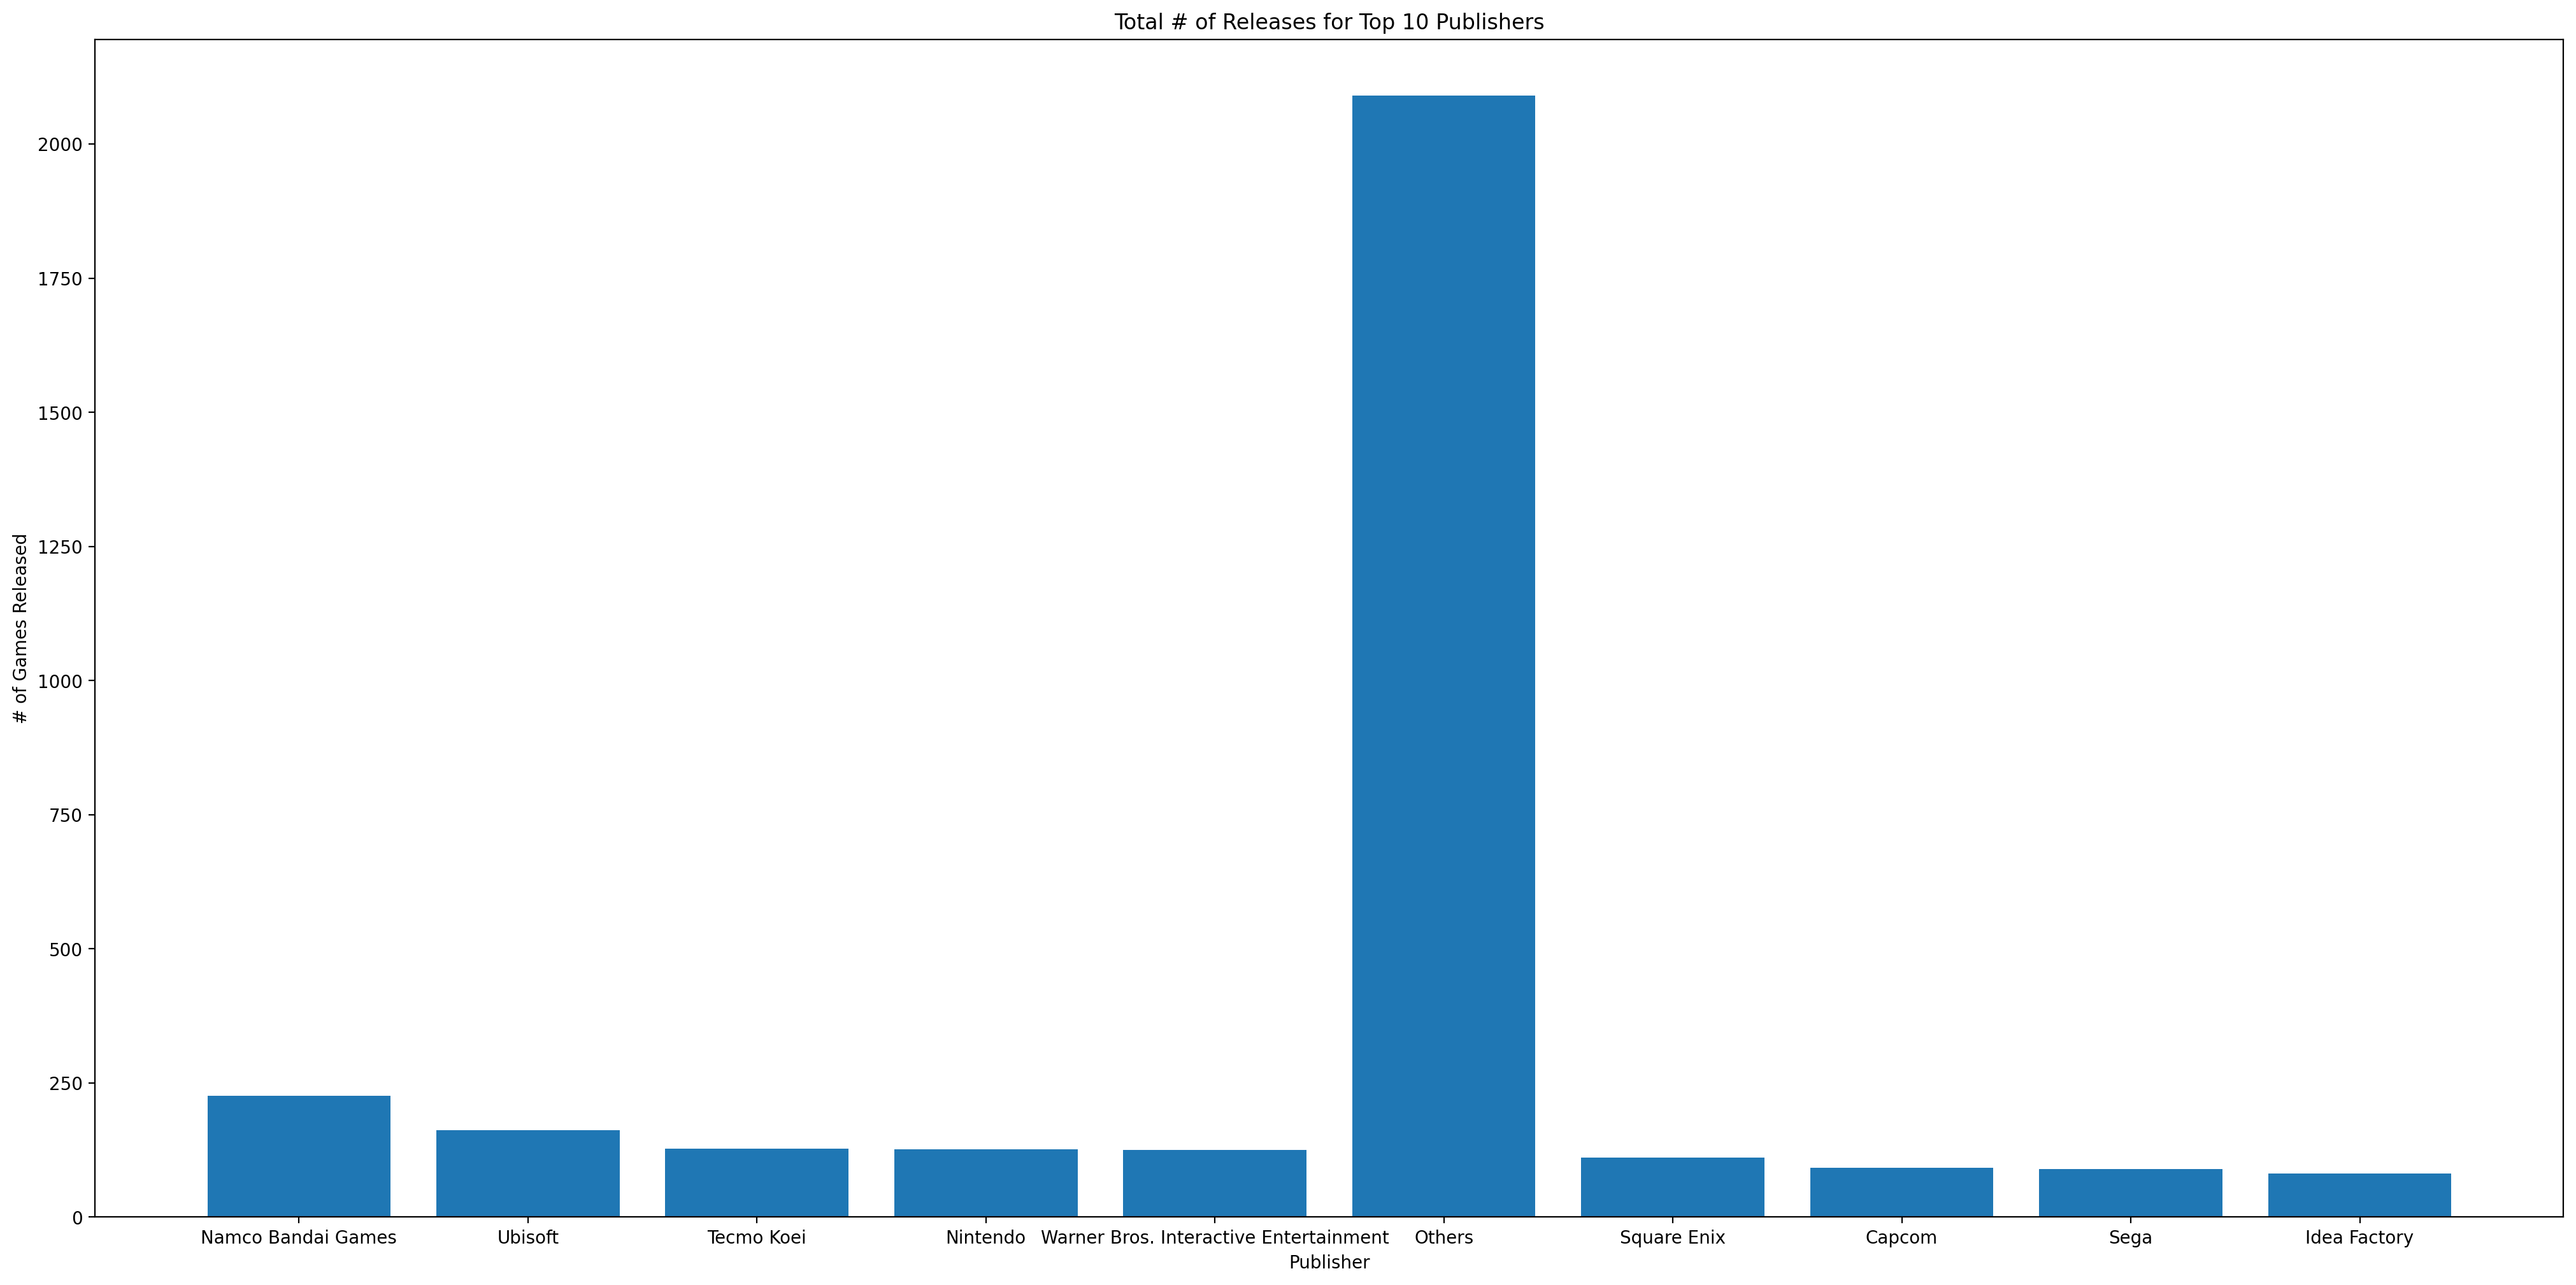

In [217]:
#Isolate top 10 publishers
top_10_publishers_releases_5y = pd.DataFrame(publisher_total_releases_5y[:10])

#The rest of the publishers
other_publishers_releases_5y = pd.DataFrame(publisher_total_releases_5y[10:])

#Add all other publisher info together and put under name 'Other'
top_10_publishers_releases_5y.loc[len(top_10_publishers_releases_5y.index)] = ['Others',other_publishers_releases_5y['Sales_Globe'].sum()]

#graph
plt.figure(figsize =(25,12))
plt.bar(top_10_publishers_releases_5y['Publisher'],top_10_publishers_releases_5y['Sales_Globe'])
plt.title('Total # of Releases for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('# of Games Released')
plt.show()

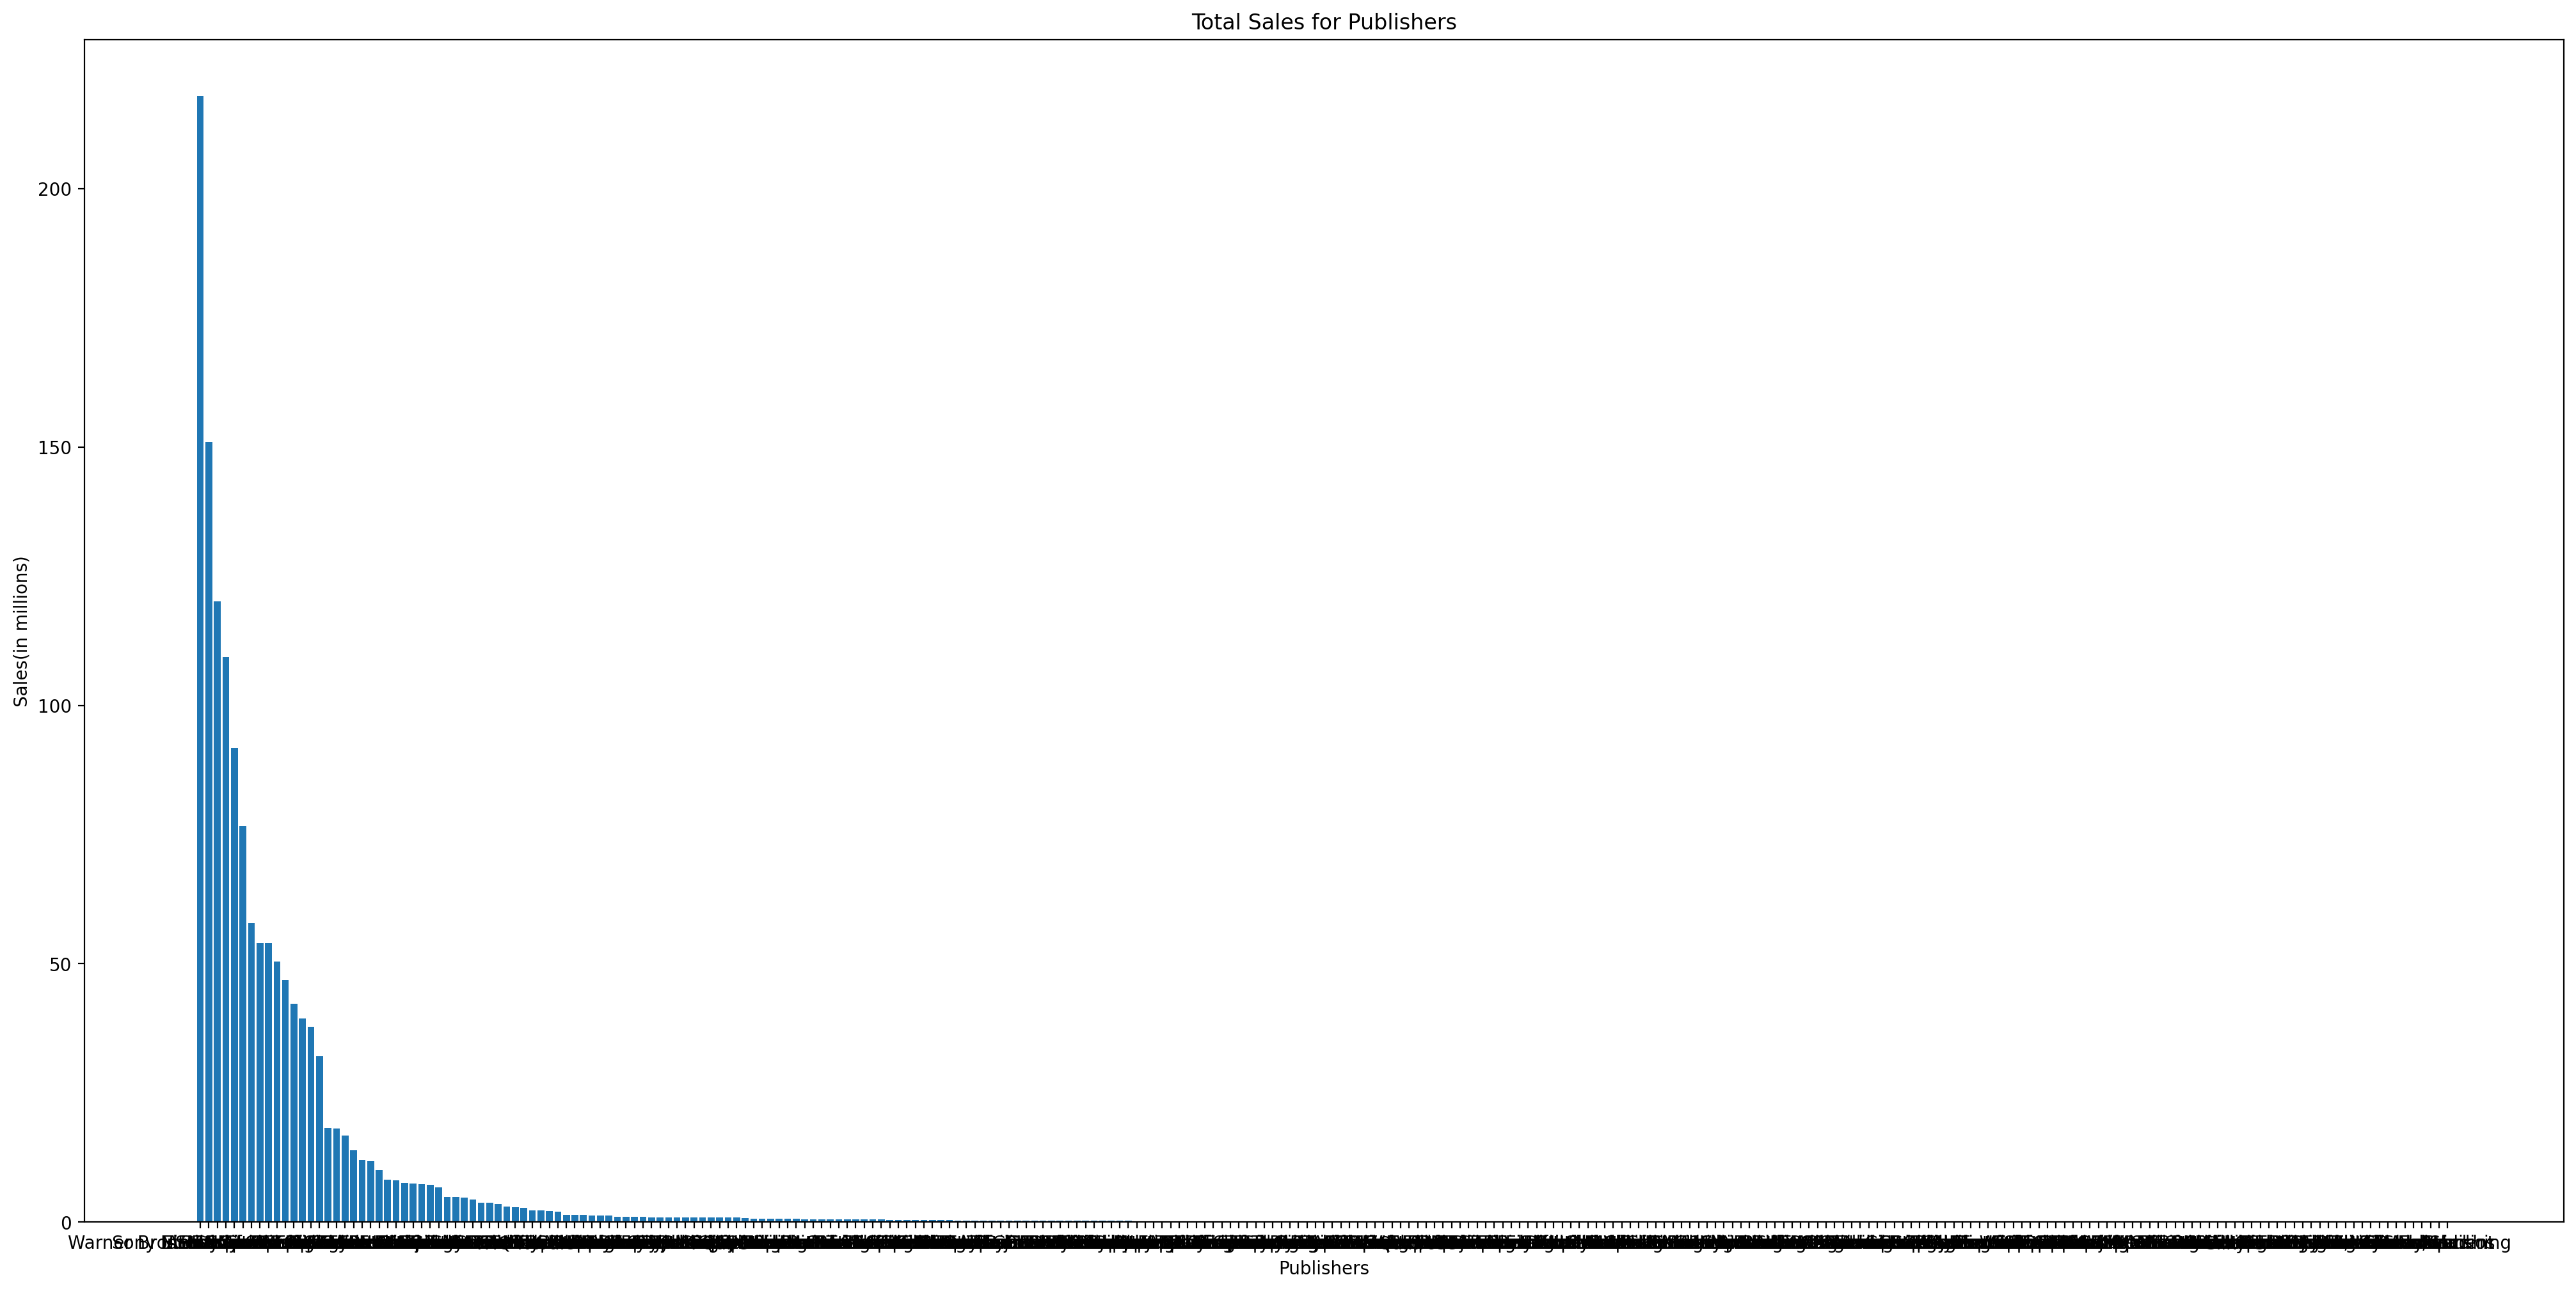

In [218]:
#top selling publishers


#Total sales for each publisher
publisher_total_sales_5y = df_5_years.groupby(['Publisher'],as_index=False,sort=True)['Sales_Globe'].sum().sort_values('Sales_Globe',ascending=False)

#graph
plt.figure(figsize =(25,12))
plt.bar(publisher_total_sales_5y['Publisher'],publisher_total_sales_5y['Sales_Globe'])
plt.title('Total Sales for Publishers')
plt.xlabel('Publishers')
plt.ylabel('Sales(in millions)')
plt.show()

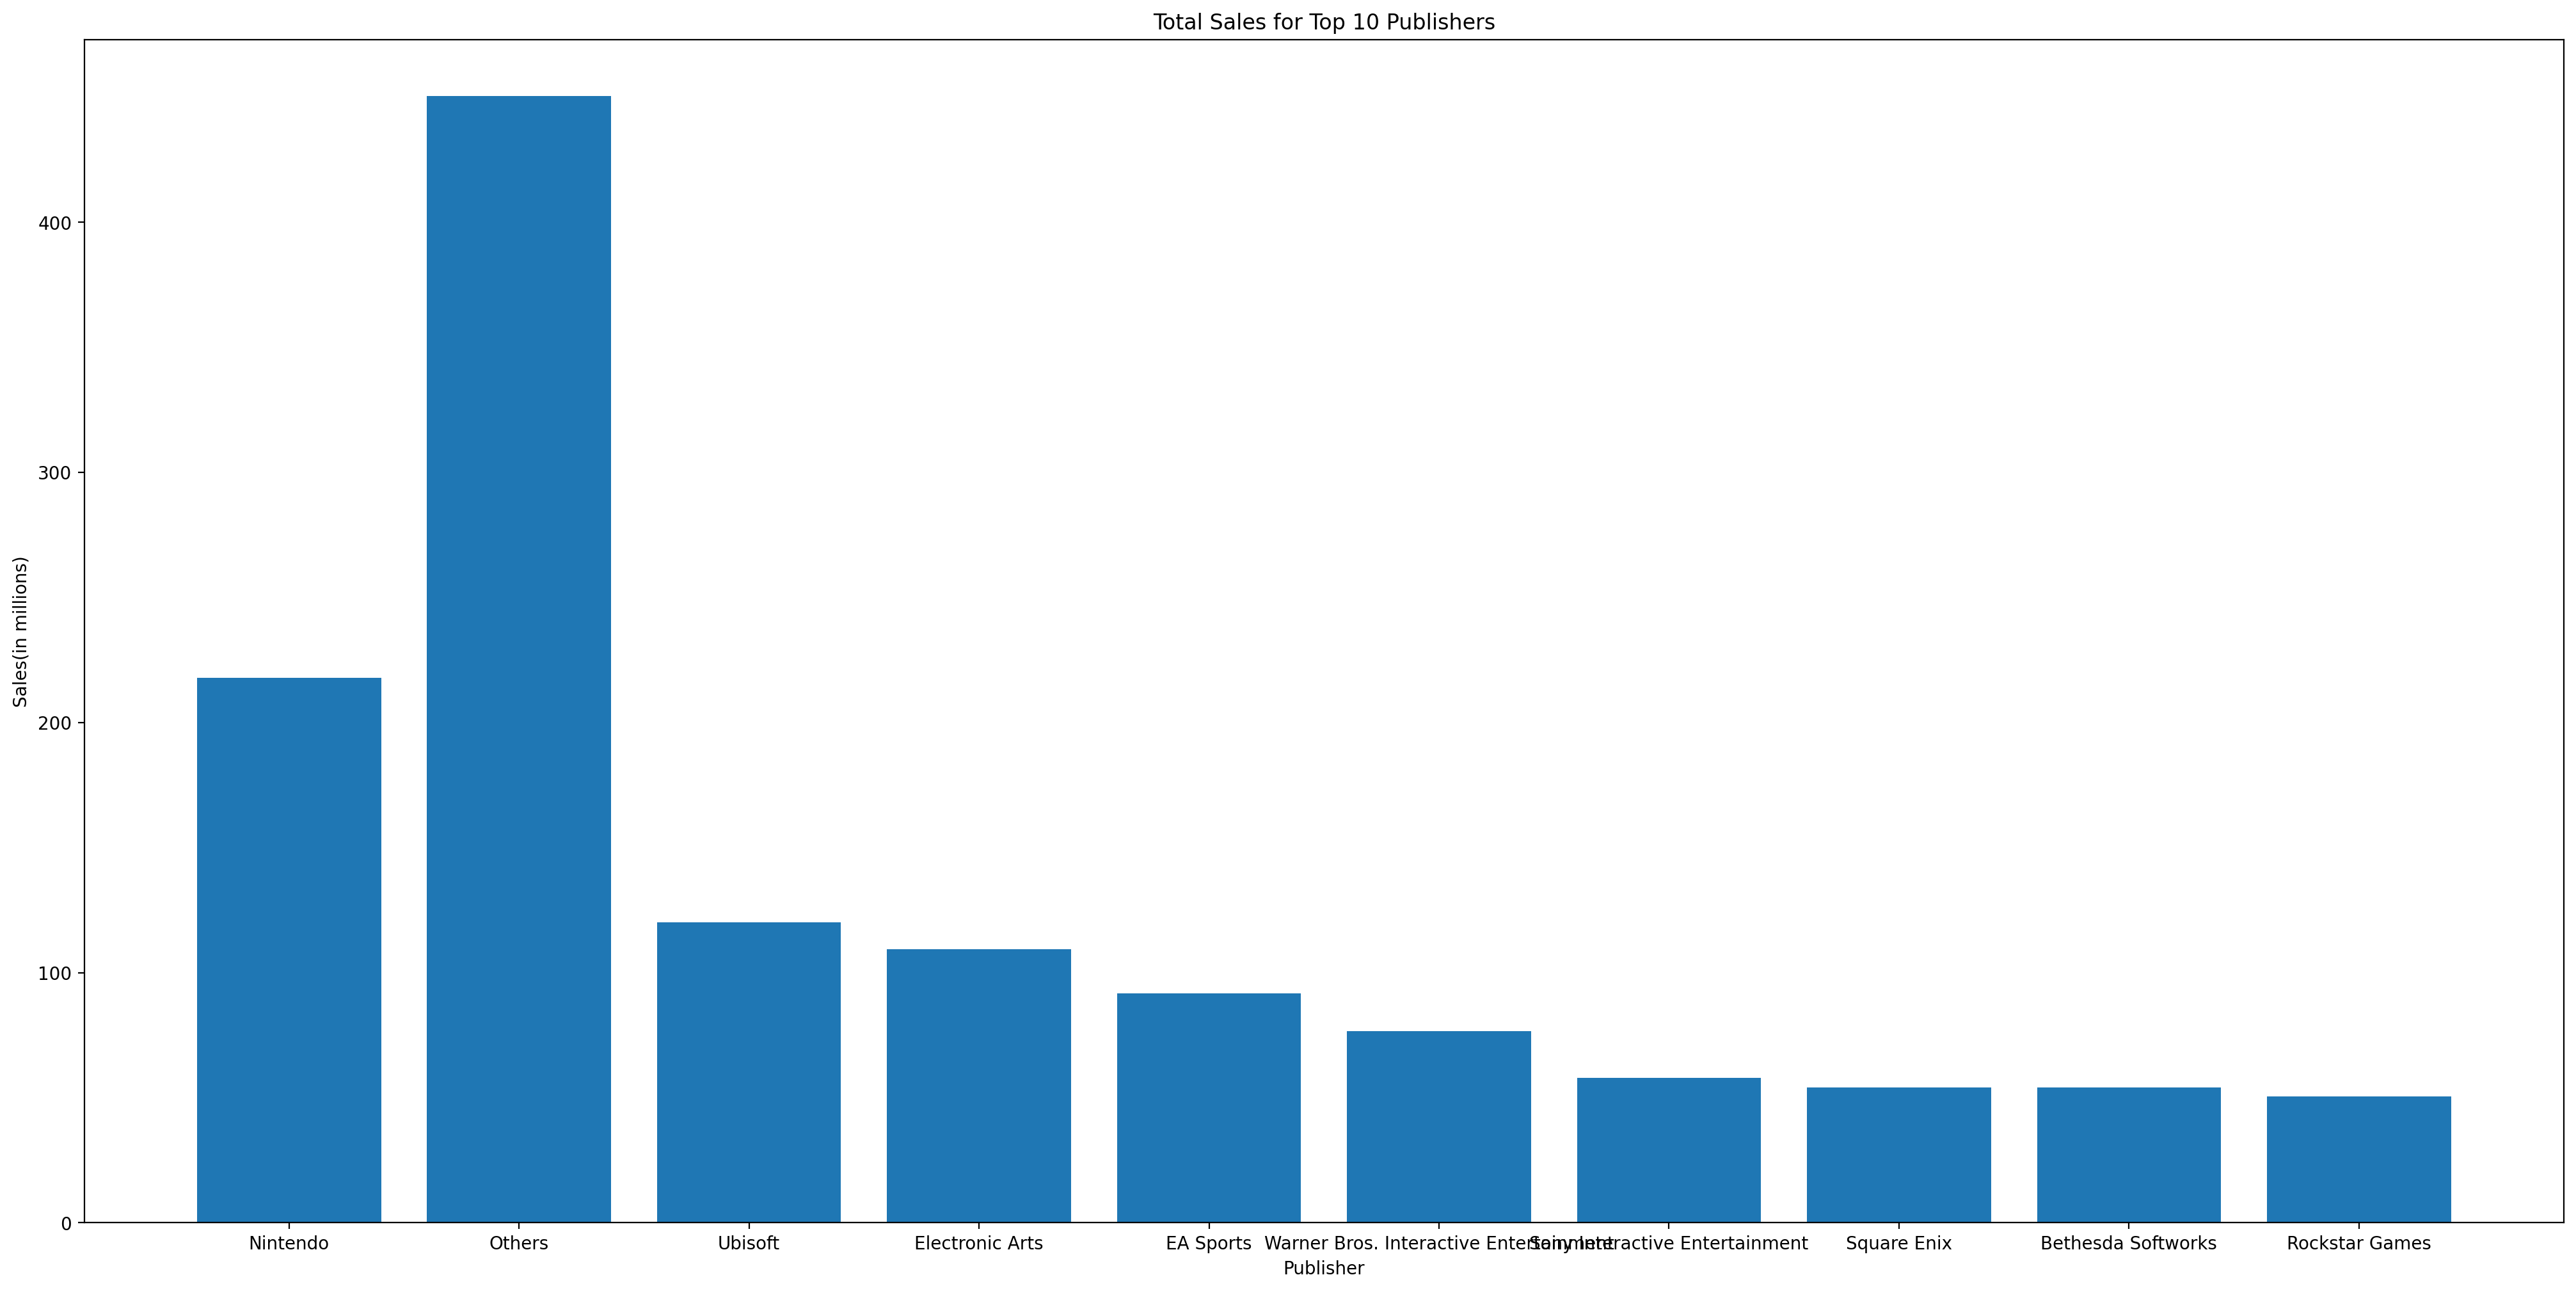

In [219]:
#Isolate top 10 publishers
top_10_publishers_sales_5y = pd.DataFrame(publisher_total_sales_5y[:10])

#The rest of the publishers
other_publishers_sales_5y = pd.DataFrame(publisher_total_sales_5y[10:])

#Add all other publisher info together and put under name 'Other'
top_10_publishers_sales_5y.loc[len(top_10_publishers_sales_5y.index)] = ['Others',other_publishers_sales_5y['Sales_Globe'].sum()]

#graph
plt.figure(figsize =(25,12))
plt.bar(top_10_publishers_sales_5y['Publisher'],top_10_publishers_sales_5y['Sales_Globe'])
plt.title('Total Sales for Top 10 Publishers')
plt.xlabel('Publisher')
plt.ylabel('Sales(in millions)')
plt.show()

([<matplotlib.patches.Wedge at 0x18d02abdd00>,
 [Text(1.0735154413660806, 0.23992623272287086, 'Namco Bandai Games'),
  Text(0.9094937639585075, 0.6187253779509831, 'Ubisoft'),
  Text(0.70208953901989, 0.8468000231452751, 'Tecmo Koei'),
  Text(0.47458425560928424, 0.9923556743062347, 'Nintendo'),
  Text(0.22056596198597112, 1.0776598055106275, 'Warner Bros. Interactive Entertainment'),
  Text(-1.020564617288622, -0.4104240026345058, 'Others'),
  Text(0.8966634046572154, -0.6371771643338537, 'Square Enix'),
  Text(1.004260613105056, -0.44884364868610643, 'Capcom'),
  Text(1.067362729159279, -0.2659639156006984, 'Sega'),
  Text(1.096585950520027, -0.08659822816945414, 'Idea Factory')],
 [Text(0.5855538771087712, 0.130868854212475, '7.0%'),
  Text(0.49608750761373127, 0.3374865697914453, '5.0%'),
  Text(0.3829579303744854, 0.4618909217156046, '3.9%'),
  Text(0.25886413942324593, 0.5412849132579461, '3.9%'),
  Text(0.12030870653780242, 0.587814439369433, '3.9%'),
  Text(-0.5566716094301574

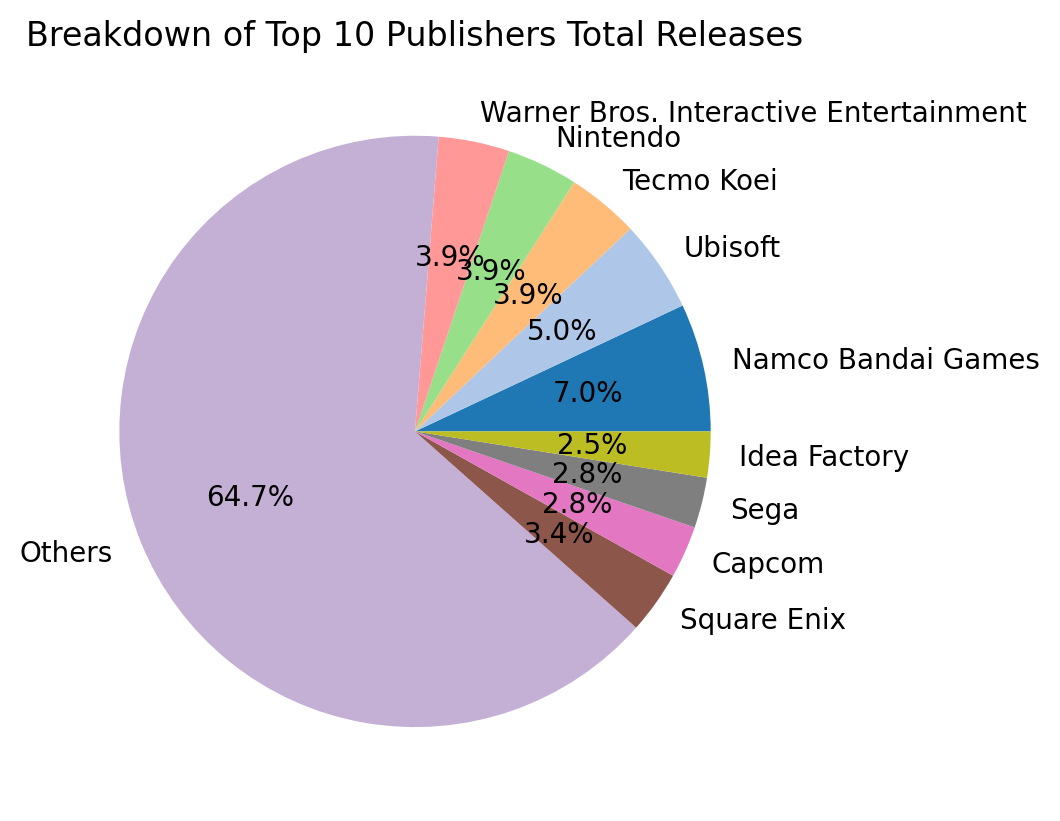

In [220]:
#Breakdown of average contributions of different publishers for releases pie graph

#
cs = plt.cm.tab20(np.arange(11)/11)

plt.figure()
plt.title('Breakdown of Top 10 Publishers Total Releases')
plt.pie(top_10_publishers_releases_5y['Sales_Globe'],labels = top_10_publishers_releases_5y['Publisher'],autopct='%1.1f%%',colors = cs)

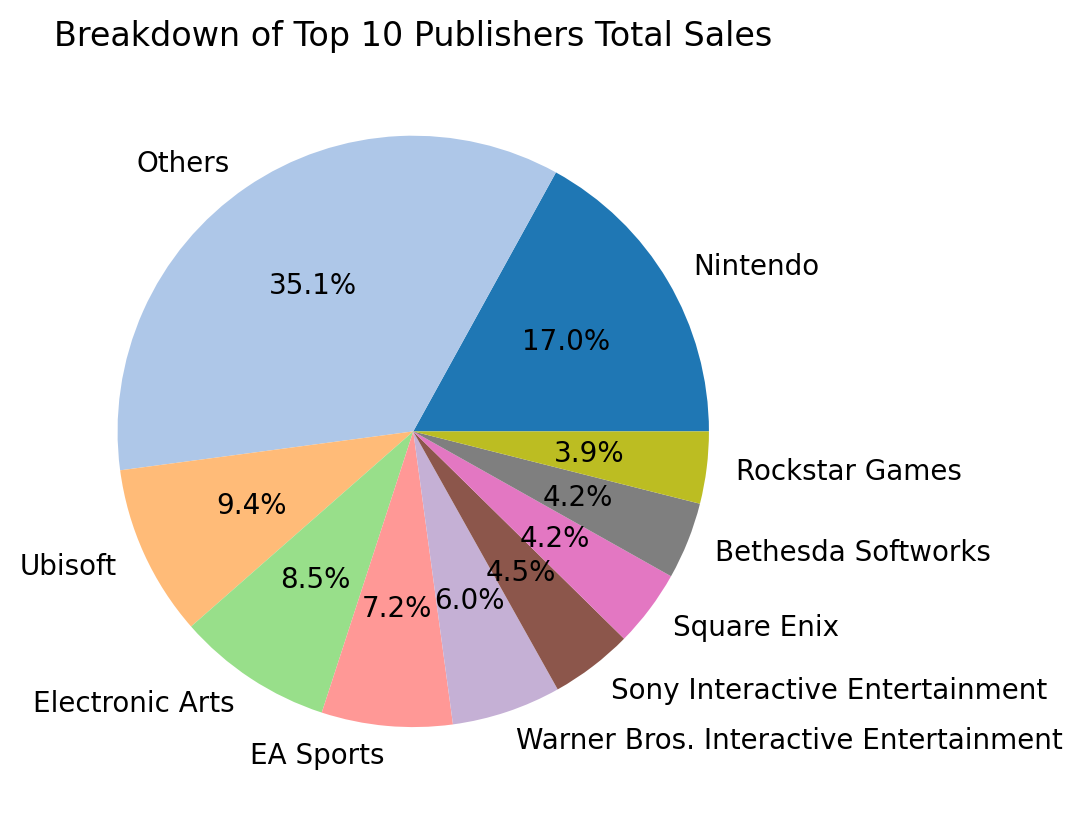

In [221]:
#Breakdown of average contributions of different publishers for sales pie graph

cs = plt.cm.tab20(np.arange(11)/11)

plt.figure()

plt.title('Breakdown of Top 10 Publishers Total Sales')
plt.pie(top_10_publishers_sales_5y['Sales_Globe'],labels = top_10_publishers_sales_5y['Publisher'],autopct='%1.1f%%', colors = cs)



plt.show()

ML Modeling

In [222]:
y = df_5_years['Sales_Globe']

col_drop = ['Rank', 'Name']

df_model = df_5_years.drop(col_drop, axis = 1)

df_model.head()

Publisher           Developer Platform  Release_date  \
20  Rockstar Games      Rockstar North      PS4        2014.0   
31        Nintendo          Game Freak      3DS        2016.0   
32      Activision            Treyarch      PS4        2015.0   
37  Rockstar Games      Rockstar Games      PS4        2018.0   
41      Activision  Sledgehammer Games      PS4        2017.0   

               Genre  Sales_NA  Sales_PAL  Sales_JP  Sales_Other  Sales_Globe  
20            Action      6.06       9.71      0.60         3.02        19.39  
31      Role-Playing      6.02       4.34      3.82         0.99        15.17  
32           Shooter      6.18       6.05      0.41         2.44        15.09  
37  Action-Adventure      5.26       6.21      0.21         2.26        13.94  
41           Shooter      4.67       6.21      0.40         2.12        13.40

In [223]:
#check null values
print("data :\n")
print(df_model.isnull().sum())
print('Total null values : ',df_5_years.isnull().sum().sum())

data :

Publisher          0
Developer          0
Platform           0
Release_date       0
Genre              0
Sales_NA        1269
Sales_PAL       1490
Sales_JP        1667
Sales_Other      856
Sales_Globe        0
dtype: int64
Total null values :  5282


In [224]:
df_model = df_model.dropna()

In [225]:
#check null values
print("data :\n")
print(df_model.isnull().sum())
print('Total null values : ',df_model.isnull().sum().sum())

data :

Publisher       0
Developer       0
Platform        0
Release_date    0
Genre           0
Sales_NA        0
Sales_PAL       0
Sales_JP        0
Sales_Other     0
Sales_Globe     0
dtype: int64
Total null values :  0


In [237]:
X = df_model[['Platform','Genre','Release_date','Sales_NA', 'Sales_PAL', 'Sales_JP', 'Sales_Other']]

y = df_model['Sales_Globe']

X

Platform             Genre  Release_date  Sales_NA  Sales_PAL  Sales_JP  \
20         PS4            Action        2014.0      6.06       9.71      0.60   
31         3DS      Role-Playing        2016.0      6.02       4.34      3.82   
32         PS4           Shooter        2015.0      6.18       6.05      0.41   
37         PS4  Action-Adventure        2018.0      5.26       6.21      0.21   
41         PS4           Shooter        2017.0      4.67       6.21      0.40   
...        ...               ...           ...       ...        ...       ...   
14437       NS          Fighting        2018.0      0.02       0.01      0.01   
14467      PSV      Role-Playing        2017.0      0.01       0.00      0.03   
14576      PSV          Fighting        2014.0      0.02       0.00      0.02   
15835      PSV            Action        2017.0      0.01       0.00      0.01   
16737      3DS            Action        2014.0      0.01       0.01      0.00   

       Sales_Other  
20            3.02  
31            0.99  
32            2.44  
37            2.26  
41            2.12  
...            ...  
14437         0.00  
14467         0.00  
14576         0.01  
15835         0.00  
16737         0.00  

[647 rows x 7 columns]

In [238]:
# le_s = LabelEncoder()
# le_s.fit(X['Publisher'])
# X['Publisher'] = le_s.transform(X['Publisher'])

ct_e = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = pd.DataFrame(ct_e.fit_transform(X))

ct_e = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9])], remainder='passthrough')
X = pd.DataFrame(ct_e.fit_transform(X))


In [240]:
X = np.array(X)
y = np.array(y)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [242]:
#Feature Scaling
sc = StandardScaler()
X_train[:, 23:] = sc.fit_transform(X_train[:, 23:])
X_test[:, 23:] = sc.transform(X_test[:, 23:])

In [243]:
# #MLR dont need feature scaling
# regressor = LinearRegression()
#acc w/ scaling = .883
#acc w/o scaling = .883

#Polynomial regression dont need feature scaling
# regressor_p = PolynomialFeatures(degree = 4)
# X_poly = regressor_p.fit_transform(X)
# regressor = LinearRegression()
# X = X_poly
#acc w/ scaling = 
#acc w/o scaling = 

#SVR
# regressor = SVR(kernel = 'rbf')
# acc = 

#Decision Tree dont need feature scaling
# regressor = DecisionTreeRegressor(random_state = 0)
# #acc w/ scaling = .746
# #acc w/o scaling = .747

# #Random Forest dont need feature scaling
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
# #acc w/ scaling = .836
# #acc w/o scaling = .836

#XGBRegressor
# bp = {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample' :1}
# regressor = XGBRegressor(n_estimators = bp['n_estimators'], max_depth = bp['max_depth'],
#                       subsample = bp['subsample'], learning_rate = bp['learning_rate'], random_state = 100)
# acc = .896

regressor.fit(X_train, y_train)
regressor.score(X_train,y_train)

0.993046390016786

In [ ]:
# # k-fold Cross validation
accuracies = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.18 %
Standard Deviation: 3.58 %


In [ ]:
# y_pred = regressor.predict(X_test)

In [ ]:
# cm = confusion_matrix(y_test, y_pred)
# print(cm)
# accuracy_score(y, y_pred)